In [1]:
dtdir = 'C:\\Users\\kurt_\\Google Drive\\Code\\special\\data\\'
import os
os.chdir(dtdir)
import glob
from import_tm import *
from par_import import *
import numpy as np
import pandas as pd
pd.options.display.html.table_schema = True
pd.options.display.max_rows = None # Send All the Data ( Be carefull If you have too large datasets)
import matplotlib.pyplot as plt
%matplotlib inline 

#Re-write the functions.
#
#add marker border to separate ni

There is NO outputs for the run 128_01680_166_00020
There is NO outputs for the run 128_02350_166_00020
There is NO outputs for the run 128_03200_171_00450
There is NO outputs for the run 128_03360_130_00010
There is NO outputs for the run 128_03360_130_00044
There is NO outputs for the run 128_03360_130_00226
There is NO outputs for the run 128_03360_130_00900
There is NO outputs for the run 128_03360_168_00010
There is NO outputs for the run 128_03360_168_00044
There is NO outputs for the run 128_03360_200_00010
There is NO outputs for the run 128_03360_200_00044
There is NO outputs for the run 128_03360_200_00226
There is NO outputs for the run 128_03360_200_00900
There is NO outputs for the run 128_04370_166_00020
There is NO outputs for the run 128_04480_171_00450
There is NO outputs for the run 128_05040_166_00020
There is NO outputs for the run 128_05299_130_00226
There is NO outputs for the run 128_05299_145_00226
There is NO outputs for the run 128_05299_200_00226
There is NO 

# Functions

In [35]:
## FUNCTIONS
#export the errors then using the matlab fit with basic fit tool
# List of all xm values

 ### NEEDS TO BE UPDATED ########
mon_size_par =[ '01680', '02350', '03200', '03360', '04370', '04480',
               '05040', '06398', '08319', '09598' ]

# Functionst

def mark_size(sphere_num):
    """ This func chooses a markszie based on sphere number """
    if sphere_num == 1024:
        marker_size = 36
    elif sphere_num ==512:
        marker_size = 24
    elif sphere_num ==256:
        marker_size = 15
    elif sphere_num ==128:
        marker_size = 8
    return marker_size

def mark_color(mon_size):
    """ This func chooses a marker color based on Monomer Size parameter """
    # Let's convert the mon_size to float by adding "." after the first "0"



#    # We can choose a color using a color scheme module
#    mon_size = float( ".".join(mon_size[0:2]) + mon_size[2:] )
#    colorselect = plt.cm.gist_ncar #nipy_spectral, Set1,Paired
#    marker_color = colorselect(mon_size)
    # Or we can manually determine the color

#    if mon_size == '01680':
#        marker_color = "C0"
#    elif mon_size == '02350':
#        marker_color = "C1"
#    elif mon_size in [ '03200', '03360' ]:
#        marker_color = "C2"
#    elif mon_size in [ '04370', '04480' ]:
#        marker_color = "C3"
#    elif mon_size == '05040':
#        marker_color = "C4"
#    elif mon_size == '06398':
#        marker_color = "C7"
#    elif mon_size == '08319':
#        marker_color = "C8"
#    elif mon_size == '09598':
#        marker_color = "C9"

    if mon_size in ['01680', '02350','03200', '03360']:
        marker_color = 'green'
    elif mon_size in ['04370', '04480', '05040']:
        marker_color = "purple"
    elif mon_size  == '06398':
        marker_color = "blue"
    elif mon_size  == '08319':
        marker_color = "red"
    elif mon_size  == '09598':
        marker_color = "yellow"


    return marker_color

def mark_style(n_real):
    """ This func chooses a marker style based on Real linearizeactive Index """
    """ Note that nr = 1.66 and 1.68 have the same style."""
    if n_real == "200":
        marker_style = "o"  # Sphere
    elif n_real == "171":
        marker_style = "D"  # Diamond
    elif n_real == "166" or n_real == "168":
        marker_style = "*"# Star
    elif n_real == "130":
        marker_style = "p"  # Pentagon
    return marker_style

def mark_edge_color (n_img):
    """ This func chooses a marker edge color based on Imaginary linearizeactive Index """
    # Let's convert the string type ni to float

    n_img = float( ".".join(n_img[0:2]) + n_img[2:] )
    if n_img < 0.02:
        m_color2 = 'yellow'
    elif n_img == 0.023:
        m_color2 = 'red'
    elif n_img == 0.045:
        m_color2 = 'pink'
    elif n_img == 0.09:
        m_color2 = 'green'
    return m_color2

def linearize(data, sec_lin = False):
    # This function linearize the m0. The linerization functions has to be modified each time.
#    if lp == 1:
 #       print('a1=1; b1=0.85; a2=0.73; b2 = 18')
 #       k1=1; l1=0.73; k2=0.85; l2 = 18
        #k1 = 1.17; l1 = 0.92; k2 = 160; l2 = 200

#    elif lp == 2:
#        print('a1 = 1.17; a2 = 0.92; b1 = 160; b2 = 200')
#        k1 = 1.17; l1 = 0.92; k2 = 160; l2 = 200
#        k1 = 1.35; l1 = 0.60; k2 = 100; l2 = 100

    #elif lp == 3:
    #    print( 'a1 = 1.38; a2 = 0.38; b1 = 170; b2 = 80' )
    #    k1 = 1.38; l1 = 0.38; k2 = 170; l2 = 80

    #elif lp == 4:
    #    print('a1 = 1.95; a2 = 0.66; b1 = 170; b2 = 80')
    #    k1 = 1.95; l1 = 0.66; k2 = 170; l2 = 80
    for lp in [1, 2]:
        

        if lp == 1:
            k1=1; l1=0.73; k2=0.85; l2 = 18       
            e = -1.7218
            data['m0_p1'] = (abs(((k1*data.nr + np.log10(k2*data.ni)*1j)**2 -1)/((l1*data.nr + np.log10(l2*data.ni)*1j)**2 + 2)))**e

        else:
            k1 = 1.35; l1 = 0.60; k2 = 100; l2 = 100
            e = 2
            data['m0'] = (abs(((k1*data.nr + np.log10(k2*data.ni)*1j)**2 -1)/((l1*data.nr + np.log10(l2*data.ni)*1j)**2 + 2)))**e


    
    if sec_lin:
        # this needs to be modified. It is the best fit of LPi against m0. fit function obtained from matlab. Needs to be modified for each LPi
        # Incase of LP4 both linear sinisoidal function and 1st degre pol. regression fit well. Thus 2nd linearization may not be necessary
        data.m0 = (-1.605e-09)*(np.sin(data.m0/2 -0.7*np.pi))+2.237e-09*((data.m0 + 1))
    return data

def old_run_pm ():
    # adding size parameters
    for item in old_xm:
        if item not in size_param:
            size_param.append(item)
    # adding nr
    for item in old_nr:
        if item not in real_ref:
            real_ref.append(item)
    # adding nr
    for item in old_ni:
        # ni = 0 values neglected, but this should be fixed later.\n Because They aren\'t 0, but a value smaller than 0.0001
        if item not in img_ref and item != '00000':
            img_ref.append(item)




sphere_number = [64, 128, 256, 512, 1024]
size_param = ['01680', '02350','03200', '03360','04299', '04370', '04480','04795', '04799', '05040','05299', '05795', '06398', '07300', '08319', '09598']
real_ref = ['130', '145', '166', '168', '171', '180', '200','230']
img_ref = ['00226', '00900', '00450', '00020', '00010', '00060', '03000', '00044']

old_run_pm ()



In [10]:
#%%
sphere_number_rv = sphere_number[::-1]
size_param_rv = size_param[::-1]
real_ref_rv = real_ref[::-1]
#img_ref = img_ref[::-1]
#sphere_number = [64, 128, 256, 512, 1024]
#size_param = ['01680', '02350','03200', '03360','04299', '04370', '04480','04795', '04799', '05040','05299', '05795', '06398', '07300', '08319', '09598']
#real_ref = ['130', '145', '166', '168', '171', '180', '200','230']
#img_ref = ['00226', '00900', '00450', '00020', '00010', '00060', '03000', '00044']
alpha_value = 1.0
_log = []
plt.figure(figsize=[12,6])
count = 0
for N in sphere_number_rv:

    for xm in size_param_rv:

        for nr in real_ref_rv:

             for ni in img_ref:

                 try:
                     missing = 't-matrix'
                     tm = vars()['tm{}_{}_{}_{}_eff'.format(N, xm, nr, ni)]

                     missing = ' f-fasm'
                     param = vars()['param{}_{}_{}_{}_eff'.format(N, xm, nr, ni)]

                     if tm.qs.values < 1e3 and tm.qs.values > -1e3:


                         # Choosing the style based on the parameter values
                         m_size = mark_size(N)
                         m_col = mark_color (xm)
                         m_st = mark_style(nr)
                         m_col2 = mark_edge_color (ni)
                         alpha_val = (1 - count/52)
                         alpha_val = np.where(alpha_val < 0.6, alpha_val, 0.6)
                         alpha_val = np.where(alpha_val > 0.35, alpha_val, 0.35)


                         plt.plot(param.qs.values,tm.qs.values,marker=m_st,\
                                  markersize=m_size + 10, color=m_col2, alpha = alpha_val)#,\
                                  #markeredgecolor='red', markeredgewidth = N/160)

                         plt.plot(param.qs.values,tm.qs.values,marker=m_st,\
                                  markersize=m_size, color=m_col, alpha = alpha_val)#,\
                                 # markeredgecolor='red', markeredgewidth = N/160)
                         count+=1
                     else:
                         print('qs value is wrong in this run: tm{}_{}_{}_{}'.format(N, xm, nr, ni))



                 except KeyError:
                     #print('missing run {} {}_{}_{}_{}_eff'.format(missing, N, xm, nr, ni))
                     _log.append('missing run {} {}_{}_{}_{}_eff'.format(missing, N, xm, nr, ni))
                     continue
                 plt.plot(np.linspace(0,11),np.linspace(0,11), color='purple', linestyle="-.", alpha = 0.1)
                 plt.show()  

UnboundLocalError: local variable 'm_color2' referenced before assignment

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

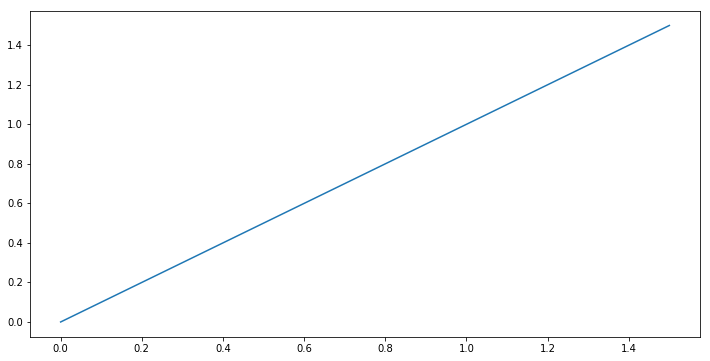

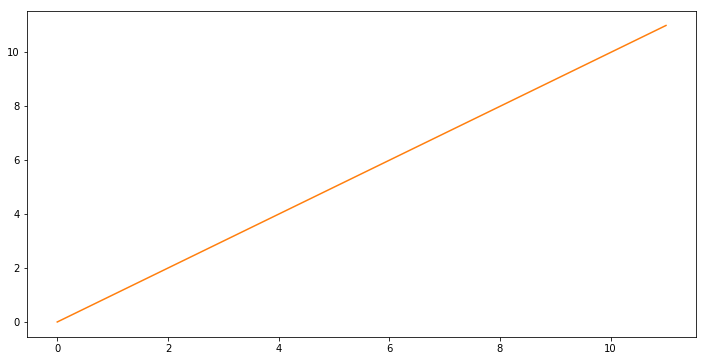

count 0


In [4]:

_log = []

sphere_number_rv = sphere_number[::-1]
size_param_rv = size_param[::-1]
real_ref_rv = real_ref[::-1]

qa_tm = [];qa_pm = []
qs_tm = [];qs_pm = []
count = 0
plt.figure(figsize=[12,6])
for N in sphere_number:

    for xm in size_param:

        for nr in real_ref:

             for ni in img_ref:

                 try:
                     missing = 't-matrix'
                     tm = vars()['tm{}_{}_{}_{}_eff'.format(N, xm, nr, ni)]

                     missing = ' f-fasm'
                     param = vars()['param{}_{}_{}_{}_eff'.format(N, xm, nr, ni)]

                     if tm.qa.values < 1e3 and tm.qa.values > -1e3:


                         qa_pm.append(param.qa.values)
                         qa_tm.append(tm.qa.values)

                         # Choosing the style based on the parameter values
                         m_size = mark_size(N)
                         m_col = mark_color (xm)
                         m_st = mark_style(nr)
                         alpha_val = (1 - count/52)
                         alpha_val = np.where(alpha_val < 0.6, alpha_val, 0.6)
                         alpha_val = np.where(alpha_val > 0.35, alpha_val, 0.35)
                        
                         
                         plt.plot(param.qa.values,tm.qa.values,marker=m_st, markersize=m_size, color=m_col, markerfacecoloralt='black', alpha = alpha_val, markeredgecolor = 'black')
                         count+=1


                         #plt.plot(param.qs.values,tm.qs.values,marker='o', markersize=3, color="red")

                         qs_pm.append(param.qs.values)
                         qs_tm.append(tm.qs.values)



                 except KeyError:
                     #print('missing run {} {}_{}_{}_{}_eff'.format(missing, N, xm, nr, ni))
                     _log.append('missing run {} {}_{}_{}_{}_eff'.format(missing, N, xm, nr, ni))
                     continue
 #                plt.plot(np.log10(tm1024_0640_130_0023_mx['P11'].values))


plt.show()
plt.close()

plt.figure(figsize=[12,6])
plt.scatter(qa_pm,qa_tm)
plt.plot(np.linspace(0,1.5),np.linspace(0,1.5), color="C0")
plt.show()
plt.close()

plt.figure(figsize=[12,6])
plt.scatter(qs_pm,qs_tm)
plt.plot(np.linspace(0,11),np.linspace(0,11), color="C1")
plt.show()
plt.close()

print('count %d'%count)

# Error functions and corrections

In [36]:
sphere_number = [ 128, 256, 512, 1024]
size_param = ['01680', '02350','03200', '03360','04299', '04370', '04480','04795', '04799', '05040','05299', '05795', '06398', '07300', '08319', '09598']
real_ref = ['130', '145', '166', '168', '171', '180', '200','230']
img_ref = ['00226', '00900', '00450', '00020', '00010', '00060', '03000', '00044']
old_run_pm ()

# adding parameters from old runs

#sphere_number = [256]
#size_param = ['01680']
#real_ref = ['130']
#img_ref = ['00226']

alpha_value = 1.0
_log = []
theta=np.arange(0,181)
x = theta[65:]
dt=[] # to be used to write Legend. Pol. coefficients data
for N in sphere_number:

    for xm in size_param:

        for nr in real_ref:

            for ni in img_ref:

                try:
                    missing = 't-matrix'
                    tm = vars()['tm{}_{}_{}_{}_eff'.format(N, xm, nr, ni)]

                    missing = ' f-fasm'
                    param = vars()['param{}_{}_{}_{}_eff'.format(N, xm, nr, ni)]

                except KeyError:
                    #print('missing run {} {}_{}_{}_{}_eff'.format(missing, N, xm, nr, ni))
                    _log.append('missing run {} {}_{}_{}_{}_eff'.format(missing, N, xm, nr, ni))
                    continue

                runid = '{}_{}_{}_{}'.format(N, xm, nr, ni)
                tm =  vars()['tm'+runid+'_mx']
                pm = vars()['param'+runid+'_mx']
                p22_err = (tm.P22*tm.P11 - pm.P22)[65:]

                # Now the correction
                # First fit the error function with a 3rd Degree Legendre Polynomial

                coeffs = np.polynomial.legendre.legfit(x, p22_err, deg=3)

                rsq = 1- np.polynomial.legendre.legfit(x, p22_err, deg=3,full = True)[1][0][0]

                # Keeping ceofficients in a Dataframe
                sp = float(".".join(xm[0:2]) + xm[2:])
                n_real = float(".".join(nr[0:2]) + nr[2:])
                n_img = float(".".join(ni[0:2]) + ni[2:])
                sw={}
                sw['Ns'] = N
                sw['sp'] = sp
                sw['nr'] = n_real
                sw['ni'] = n_img
                sw['p1'] = coeffs[0]
                sw['p2'] = coeffs[1]
                sw['p3'] = coeffs[2]
                sw['p4'] = coeffs[3]
                sw['r_sqr'] = rsq
                dt.append(sw)


                # Shoul you need the plots, edit the "if" below

                plotting = "no"
                if plotting == "yes":
                    # Now Let's Correct the parametrization and plot the new and old comparison with tmatrix
                    p22_corr = pd.Series(np.polynomial.legendre.legval(x, coeffs), index=x)
                    new_pm = pm.copy()
                    new_pm.P22 = pm.P22.add(p22_corr, fill_value=0)
                    fig, ax = plt.subplots(ncols=3,figsize=(12,6))

                    ax[0].plot(np.log10(new_pm.P22), '.', label = 'new_pm')
                    ax[0].plot(np.log10(tm.P22*tm.P11), '.', label = 'tm')
                    ax[0].set_title('New P22'+runid)
                    ax[0].legend()

                    # Old fit
                    ax[1].plot(np.log10(pm.P22), '.', label = 'old_pm')
                    ax[1].plot(np.log10(tm.P22*tm.P11), '.', label = 'tm')
                    ax[1].legend()
                    ax[1].set_title('Old P22'+runid)

                    # Error Function and the Fit
                    ax[2].plot(x, p22_err, '.', label = 'p22_err')
                    ax[2].plot(x, p22_corr,'.', label = 'p22_corr' )
                    ax[2].legend()
                    ax[2].set_title('p22 error & the fit')
                    plt.tight_layout()
                    plt.show()

lp=1
if lp == 1:
    p = "p1"
elif lp == 2:
    p = 'p2'
elif lp == 3:
    p = 'p3'
elif lp == 4:
    p = 'p4'
else:
    print('wrong p values')
    
LP_Coeff = pd.DataFrame(dt)
linearize(LP_Coeff)
# optional parameters which makes filtering easier visually.
LP_Coeff['sp_m0'] = LP_Coeff['sp']*LP_Coeff['m0']
LP_Coeff['N_m0'] = LP_Coeff['Ns']*LP_Coeff['m0']*0.05
LP_Coeff['N_sp'] = LP_Coeff['Ns']*LP_Coeff['sp']

# Breaking in to 4 regimes
LP512_lt063 = LP_Coeff[(LP_Coeff.Ns <= 512) & (LP_Coeff.sp < 0.63)]
LP512_gt063 = LP_Coeff[(LP_Coeff.Ns <= 512) & (LP_Coeff.sp >= 0.63)]
LP1024_lt063 = LP_Coeff[(LP_Coeff.Ns >= 512) & (LP_Coeff.sp < 0.63)]
LP1024_gt063 = LP_Coeff[(LP_Coeff.Ns >= 512) & (LP_Coeff.sp >= 0.63)]
LP1024 = LP_Coeff[ LP_Coeff.Ns >= 512 ]
LP_lt063 = LP_Coeff[LP_Coeff.sp < 0.63]
LP_gt063 = LP_Coeff[LP_Coeff.sp >= 0.63]


 # Selecting m0 data

## An Important Note:
    
   ** For P1 change the power from 2 to -1.7218. It is actually $Sm0^{-0.8609}$ **
   
   ** where $S(m0)$ is the common form of data.m0. ($2*-0.8609 = -1.7218$) **
   
   This is because the m0 vs C1 has this shape: $ m0^{-0.8609} $

 ### FOR P1 
 
* For p1 i cant decide if I should use the corrected m0 formula or not. They are both good, but wrong formula slightly better.
 
 I will try the new corrected formula for all the others.

#### Corrected

* for $p1 =  data['m0'] = (abs(((a1*data.nr + np.log10(b1*data.ni)*1j)**2 -1)/((a2*data.nr + np.log10(b2*data.ni)*1j)**2 + 2)))**-1.7218 a1=1, b1=0.85,a2=0.73, b2 = 18$

    This behaves perfectly linear. Hence no need to find a fit against p1.

#### Uncorrected    

* for $p1 = data['m0'] = (abs(((0.82*data.nr + np.log10(data.ni)*1j)**2 -1)/((0.82*data.nr + 1.95*np.log10(data.ni)*1j)+2)))**2  ADJ R^2 = 8997$

 ### FOR P2

 for p2 $data['m0'] = (abs(((a1*data.nr + np.log10(b1*data.ni)*1j)**2 -1)/((a2*data.nr + np.log10(b2*data.ni)*1j)**2 + 2)))**2 with a1 = 1.17, a2 = 0.92, b1=160, b2 = 200$
 
 * The best fit is either Poly 2 or linear $a*(sin(x/4 -pi*1.15))+b*((x+1))+c*(1) with R^2 0.8289$


 ### FOR P3 
 
 #### Uncorrected M0
 
 * for p3 -> data['m0'] = $(abs(((a1*data.nr + np.log10(b*data.ni)*1j)**2 -1)/((a2*data.nr + np.log10(b*data.ni)*1j)+2)))**2 with a = 1.215, a2 = 2.2, b1 = 138, b2 = 50$
 
 * for p3 Linear fitting with this function: $a*sin(x/2 -0.4*pi)+b*((x + 1))+c*(1)$ or polynomial 2nd degree. Both good, former better. $R^2 = 0.8362$ for linear
 
#### Corrected M0
 
 $data['m0'] = (abs(((a1*data.nr + np.log10(b1*data.ni)*1j)**2 -1)/((a2*data.nr + np.log10(b2*data.ni)*1j)**2 + 2)))**2 with a1 = 1.38, a2 = 0.38, b1 = 170, b2 = 80$
 
 linear fit is the best with $a*(sin(x/2 -0.5*pi))+b*((x +1))+c*(1) R^2 = 0.827$

 ### FOR P3 
 
 #### Uncorrected M0
 
 For p4  -> $data['m0'] = (abs(((a1*data.nr + np.log10(b1*data.ni)*1j)**2 -1)/((a2*data.nr + np.log10(b2*data.ni)*1j)+2)))**2 with a1 = 1.65, a2 = 2.6, b1 = 130, b2 = 65$
 
 fit with linear function $a*(sin(x-pi*1.3))+b*((x+1))+c*(1) R^2 = 0.8588$
 
 #### corrected M0
 
 $data['m0'] = (abs(((a1*data.nr + np.log10(b1*data.ni)*1j)**2 -1)/((a2*data.nr + np.log10(b2*data.ni)*1j)**2 + 2)))**2 with a1=1.95, a2 = 0.66, b1=170, b2 = 80$
 
 linear fit is far the best $a*(sin(x/2 -0.7*pi))+b*((x + 1))+c*(1) with R^2 = 0.8686$. Not only in terms of R^2 but also it is much more stable and makes sense above the range


 Selecting m0 data
 For p1 i cant decide if I should use the corrected m0 formula or not. They are both good, but wrong formula slightly better.
 I will try the new corrected formula for all the others.



 for p1 =  data['m0'] = (abs(((a1*data.nr + np.log10(b1*data.ni)*1j)**2 -1)/((a2*data.nr + np.log10(b2*data.ni)*1j)**2 + 2)))**-1.7218 a1=1, b1=0.85,a2=0.73, b2 = 18 This behave perfectly linear. Hence no need to find a fit against p1.
 for p1 = data['m0'] = (abs(((0.82*data.nr + np.log10(data.ni)*1j)**2 -1)/((0.82*data.nr + 1.95*np.log10(data.ni)*1j)+2)))**2  ADJ R^2 = 8997


 for p2 data['m0'] = (abs(((a1*data.nr + np.log10(b1*data.ni)*1j)**2 -1)/((a2*data.nr + np.log10(b2*data.ni)*1j)**2 + 2)))**2 with a1 = 1.17, a2 = 0.92, b1=160, b2 = 200
 The best fit is either Poly 2 or linear a*(sin(x/4 -pi*1.15))+b*((x+1))+c*(1) with R^2 0.8289


 FOR P3 Uncorrected M0
 for p3 -> data['m0'] = (abs(((a1*data.nr + np.log10(b*data.ni)*1j)**2 -1)/((a2*data.nr + np.log10(b*data.ni)*1j)+2)))**2 with a = 1.215, a2 = 2.2, b1 = 138, b2 = 50
 for p3 Linear fitting with this function: a*sin(x/2 -0.4*pi)+b*((x + 1))+c*(1) or polynomial 2nd degree. Both good, former better. R^2 = 0.8362 for linear
 Corrected M0
 data['m0'] = (abs(((a1*data.nr + np.log10(b1*data.ni)*1j)**2 -1)/((a2*data.nr + np.log10(b2*data.ni)*1j)**2 + 2)))**2 with a1 = 1.38, a2 = 0.38, b1 = 170, b2 = 80
 linear fit is the best with a*(sin(x/2 -0.5*pi))+b*((x +1))+c*(1) R^2 = 0.827

 For p4  -> data['m0'] = (abs(((a1*data.nr + np.log10(b1*data.ni)*1j)**2 -1)/((a2*data.nr + np.log10(b2*data.ni)*1j)+2)))**2 with a1 = 1.65, a2 = 2.6, b1 = 130, b2 = 65
 fit with linear function a*(sin(x-pi*1.3))+b*((x+1))+c*(1) R^2 = 0.8588
 For p4 with corrected M0
 data['m0'] = (abs(((a1*data.nr + np.log10(b1*data.ni)*1j)**2 -1)/((a2*data.nr + np.log10(b2*data.ni)*1j)**2 + 2)))**2 with a1=1.95, a2 = 0.66, b1=170, b2 = 80
 linear fit is far the best a*(sin(x/2 -0.7*pi))+b*((x + 1))+c*(1) with R^2 = 0.8686. Not only in terms of R^2 but also it is much more stable and makes sense above the range


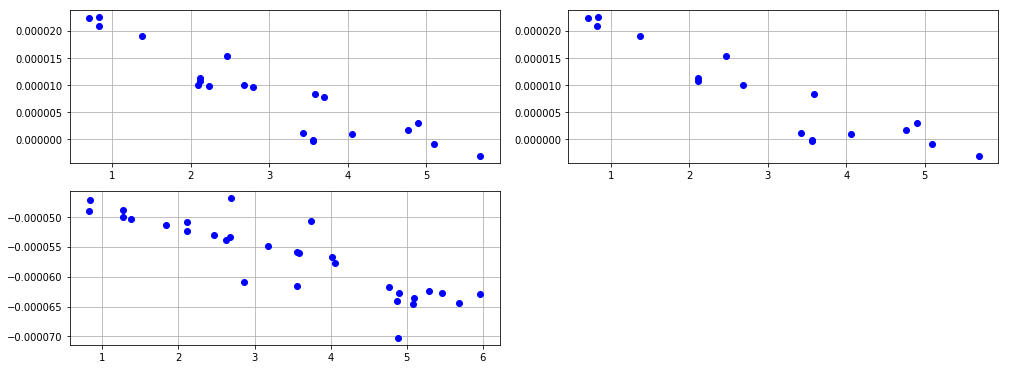

In [42]:



columns_to_keep = ['Ns','sp','nr','ni', 'm0','m0_p1','p1','p2','p3'] #,'p4']
t = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.sp== 0.6398 )  &  (LP_Coeff.nr == 1.68 )  ]
#t = linearize(t, lp)

t2 = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.sp== 0.6398 )  &  (LP_Coeff.nr == 1.45 )  ]
#t2 = linearize(t2, lp)

t3 = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.sp== 0.6398 )  &  (LP_Coeff.nr == 1.3 )  ]
#t3 = linearize(t3, lp)

t4 = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.sp== 0.6398 )  &  (LP_Coeff.nr == 1.8 )  ]
#t4 = linearize(t4, lp)

t5 = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.sp== 0.6398 )  &  (LP_Coeff.nr == 2.0 )  ]
#t5 = linearize(t5, lp)

t6 = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.sp== 0.6398 )  &  (LP_Coeff.nr == 2.3 )  ]
#t6 = linearize(t6, lp)def

dt=[t[columns_to_keep],t2[columns_to_keep], t3[columns_to_keep], t4[columns_to_keep], t5[columns_to_keep], t6[columns_to_keep]]
A064_ltd = pd.concat(dt).reset_index().drop(['index'], axis = 1)



t = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.sp== 0.9598 )  &  (LP_Coeff.nr == 1.68 )  ]
#t = linearize(t, lp)

t2 = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.sp== 0.9598 )  &  (LP_Coeff.nr == 1.45 )  ]
#t2 = linearize(t2, lp)

t3 = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.sp== 0.9598 )  &  (LP_Coeff.nr == 1.3 )  ]
#t3 = linearize(t3, lp)

t4 = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.sp== 0.9598 )  &  (LP_Coeff.nr == 1.8 )  ]
#t4 = linearize(t4, lp)

t5 = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.sp== 0.9598 )  &  (LP_Coeff.nr == 2.0 )  ]
#t5 = linearize(t5, lp)

t6 = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.sp== 0.9598 )  &  (LP_Coeff.nr == 2.3 )  ]
#t6 = linearize(t6, lp)def


dt=[t[columns_to_keep],t2[columns_to_keep], t3[columns_to_keep], t4[columns_to_keep], t5[columns_to_keep], t6[columns_to_keep]]
A096_ltd = pd.concat(dt).reset_index().drop(['index'], axis = 1)


A064 = LP_Coeff[(LP_Coeff.Ns == 256) & (LP_Coeff.sp == 0.6398)].reset_index().drop(['index'], axis = 1)
A064 = A064[columns_to_keep]

A096 = LP_Coeff[(LP_Coeff.Ns == 256) & (LP_Coeff.sp == 0.9598)].reset_index().drop(['index'], axis = 1)
A096 = A096[columns_to_keep]


lp=3
if lp == 1:
    p = "p1"
elif lp == 2:
    p = 'p2'
elif lp == 3:
    p = 'p3'
elif lp == 4:
    p = 'p4'
else:
    print('wrong p values')
    
if lp == 1:
    m = "m0_p1"
else:
    m = "m0"
    
plt.figure(2, figsize=(14,5))
plt.subplot(2, 2, 1)
plt.plot(A096[m],A096[p],'bo');
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(A096_ltd[m],A096_ltd[p],'bo');
plt.grid(True)
plt.tight_layout()

plt.subplot(223)
plt.plot(A064_ltd[m],A064_ltd[p],'bo');
plt.grid(True)

#aagt06 = linearize(LP_Coeff[LP_Coeff.sp >= 0.6 ])
#aalt06 = linearize(LP_Coeff[LP_Coeff.sp < 0.6 ])
#aa_all = linearize(LP_Coeff)
# Now grouping is possible. Here is an example:
# LP_Coeff[(LP_Coeff['sp'] ==0.64) & (LP_Coeff['nr'] == 2)]

In [7]:
LP_Coeff

Ns      SP      ni    nr        p1        p2            p3  \
0      64  0.2350  0.0020  1.66 -0.196361  0.005521 -3.058789e-05   
1      64  0.3360  0.0020  1.66  0.410041 -0.009691  4.779474e-05   
2      64  0.4370  0.0020  1.66 -0.056854  0.000089  4.221306e-06   
3      64  0.4480  0.0450  1.71 -0.125733  0.001708 -3.875819e-06   
4      64  0.6398  0.0450  1.71 -0.204137  0.004928 -2.486782e-05   
5      64  0.8319  0.0450  1.71 -0.146222  0.005182 -3.443343e-05   
6     128  0.6398  0.0226  1.30 -0.284799  0.006924 -3.436976e-05   
7     128  0.6398  0.0900  1.30 -0.330598  0.007846 -3.879839e-05   
8     128  0.6398  0.0010  1.30 -0.269343  0.006611 -3.287028e-05   
9     128  0.6398  0.0044  1.30 -0.358212  0.008265 -3.925019e-05   
10    128  0.6398  0.0010  1.68 -0.274983  0.007160 -3.778616e-05   
11    128  0.6398  0.0044  1.68 -0.277289  0.007204 -3.798249e-05   
12    128  0.6398  0.0450  1.71 -0.305969  0.007801 -4.088268e-05   
13    128  0.6398  0.0226  2.00 -0.329358  0.008948 -4.956018e-05   
14    128  0.6398  0.0900  2.00 -0.386210  0.010048 -5.442241e-05   
15    128  0.6398  0.0010  2.00 -0.336872  0.009193 -5.114138e-05   
16    128  0.6398  0.0044  2.00 -0.328099  0.008892 -4.900887e-05   
17    256  0.1680  0.0020  1.66  0.117101 -0.001571  3.422773e-06   
18    256  0.2350  0.0020  1.66  0.047671 -0.000376 -2.496261e-06   
19    256  0.3200  0.0450  1.71  0.082735 -0.002538  1.264532e-05   
20    256  0.3360  0.0226  1.30  0.044920 -0.001813  9.380556e-06   
21    256  0.3360  0.0900  1.30  0.021531 -0.001326  6.960095e-06   
22    256  0.3360  0.0450  1.30  0.037059 -0.001649  8.564780e-06   
23    256  0.3360  0.0010  1.30  0.107277 -0.003035  1.436169e-05   
24    256  0.3360  0.3000  1.30 -0.047407  0.000106 -1.163615e-07   
25    256  0.3360  0.0044  1.30  0.051357 -0.001947  1.004822e-05   
26    256  0.3360  0.0226  1.45  0.041168 -0.001708  8.825899e-06   
27    256  0.3360  0.0900  1.45  0.018671 -0.001238  6.486859e-06   
28    256  0.3360  0.0450  1.45  0.033613 -0.001550  8.039129e-06   
29    256  0.3360  0.3000  1.45 -0.047348  0.000137 -3.230780e-07   
30    256  0.3360  0.0044  1.45  0.047362 -0.001838  9.471871e-06   
31    256  0.3360  0.0020  1.66  0.044102 -0.001734  8.889767e-06   
32    256  0.3360  0.0226  1.68  0.037301 -0.001588  8.153742e-06   
33    256  0.3360  0.0900  1.68  0.016362 -0.001149  5.968759e-06   
34    256  0.3360  0.0450  1.68  0.030276 -0.001441  7.420100e-06   
35    256  0.3360  0.0010  1.68  0.106451 -0.003005  1.416088e-05   
36    256  0.3360  0.3000  1.68 -0.044964  0.000132 -3.841713e-07   
37    256  0.3360  0.0044  1.68  0.043072 -0.001709  8.757753e-06   
38    256  0.3360  0.0226  1.80  0.035716 -0.001535  7.840114e-06   
39    256  0.3360  0.0900  1.80  0.015606 -0.001113  5.740480e-06   
40    256  0.3360  0.0450  1.80  0.028970 -0.001393  7.134935e-06   
41    256  0.3360  0.3000  1.80 -0.043304  0.000119 -3.678828e-07   
42    256  0.3360  0.0044  1.80  0.041249 -0.001651  8.419139e-06   
43    256  0.3360  0.0226  2.00  0.033004 -0.001444  7.295004e-06   
44    256  0.3360  0.0900  2.00  0.014308 -0.001051  5.347511e-06   
45    256  0.3360  0.0450  2.00  0.026741 -0.001312  6.642714e-06   
46    256  0.3360  0.0010  2.00  0.018406 -0.000371 -1.413920e-06   
47    256  0.3360  0.3000  2.00 -0.040612  0.000098 -3.436434e-07   
48    256  0.3360  0.0044  2.00  0.038151 -0.001552  7.832646e-06   
49    256  0.4299  0.0226  1.30 -0.171348  0.002330 -6.276253e-06   
50    256  0.4299  0.0226  1.45 -0.177231  0.002528 -7.456238e-06   
51    256  0.4299  0.0226  1.68 -0.184793  0.002828 -9.410909e-06   
52    256  0.4299  0.0226  1.80 -0.188627  0.002994 -1.054652e-05   
53    256  0.4299  0.0226  2.00 -0.195899  0.003303 -1.268768e-05   
54    256  0.4370  0.0020  1.66 -0.202693  0.003314 -1.199038e-05   
55    256  0.4480  0.0450  1.71 -0.260771  0.004755 -1.961785e-05   
56    256  0.4795  0.0226  1.30 -0.311530  0.005841 -2.399538e-05   
57   

* Before Trying to do any of the below, First collect all the coeeefiicients of the legend. pol. in a pd.DataFrame. 

* Then by grouping, plot each coeeffcient against a parameter while keeping all the others constant. Repeat this for all the parameters. Then What. 

* I will find a function for each paramater against each coeefficient. If all the functions are linear for a coeff. then this means product is 

    $f(N)*f(xm)*f(nr)*f(ni)$ 

    If for example N is not linear then find a version of N which will give a linear function. This means, if, for example, logN gives linear then the coefficient is modelled with (log(N)*xm*nr*ni)         assuming all the others linear. 


* After finding the linear functions for each coeff. Now find the function for the product of $f(N)*f(xm)*f(nr)*f(ni)$  in its form for the coeeficient which is being fitted against that coeeficient. 

    I will at the end find 
    
    $F((f_0(N)*f_0(xm)*f_0(nr)*f(ni)))*P0 + G((f_0(N)*f_0(xm)*f_0(nr)*f_0(ni)))*P1 + ... *P4 $
    
    Where P1 P2 ... are the first the second, third and the fourth terms of the legendre polynomial.

* Warning. Be sure if I need the product of each parameters functions for each coeff. or the sum of the parameter functions to fit the coeeff. 
     This means: Which one is true: 
     
     $f(N)*f(xm)*f(nr)*f(ni)$ or $f(N) + f(xm) + f(nr) + f(ni)$



* Then fit the plot to see if it makes sense. if it does then do the same thing 

* Errors are decreasing as the xm increases when $nr = 1.3 ni=0.023$

* Now test $nr=1.3 ni = 0.090$

* and $ni = 0.023 and nr = 2.0$

* looks like as xm increasing quantum effect in the backscattering is kicking. This increases the error because there is a positive bias in the model which is surpressed by the coherent backscattering enahncement near the exact backscattering.

* if the above is true then this should appear more cearly with $nr = 2.0$ because quantum effect is more strong. [ Yes Confirmed ]

* But there is more:  Look at $1024\_0336\_ 200\_0023$. Correction has the same shape as $1024\_0640\_200\_0023$. This suggest that after some point quantum effect start kickng when N is increasing. Since $1024$ shows minimal quantum effect we can start from this.

* now find the threshold where the quantum effect starts for each of the other parameters. some kind of their product should define the threshold for quantum effect. When you finbd this value you can check possible different combinations of parameters which give the same value. If quantum effect is similar for all those combinations then i can be confident about this threshold value ( this threshold is probably in this form $N^i * xm^j * nr^k * ni^l$ )


# P11 Fit

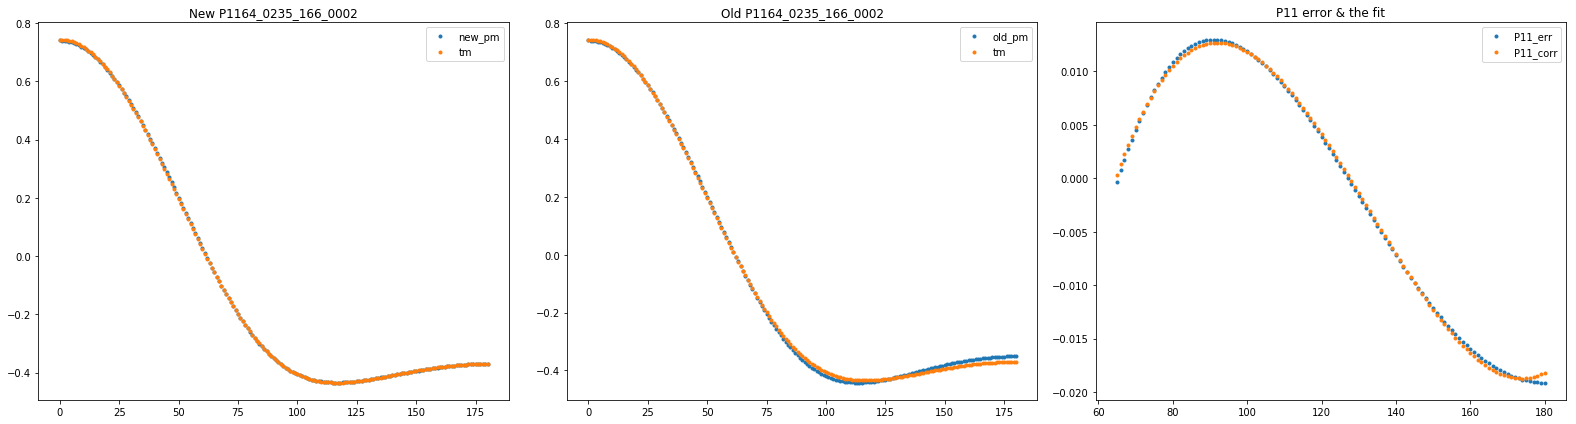

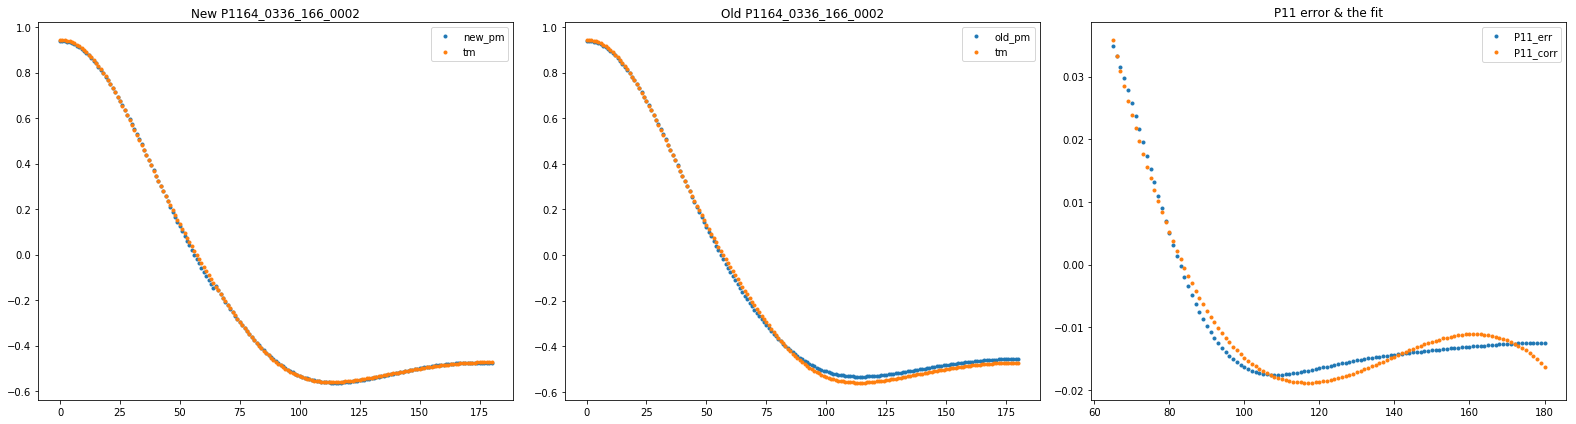

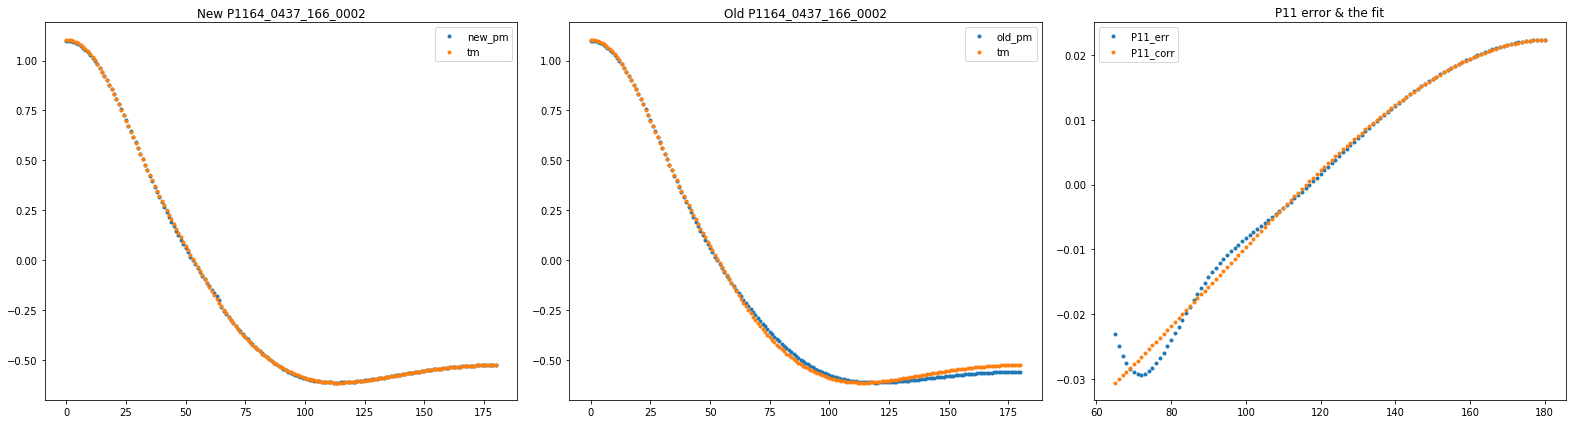

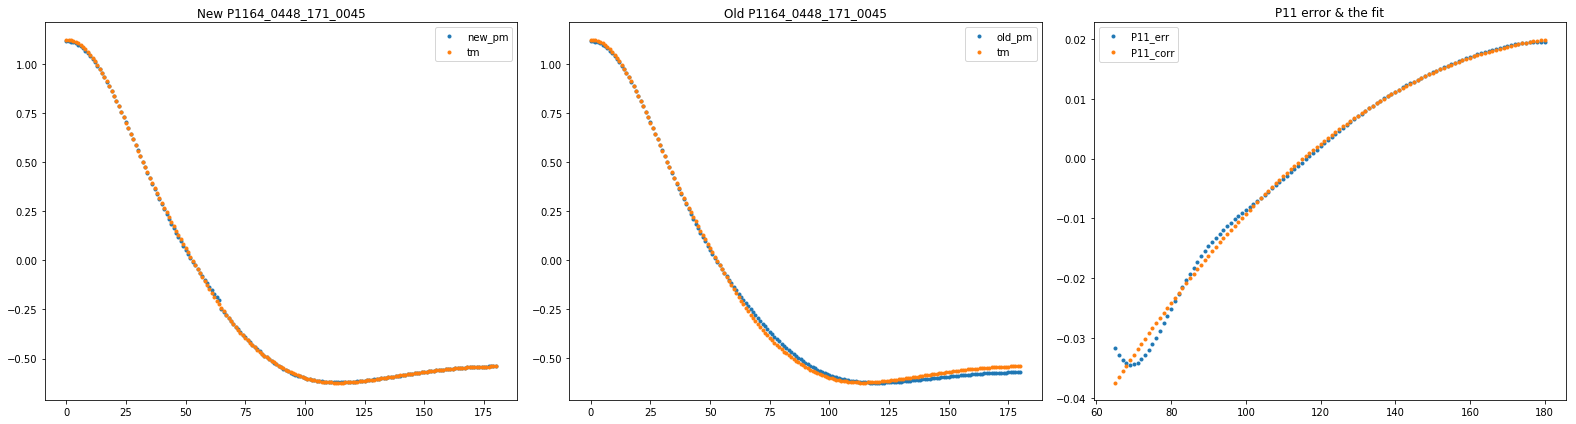

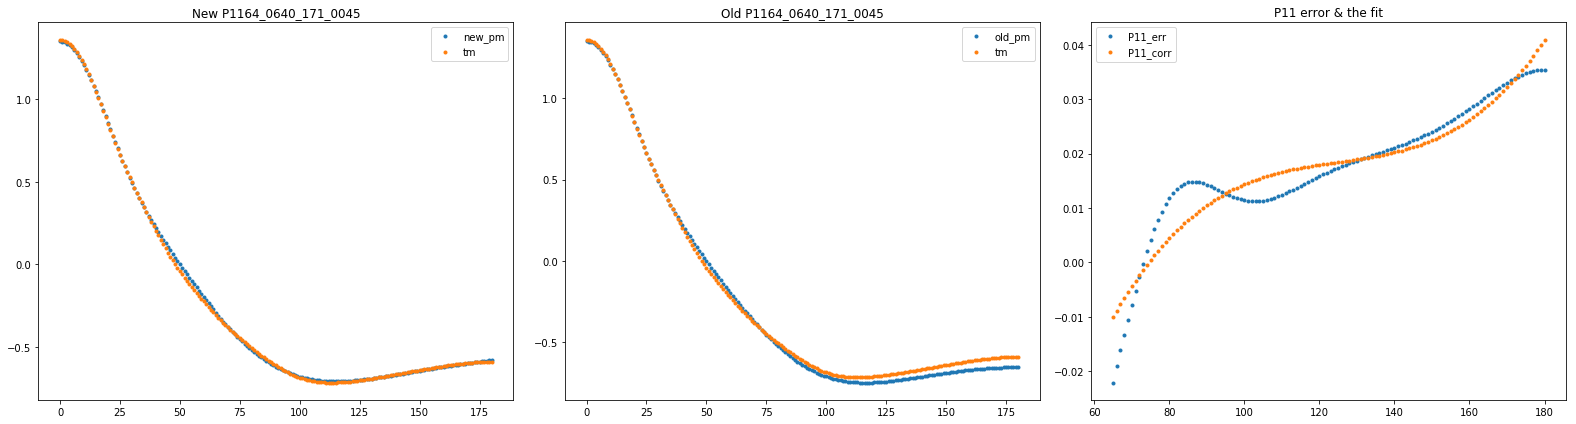

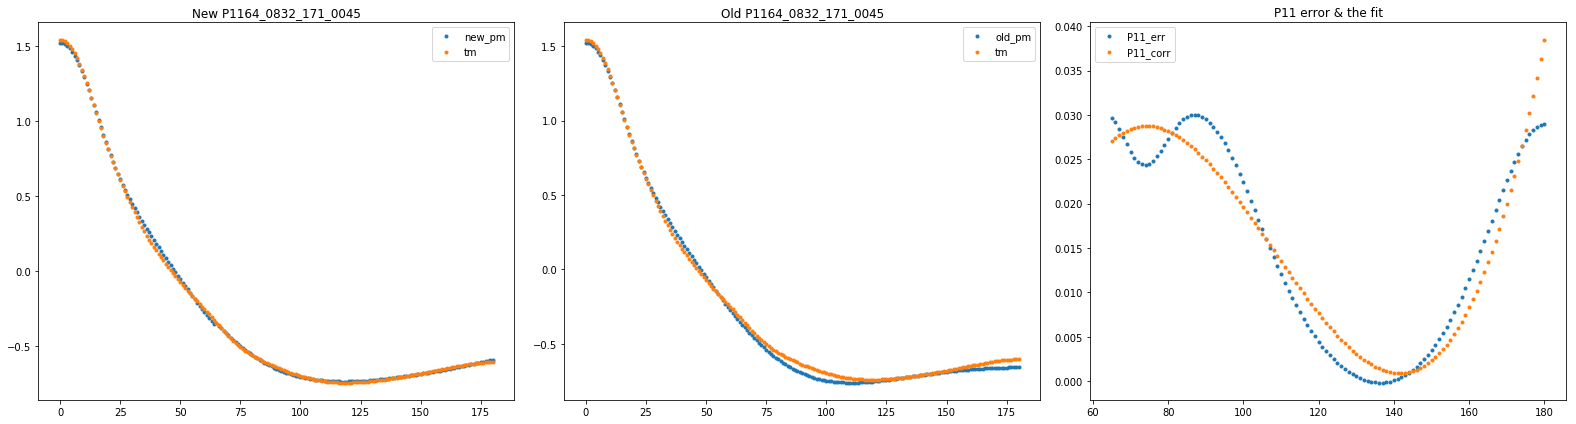

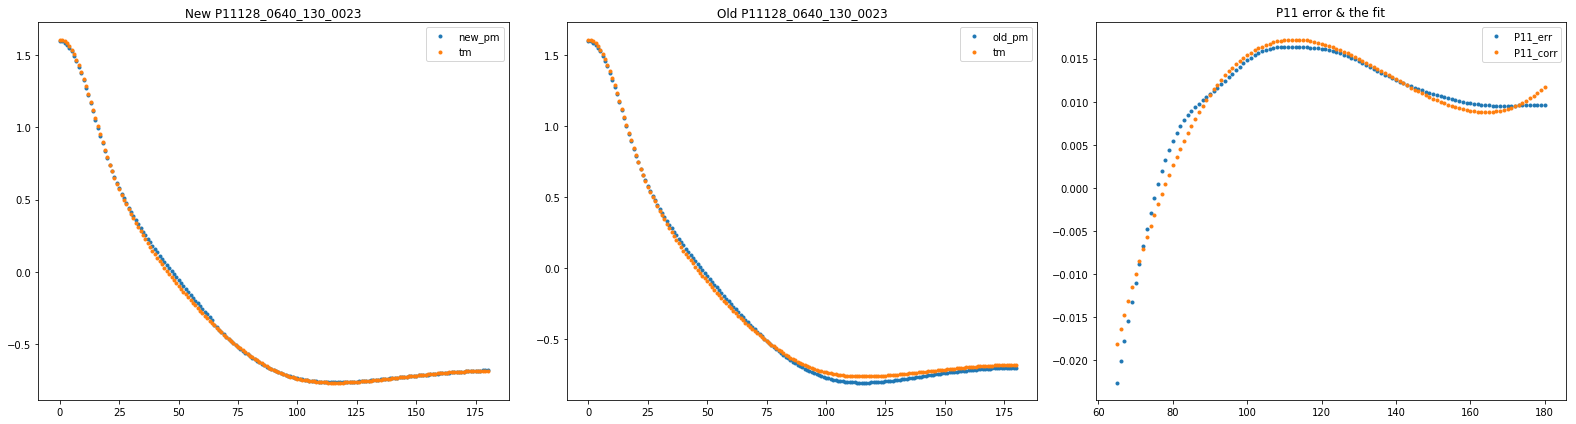

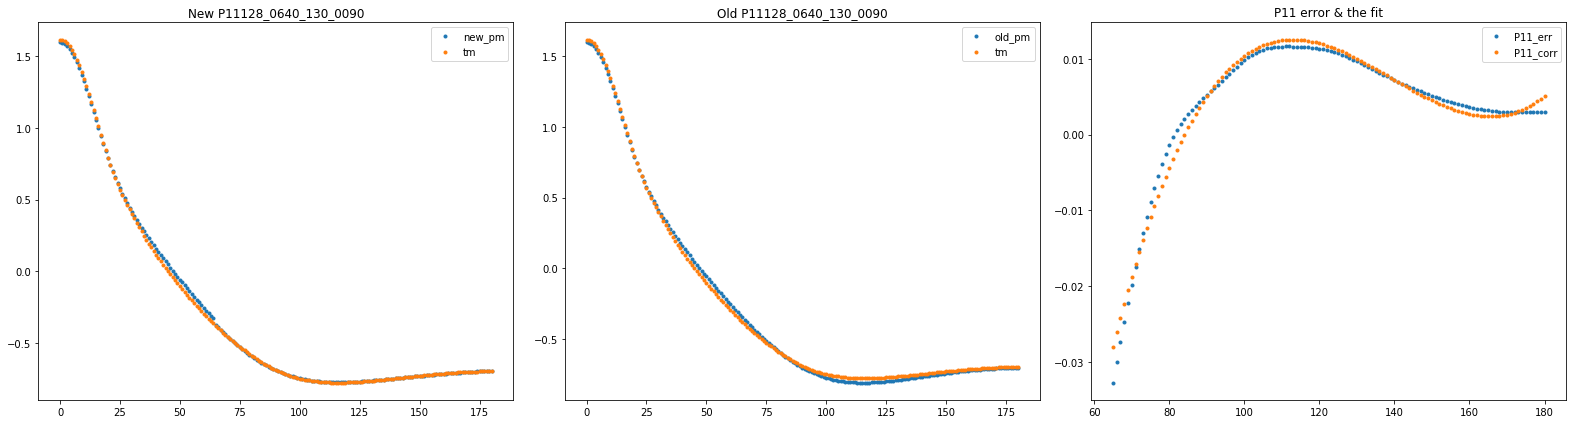

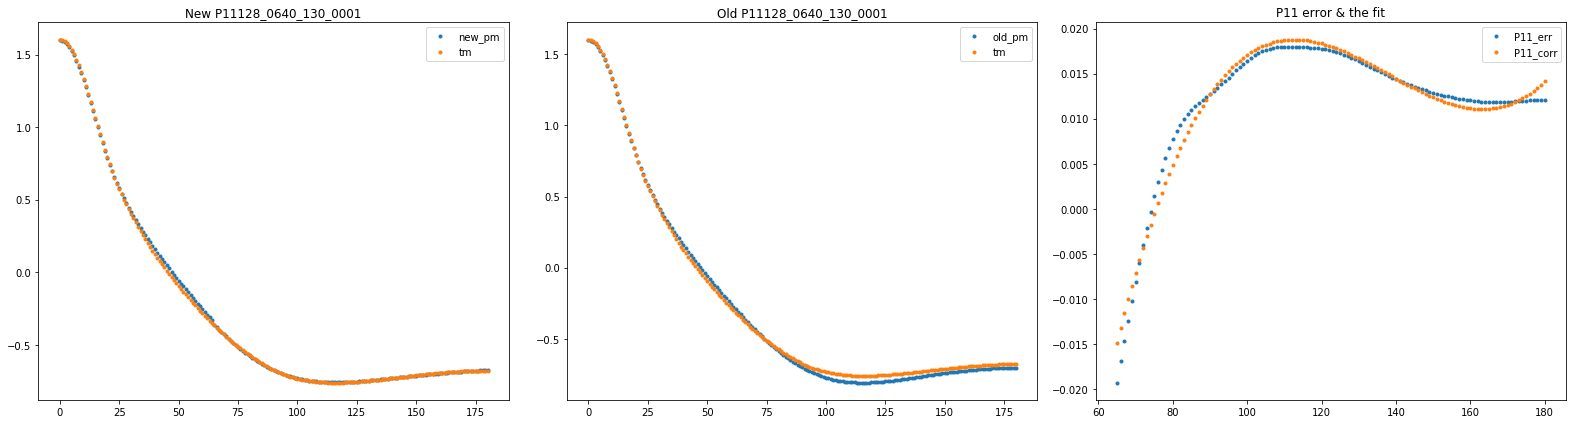

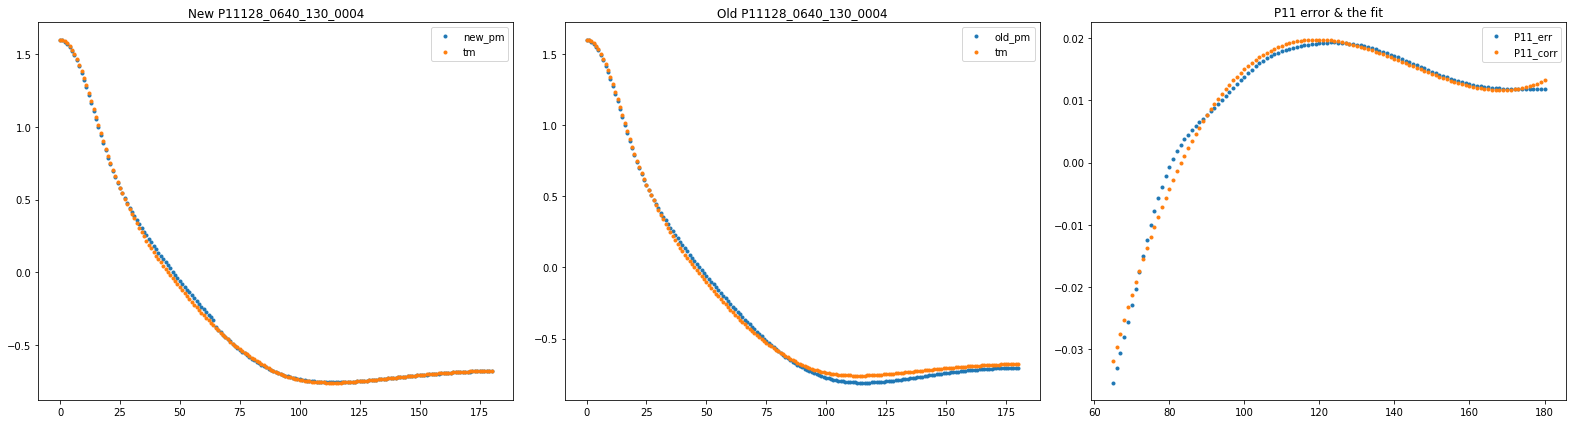

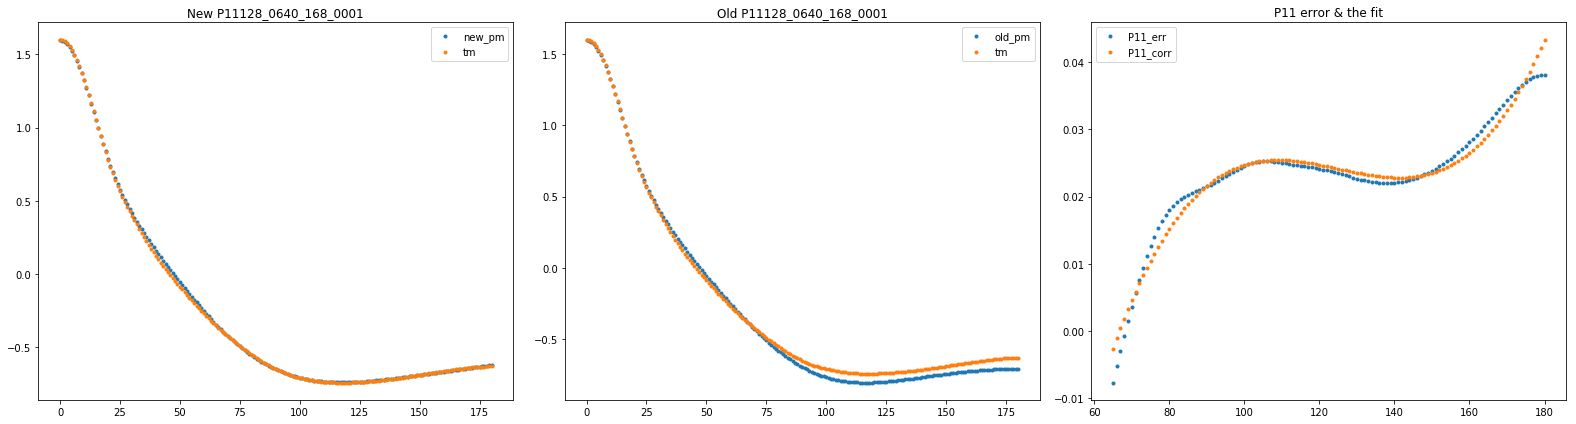

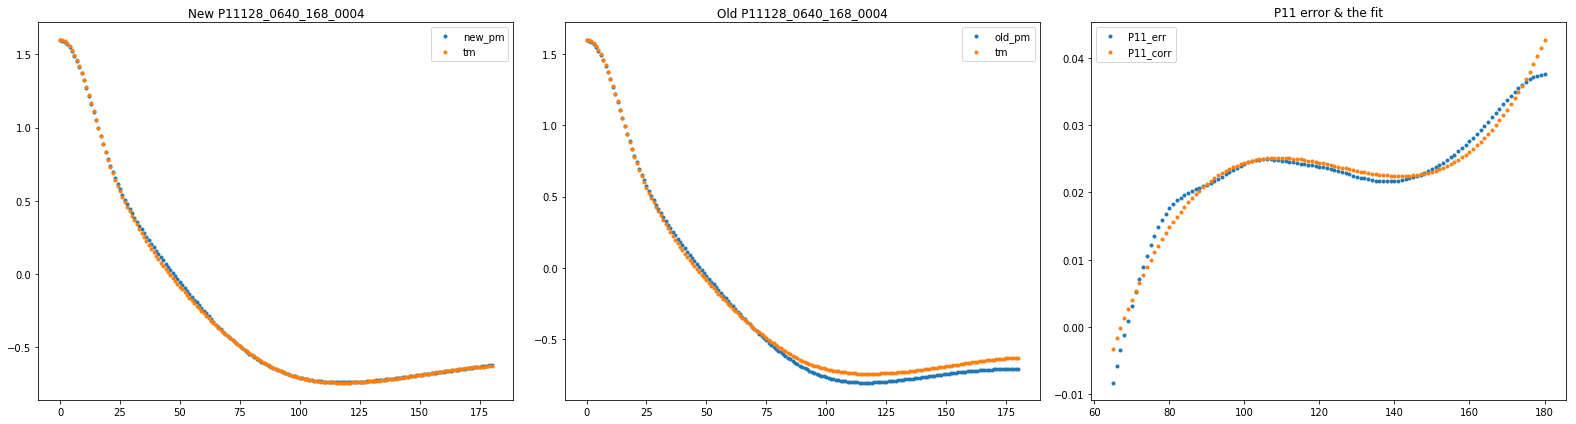

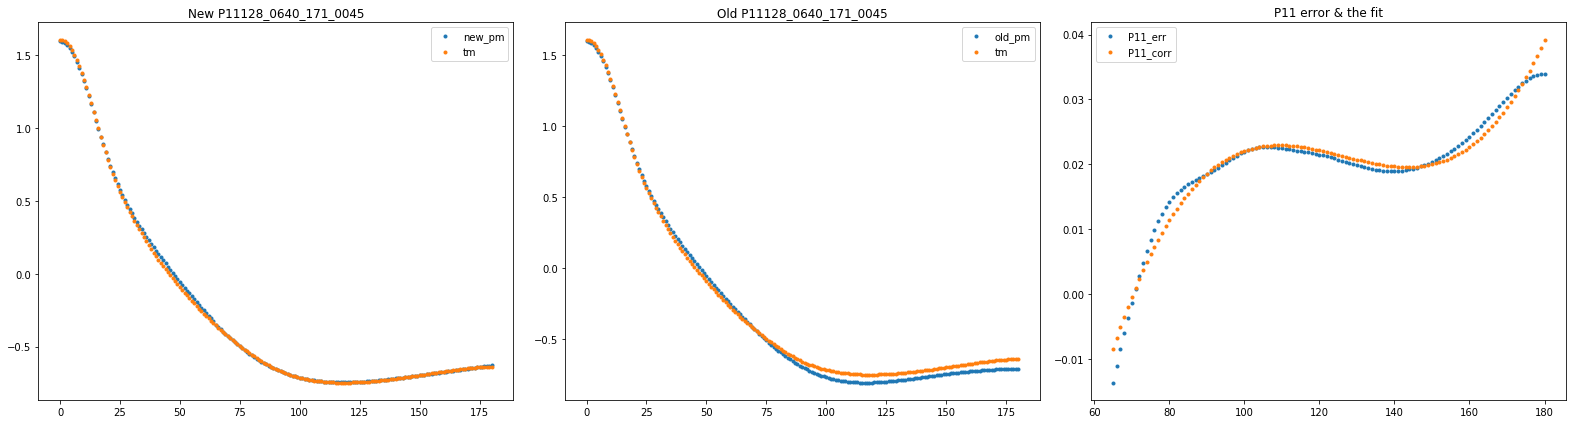

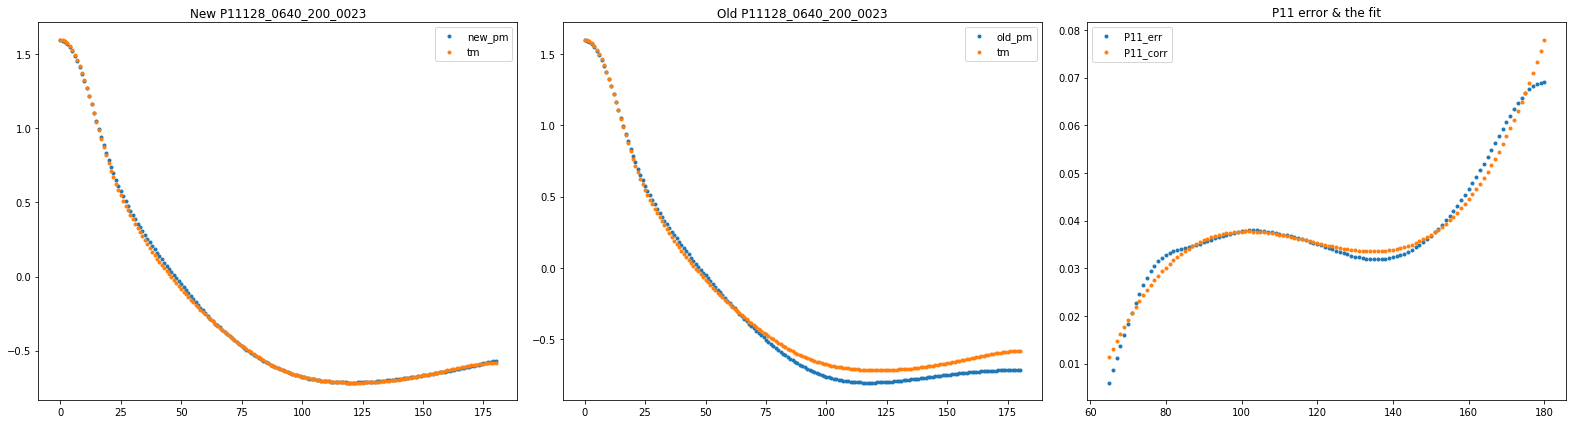

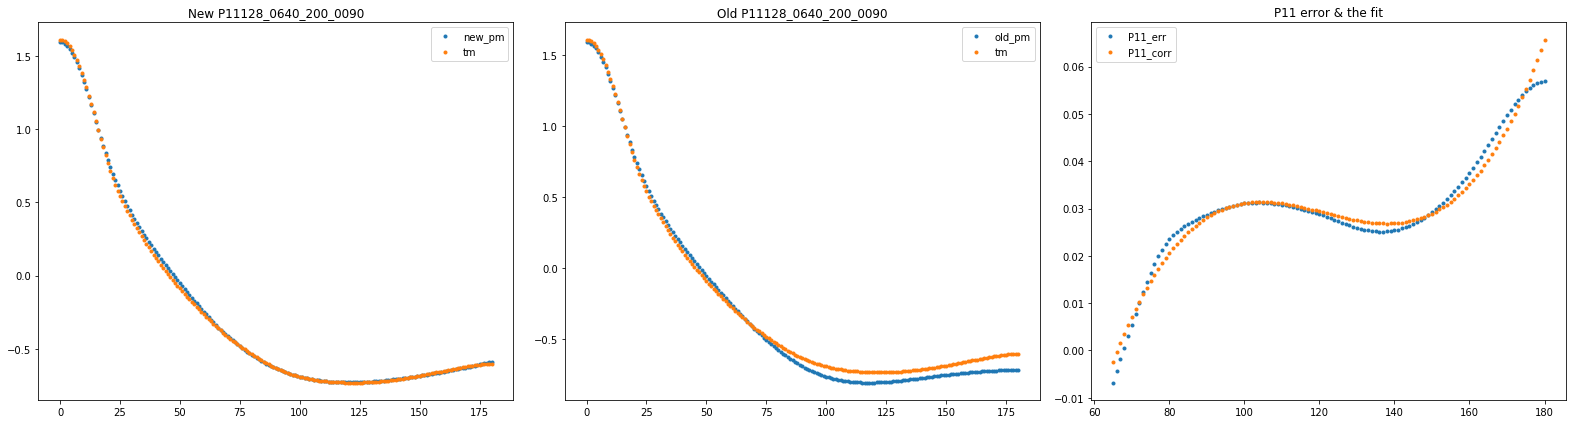

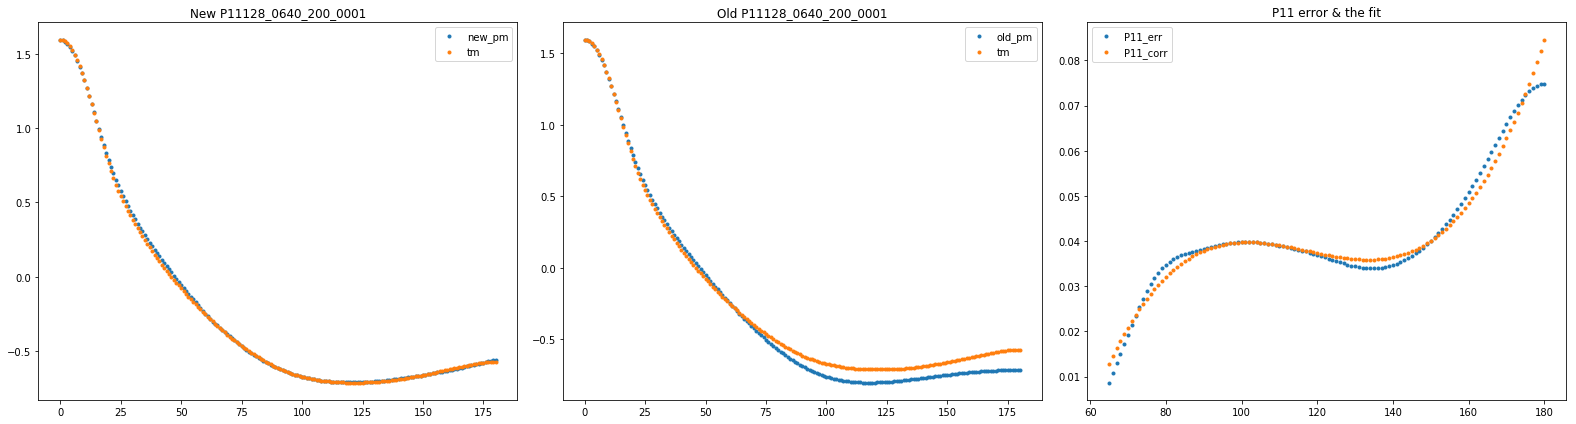

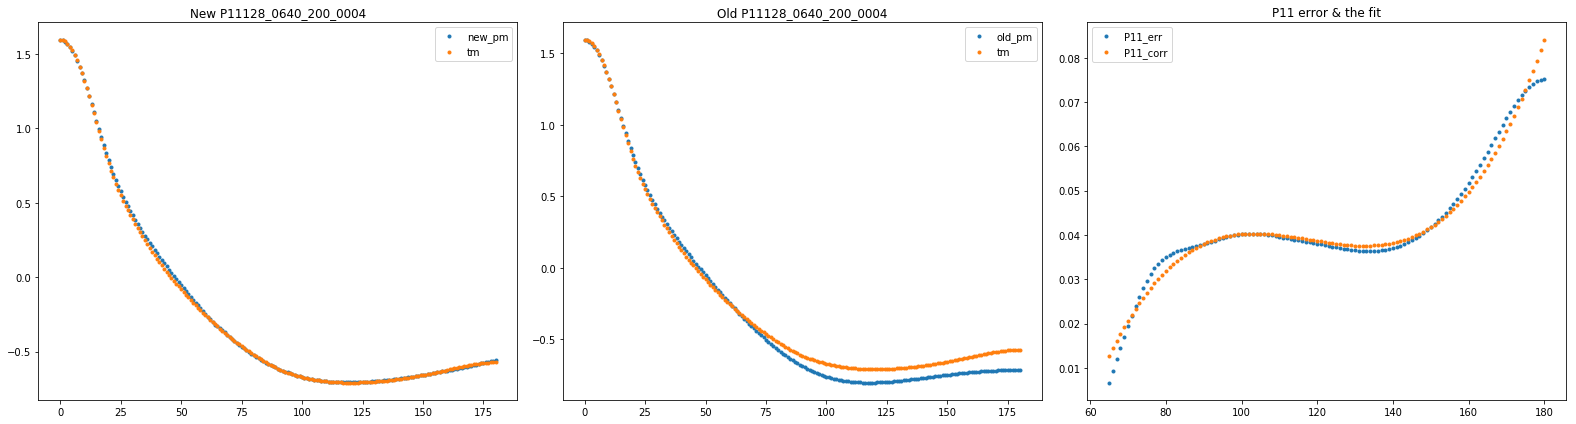

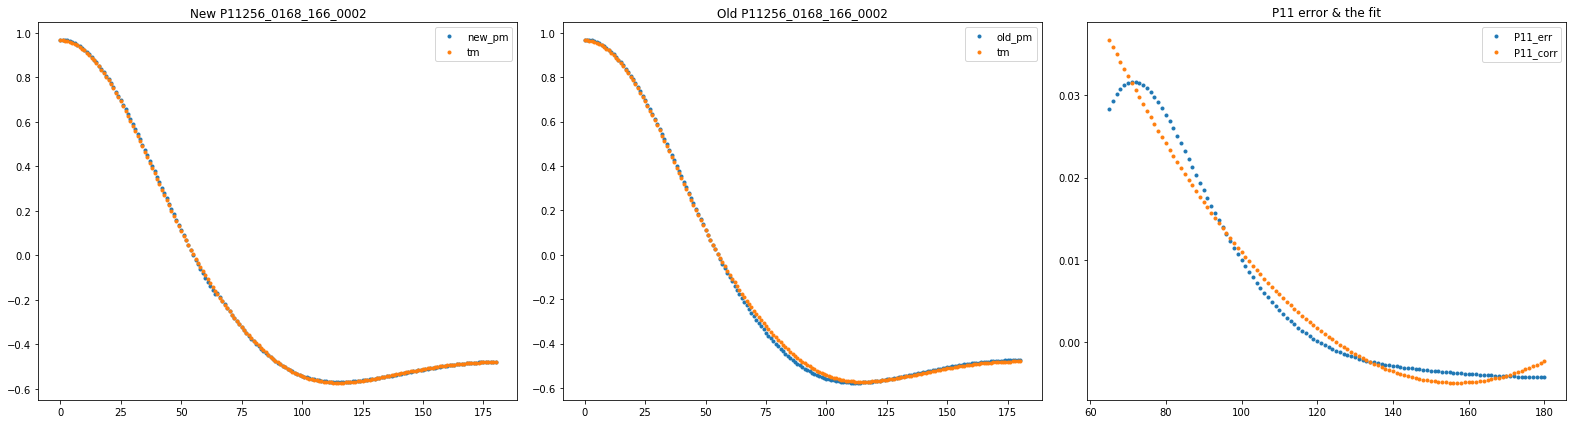

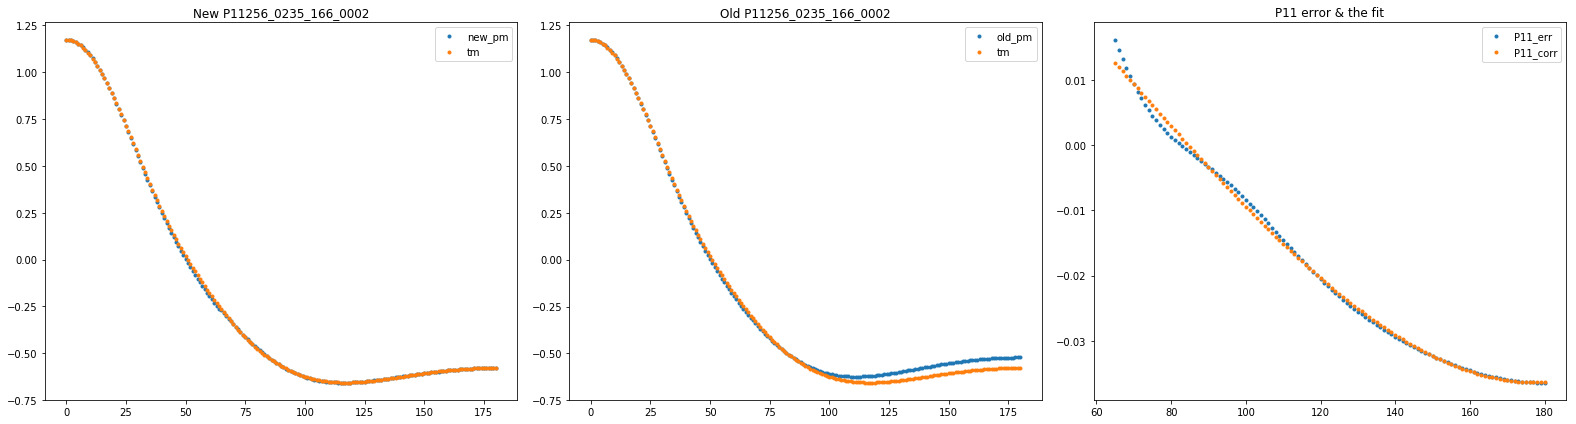

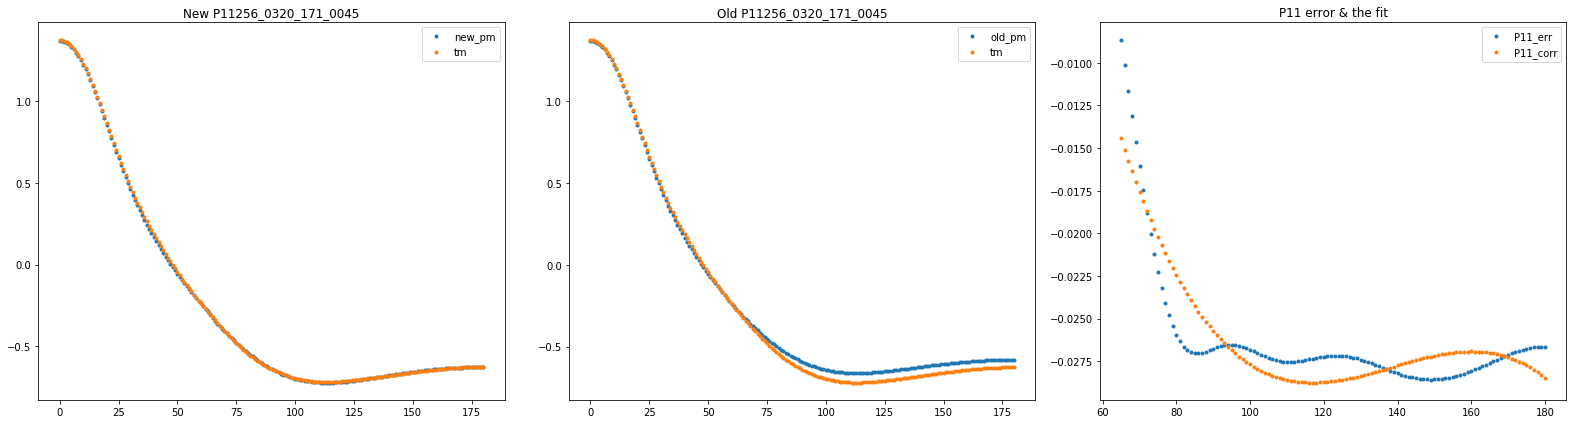

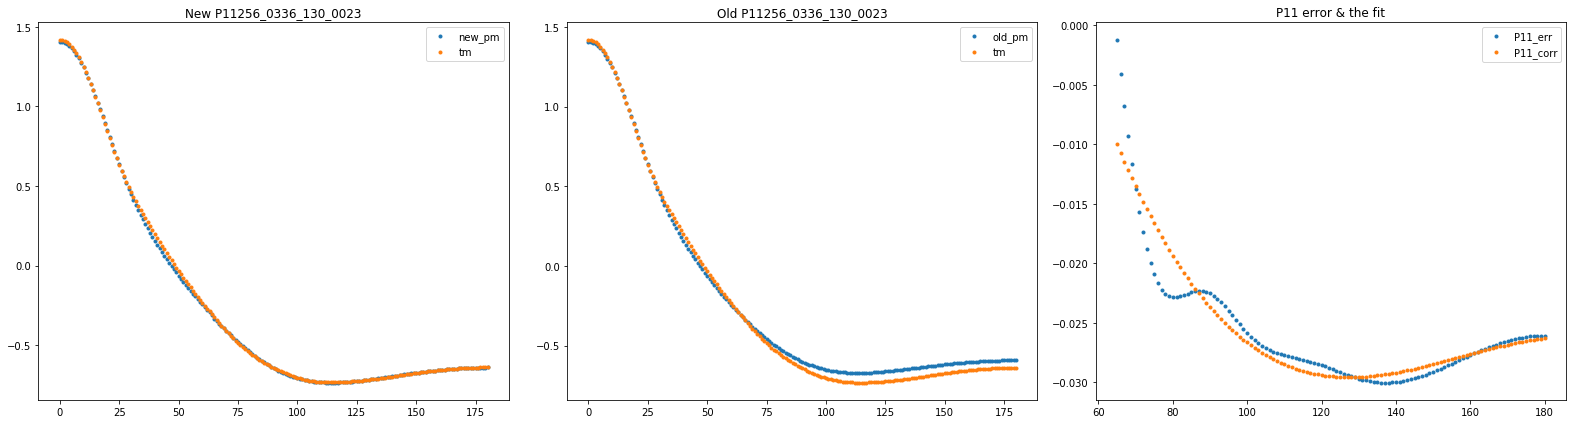

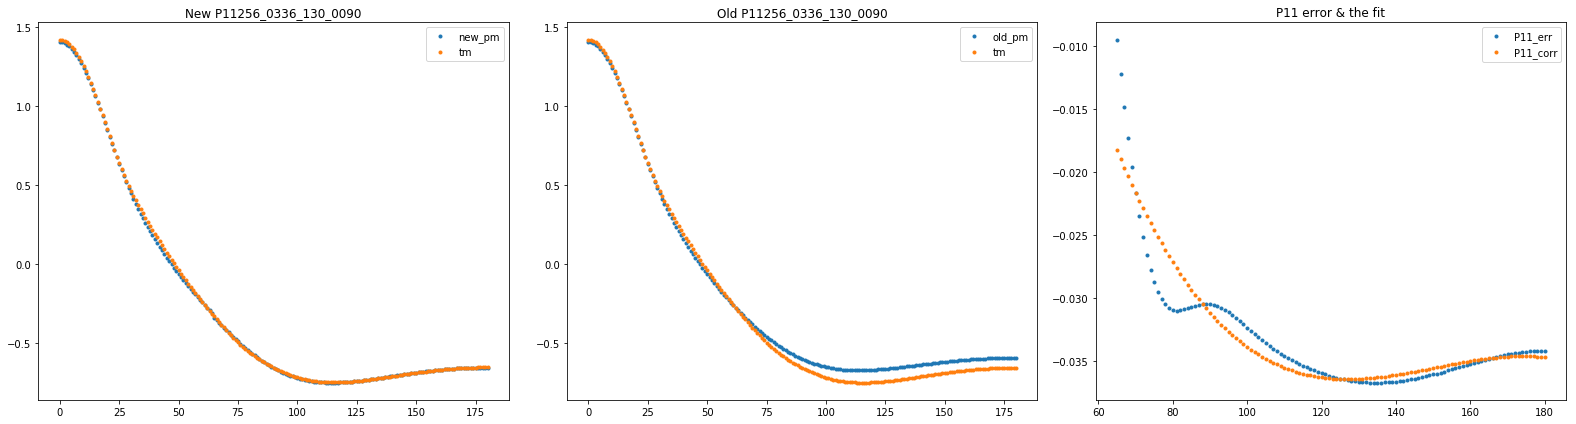

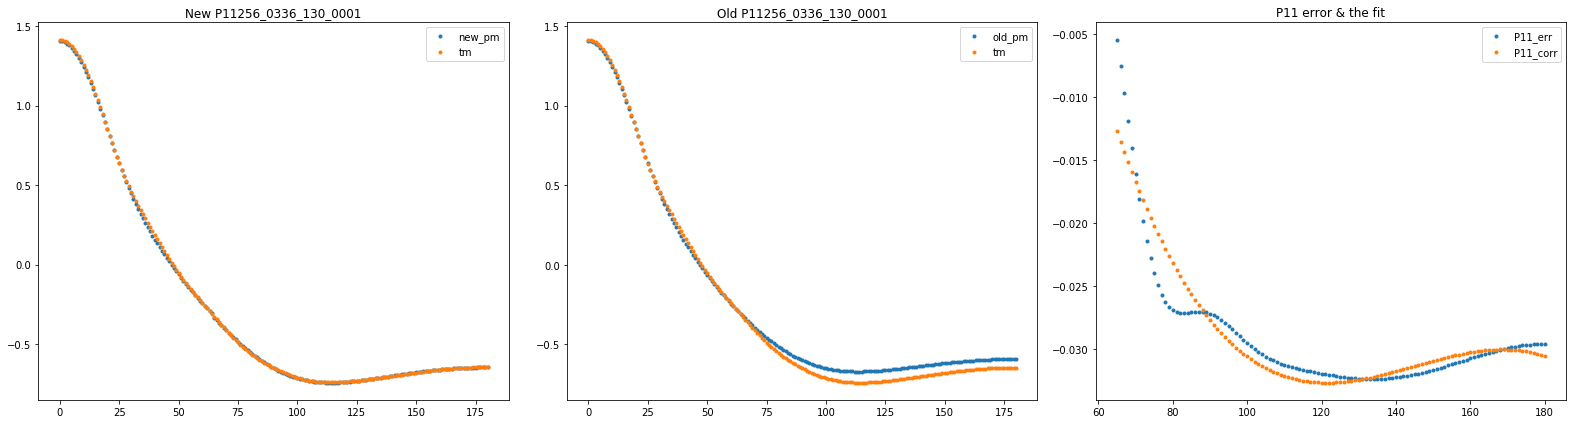

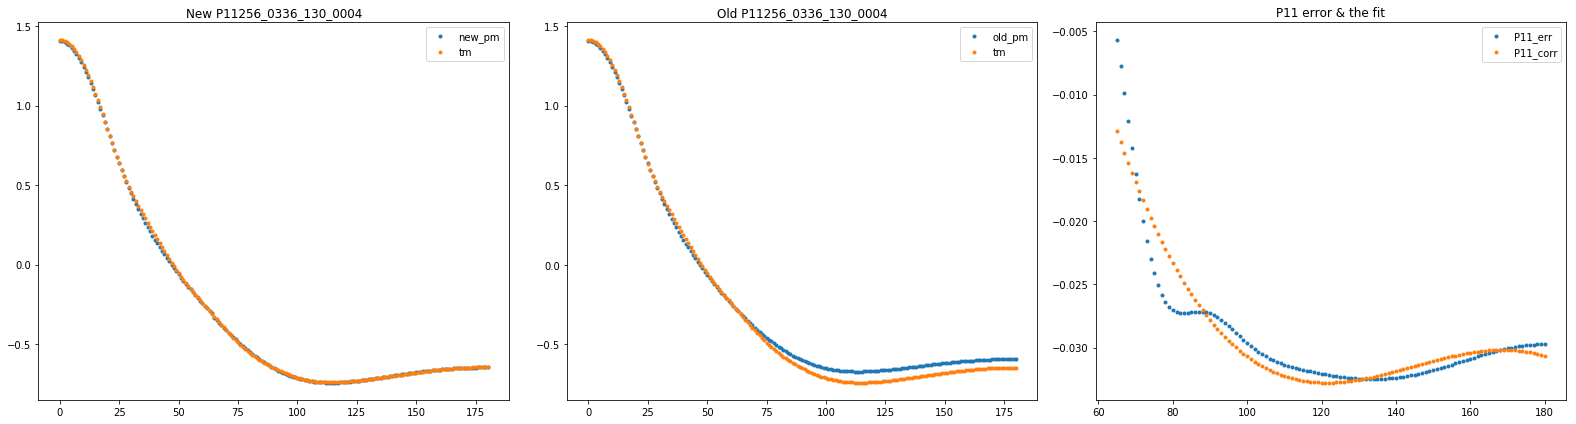

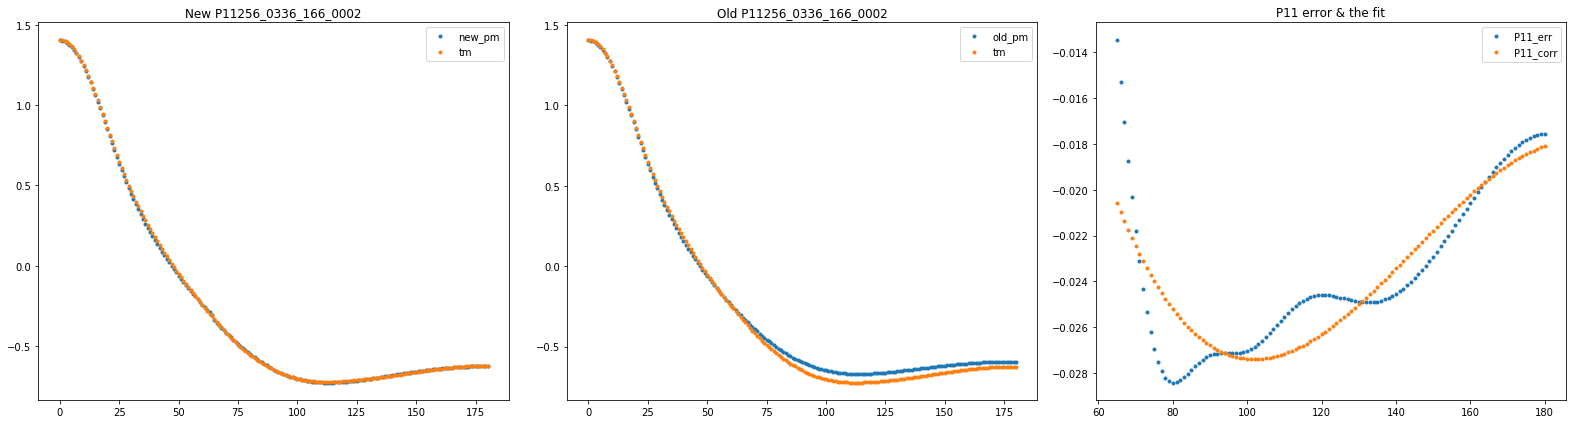

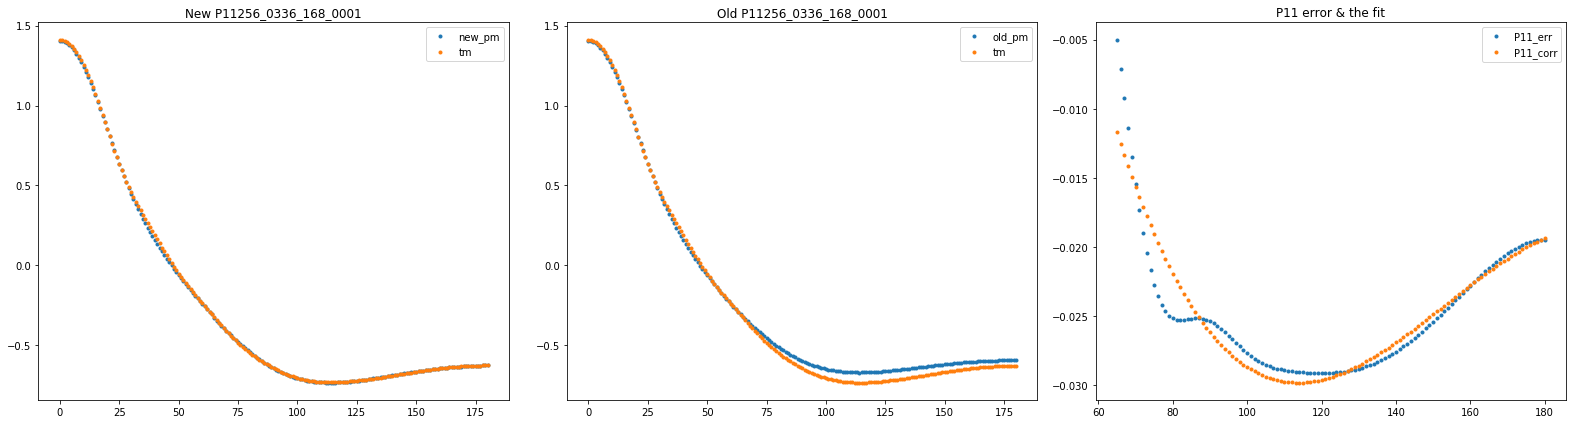

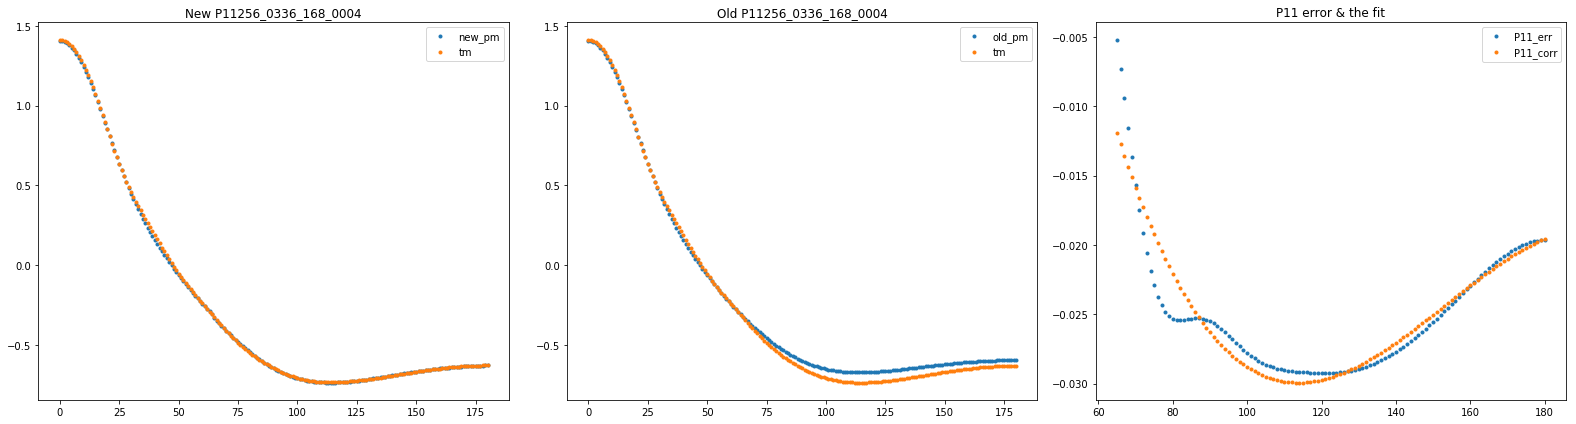

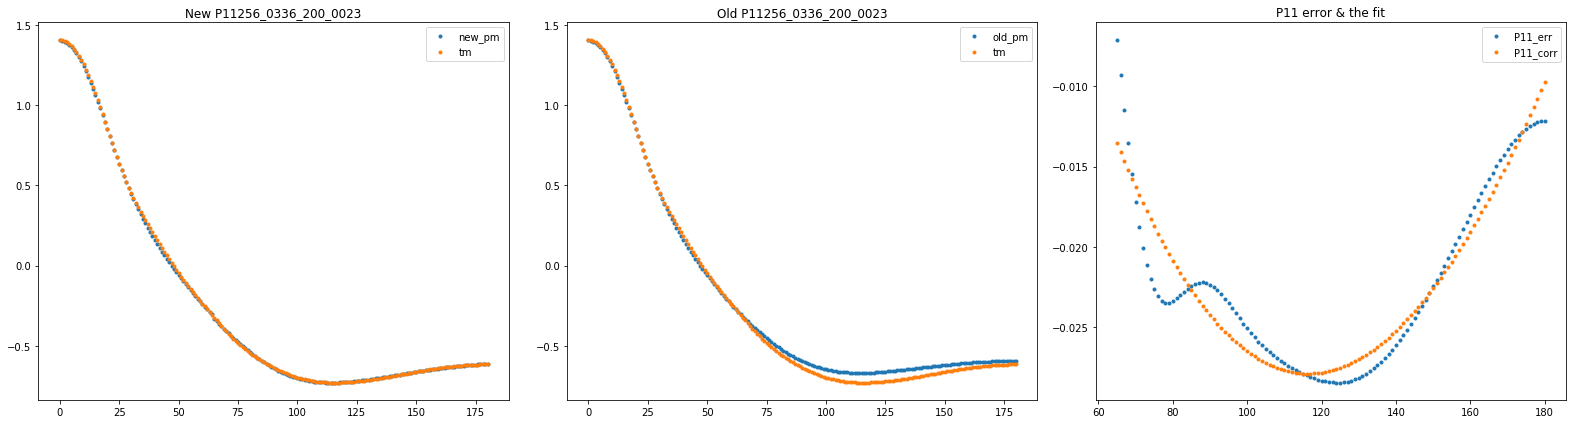

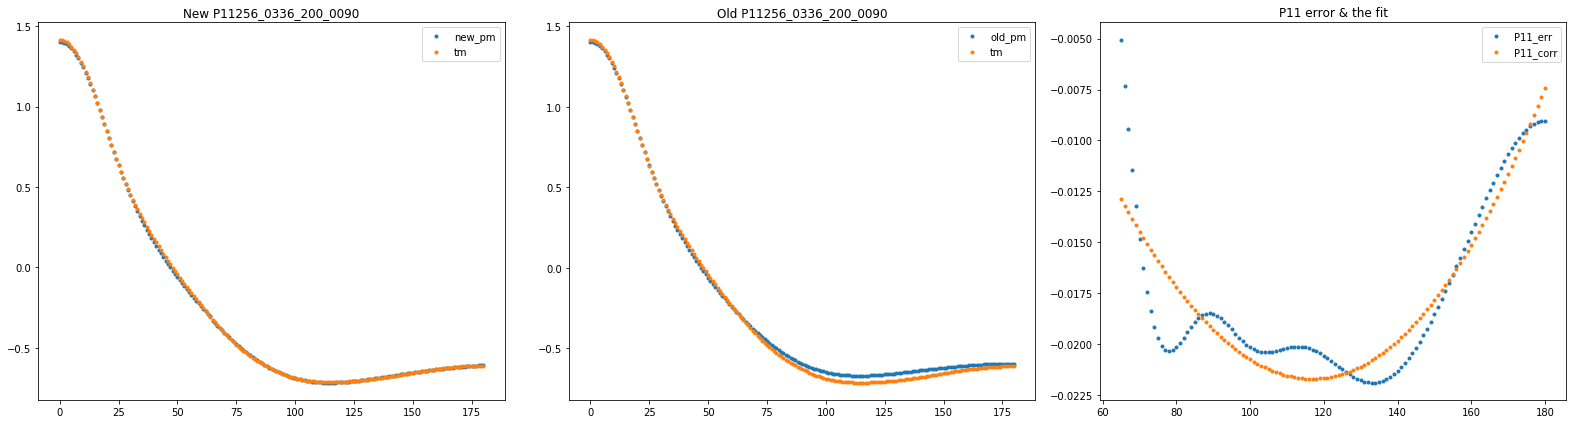

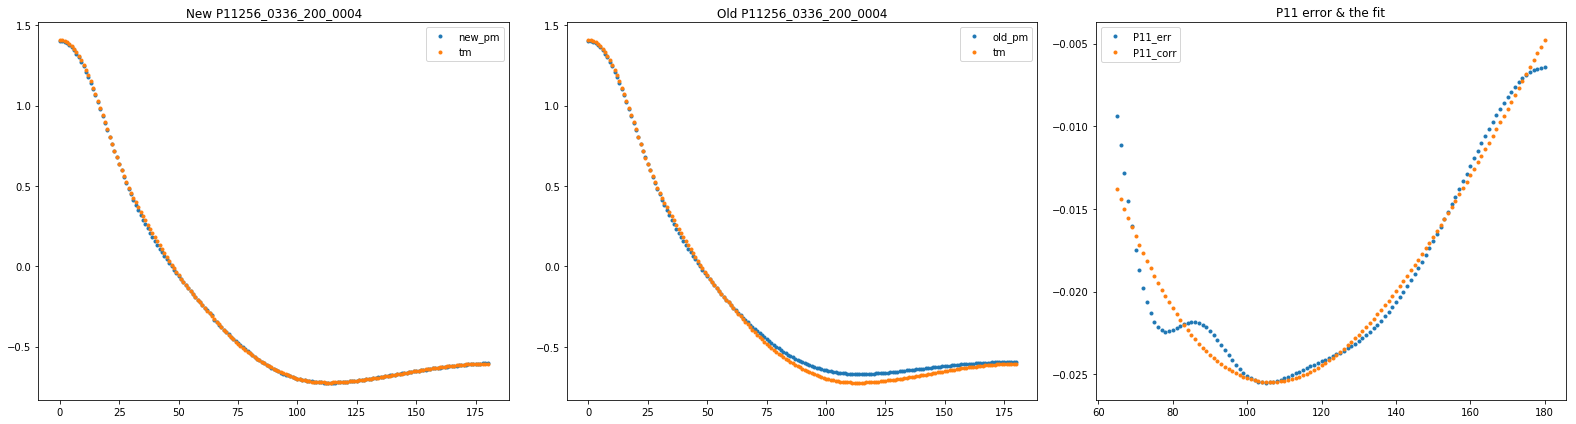

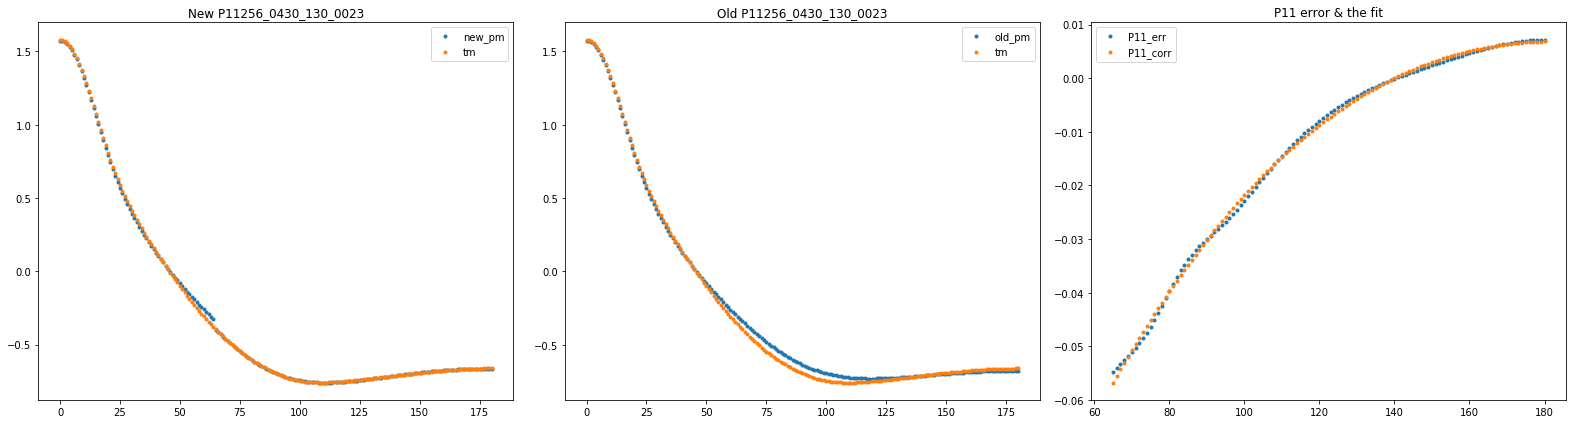

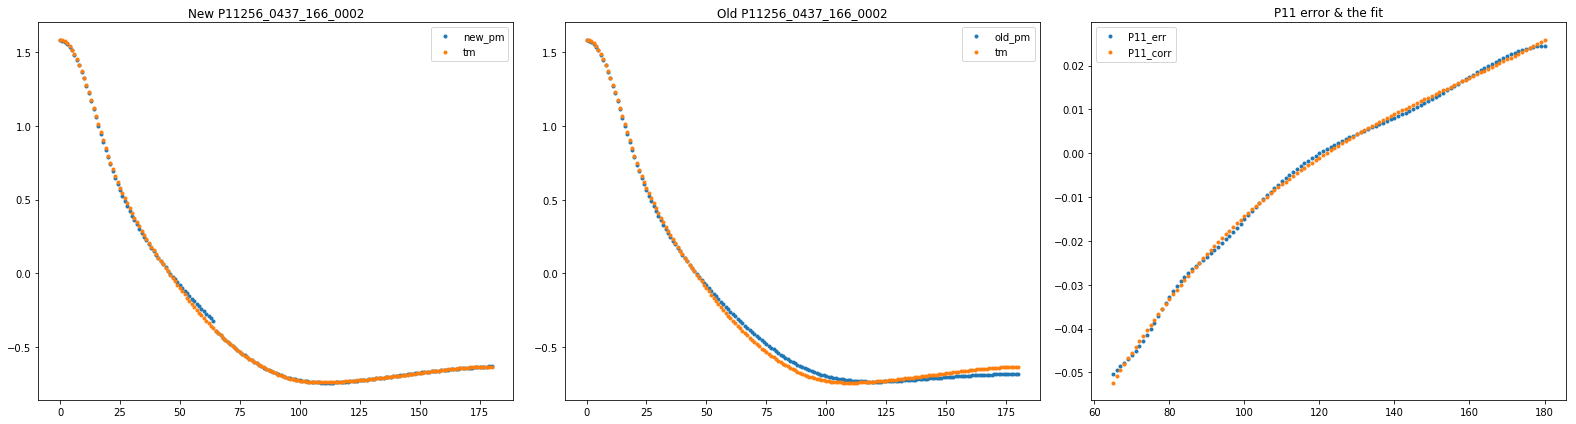

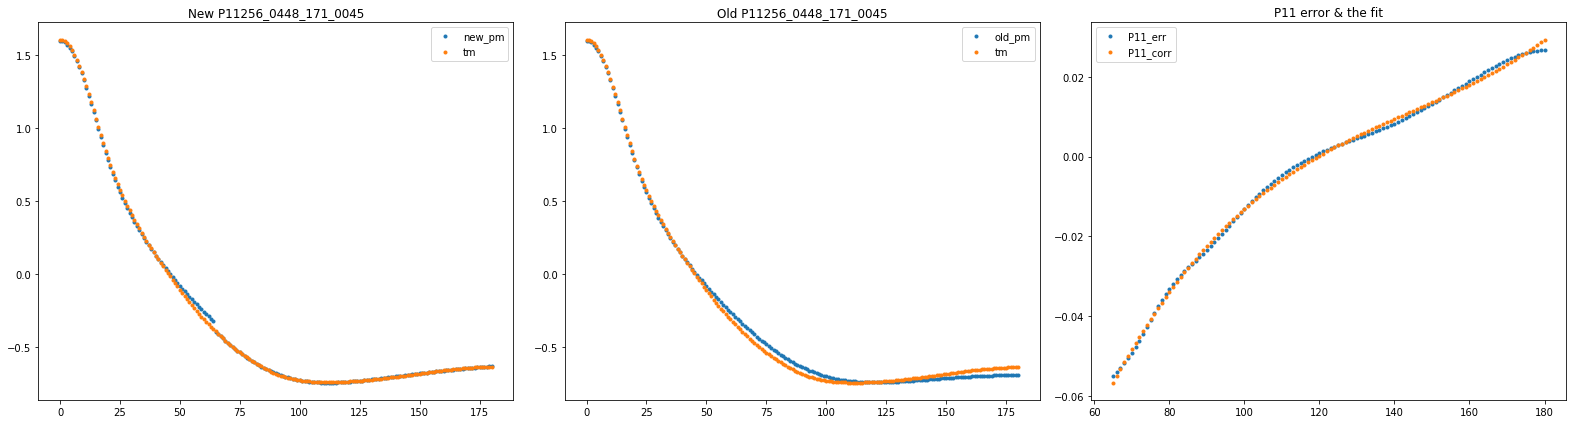

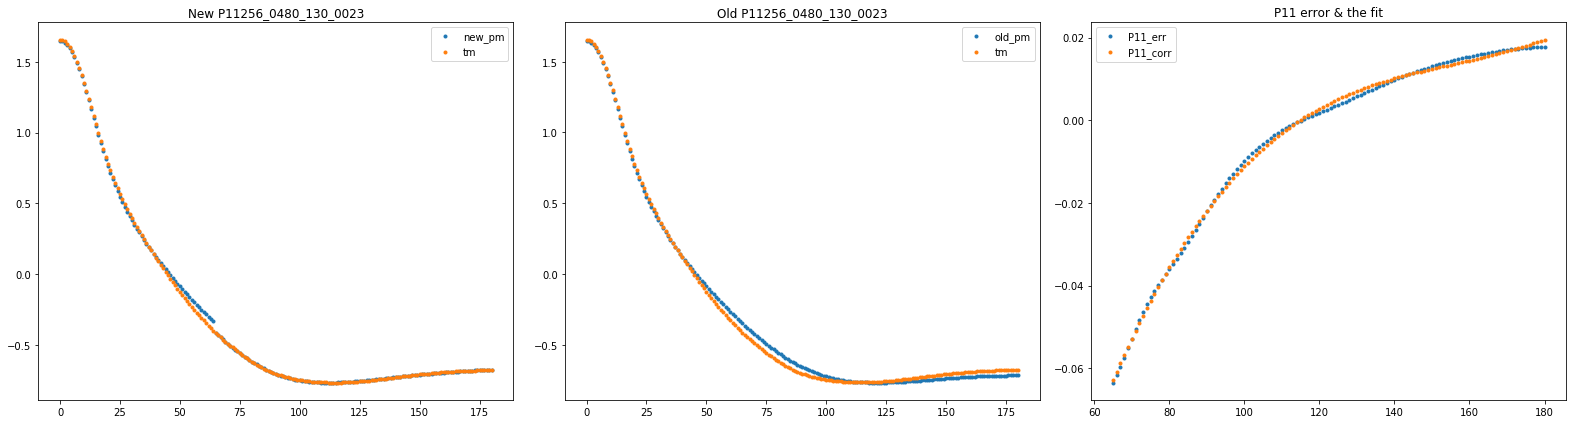

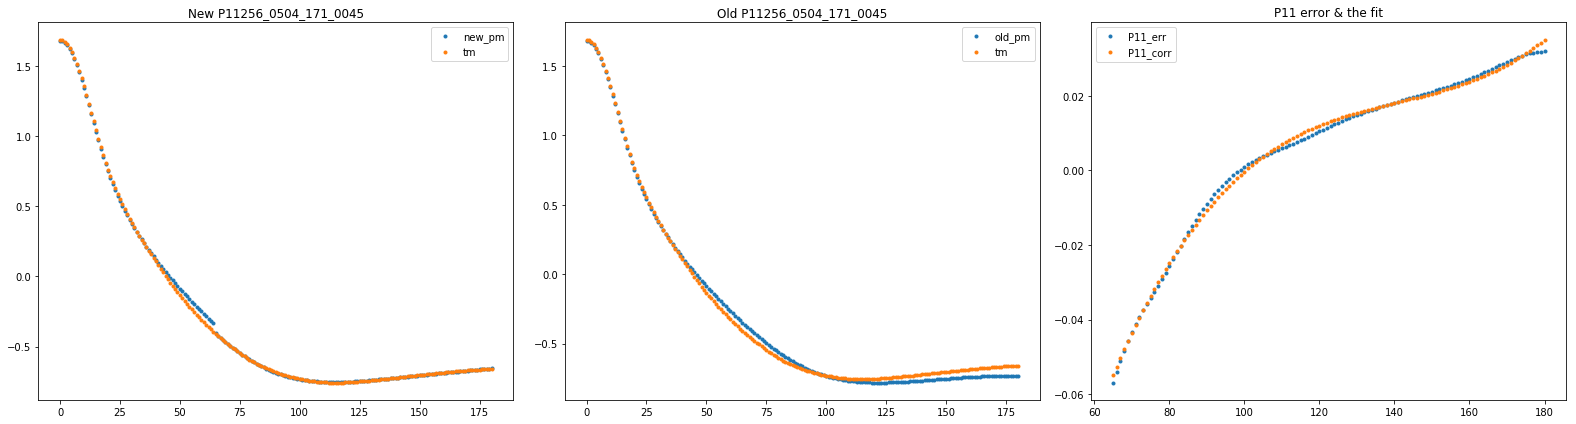

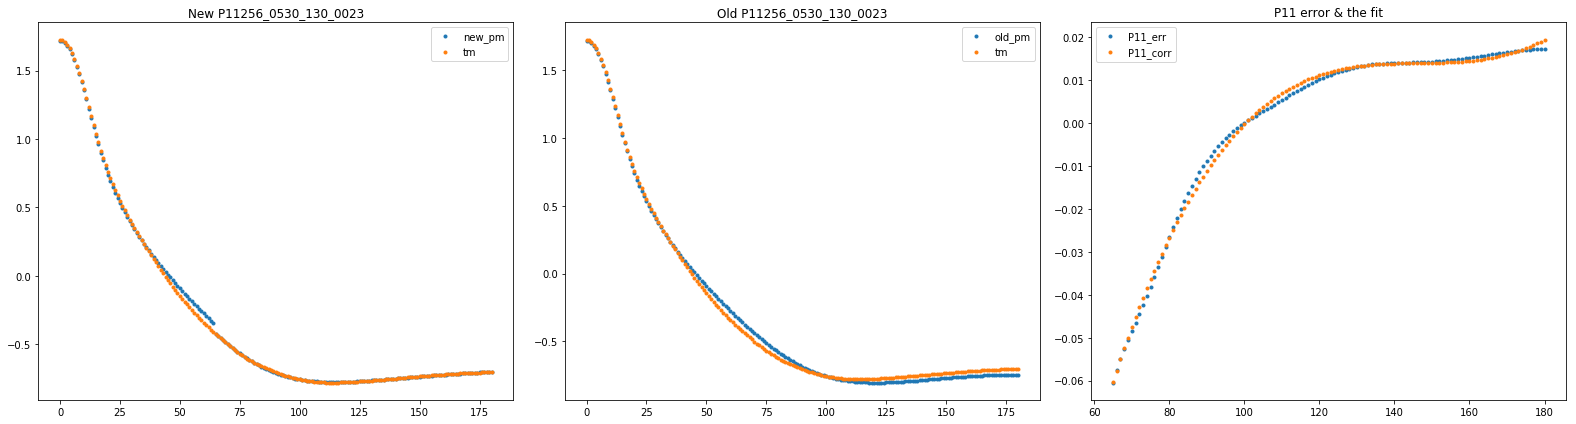

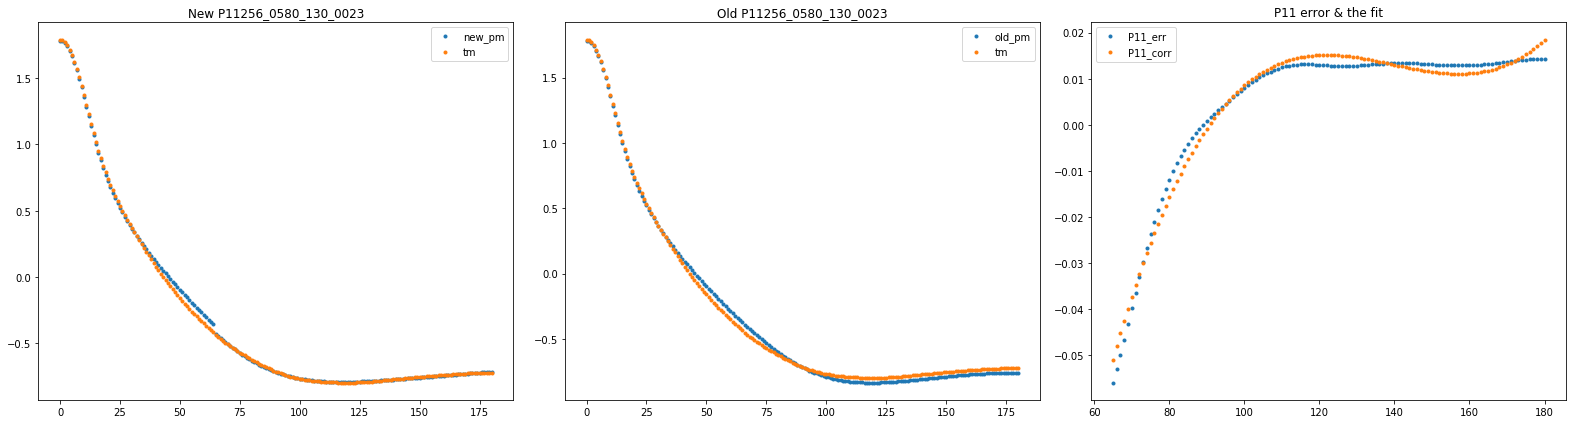

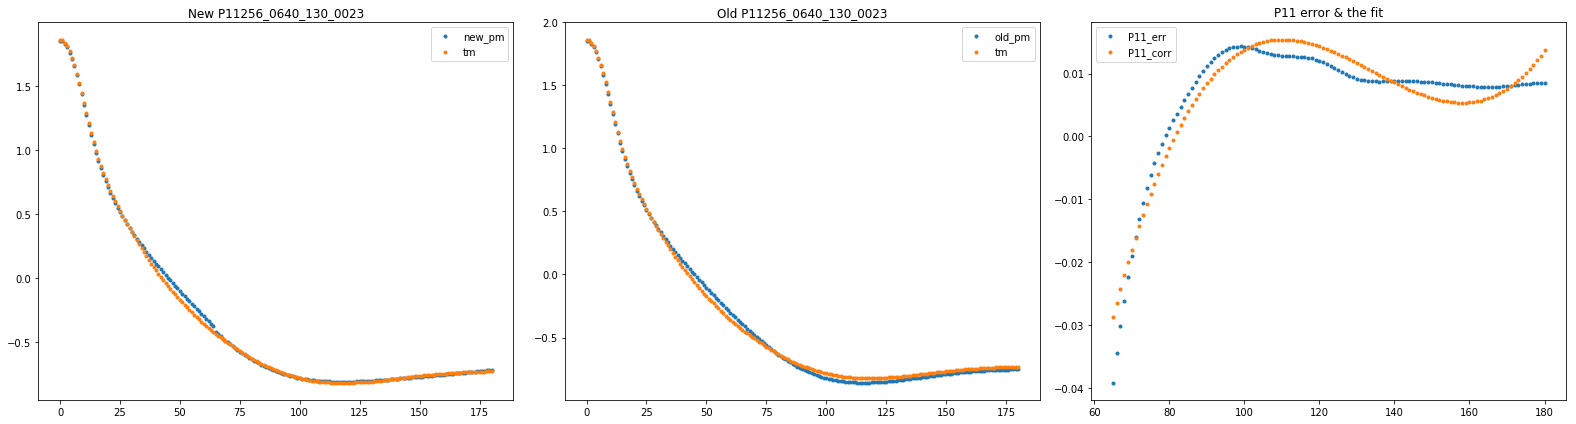

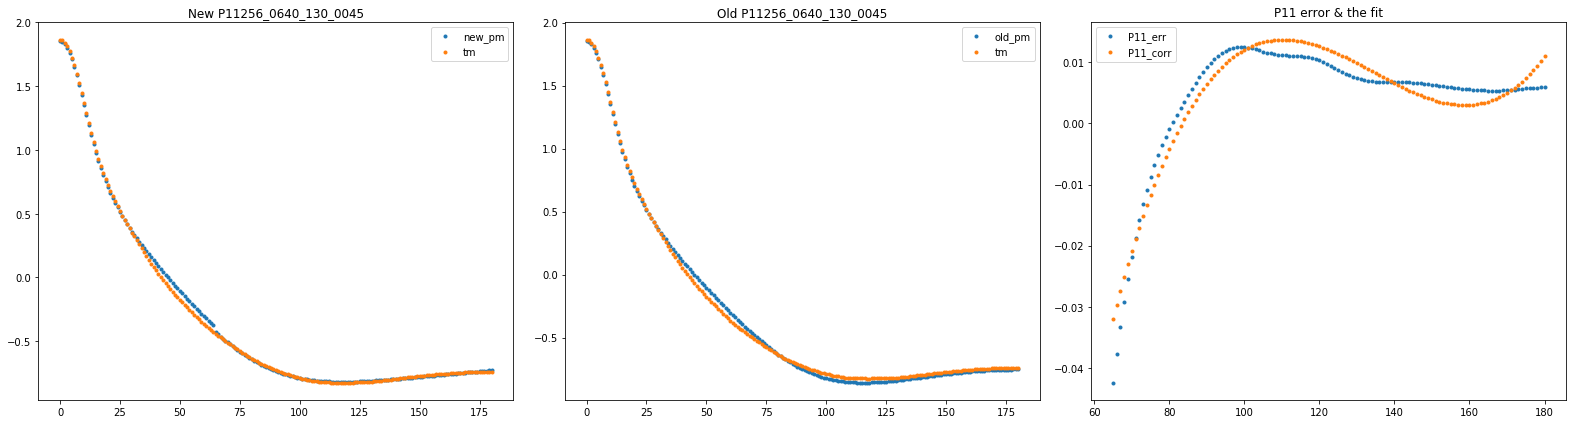

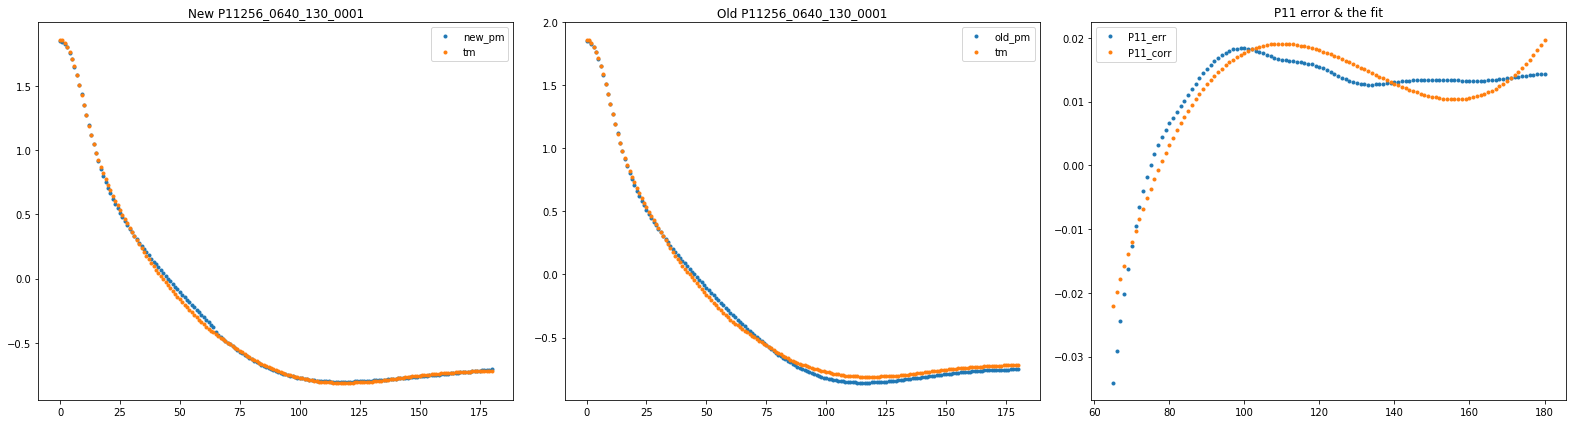

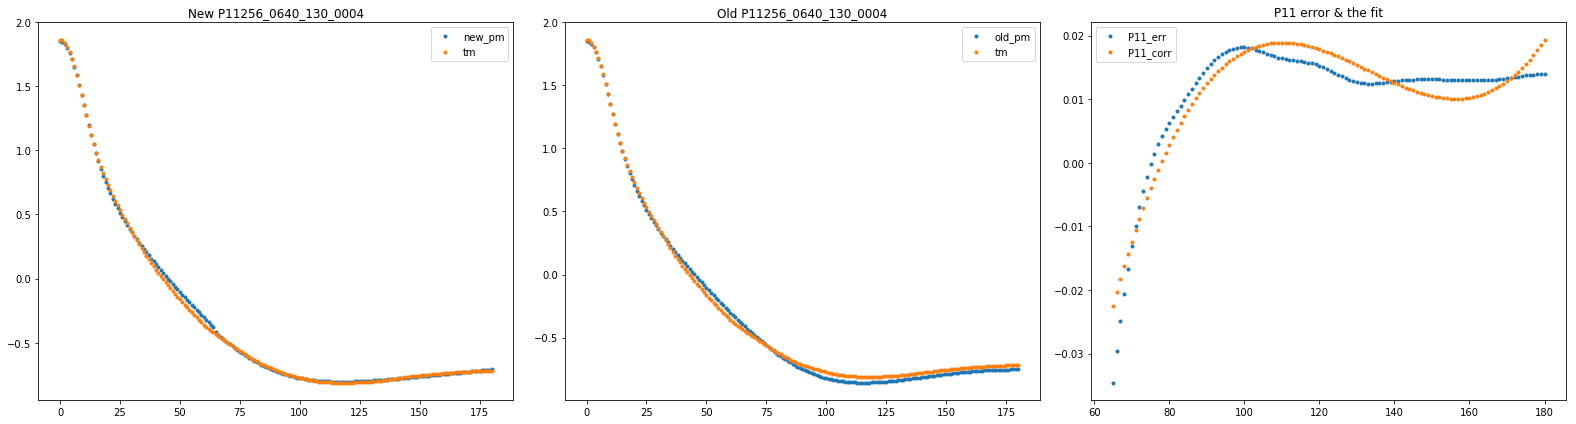

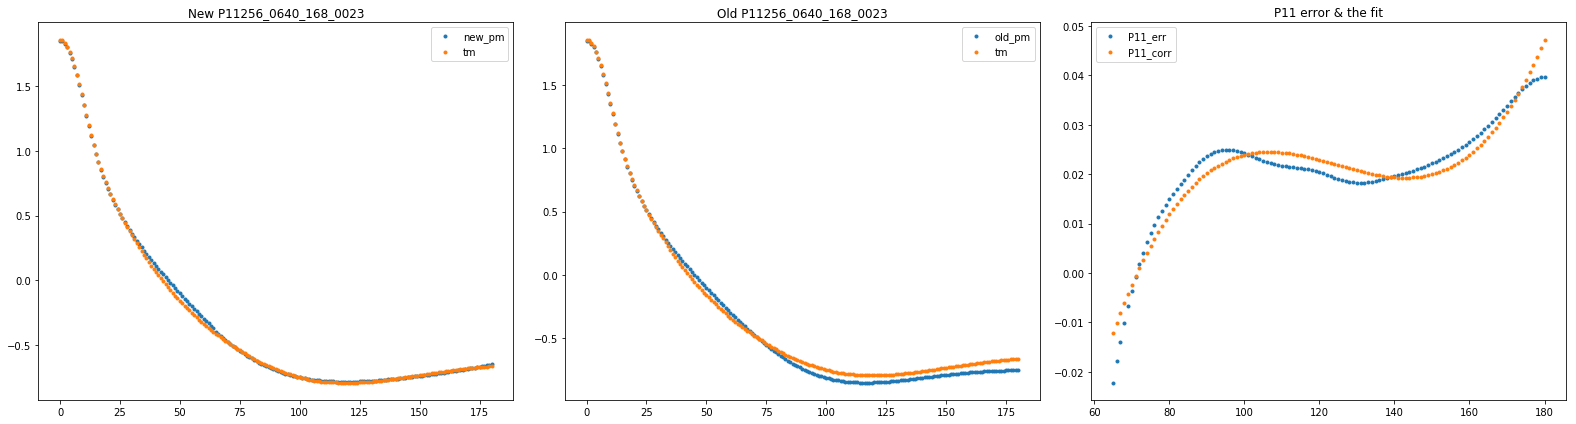

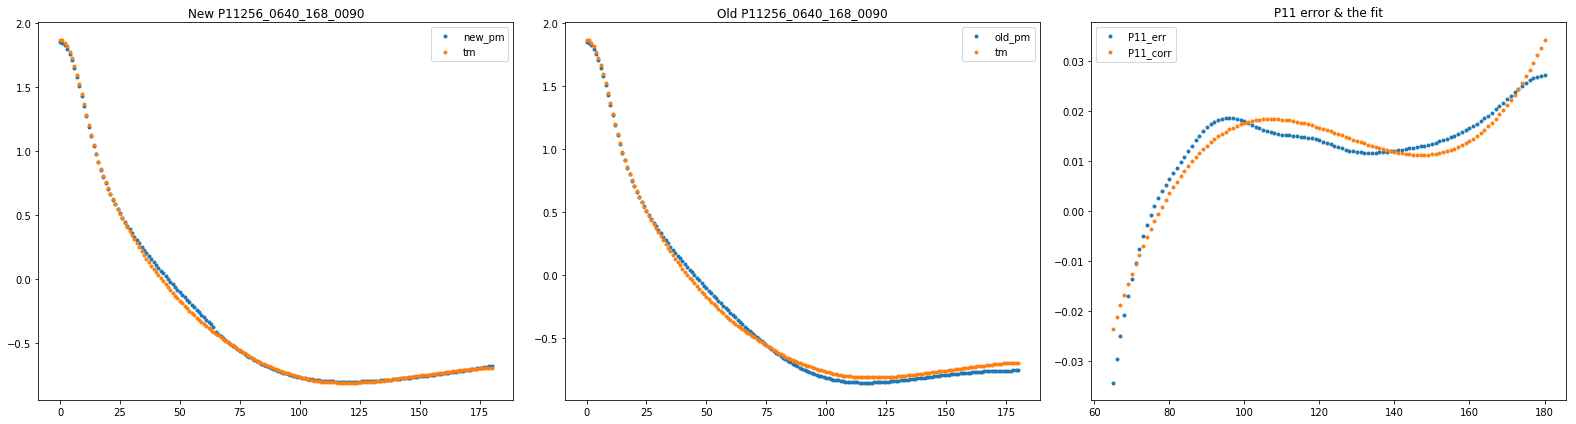

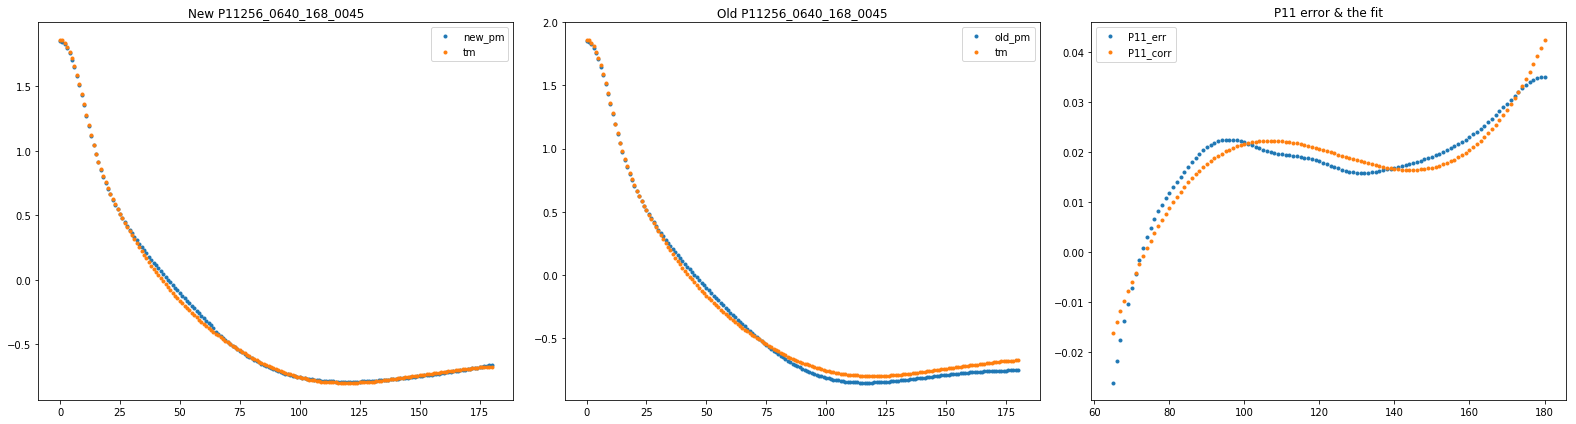

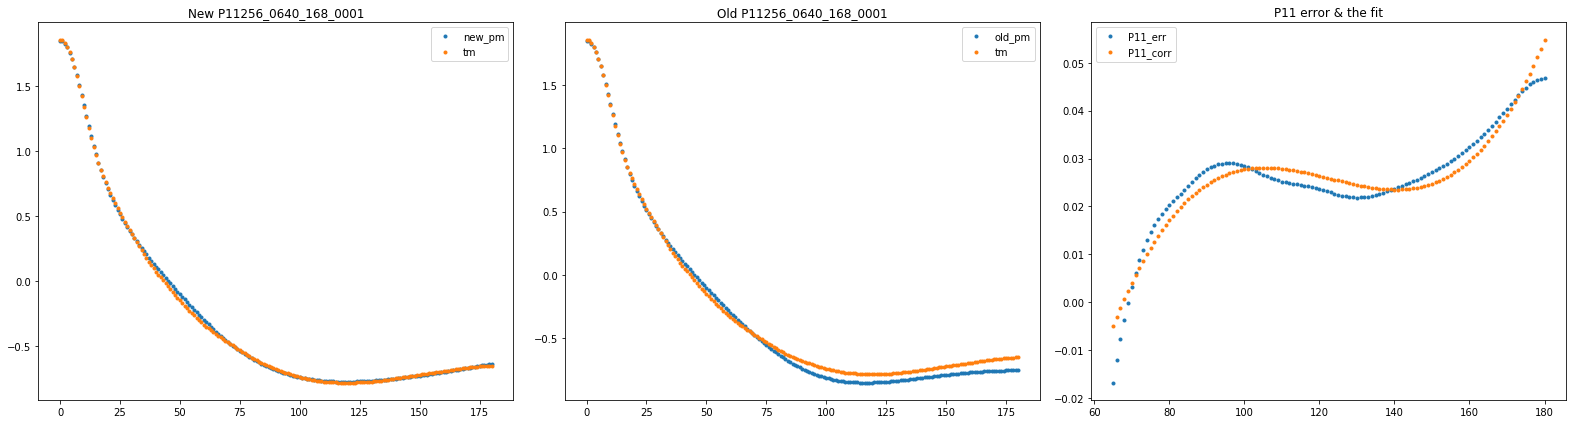

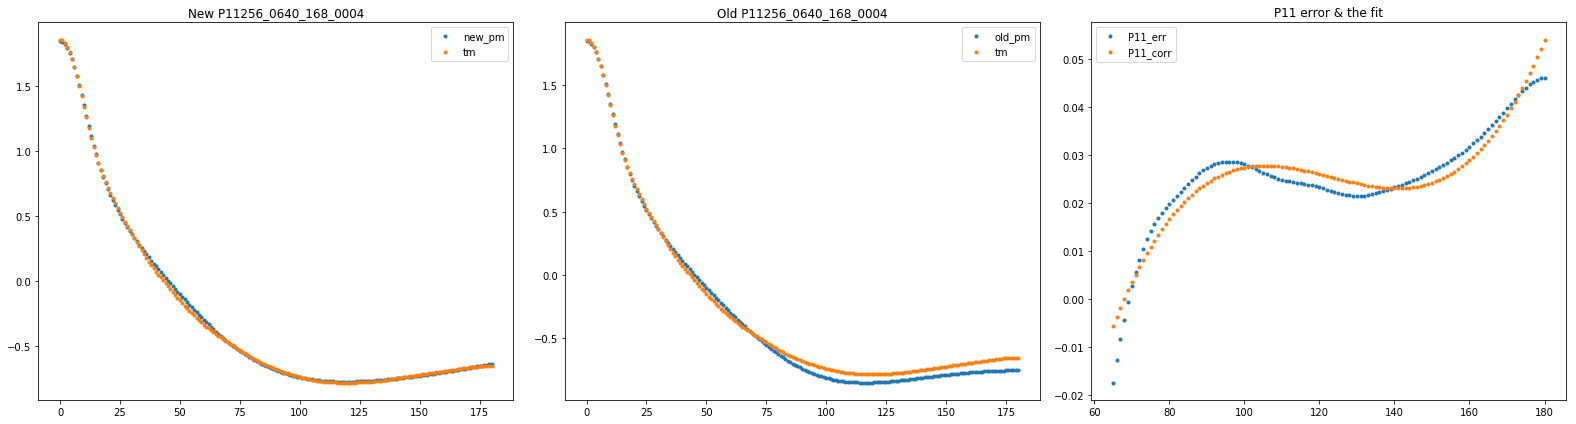

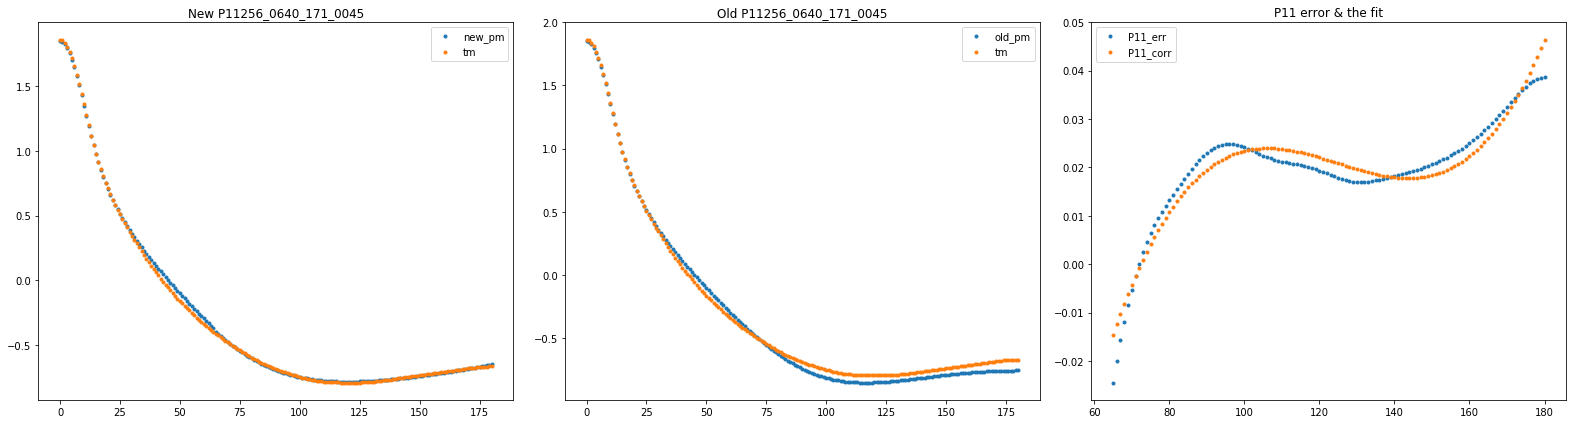

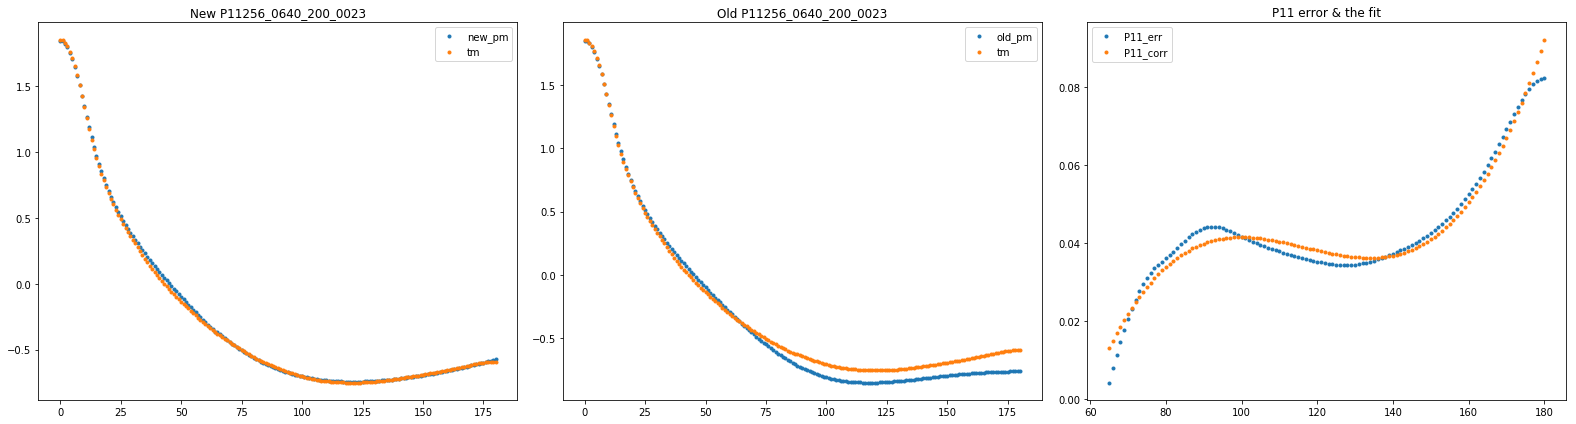

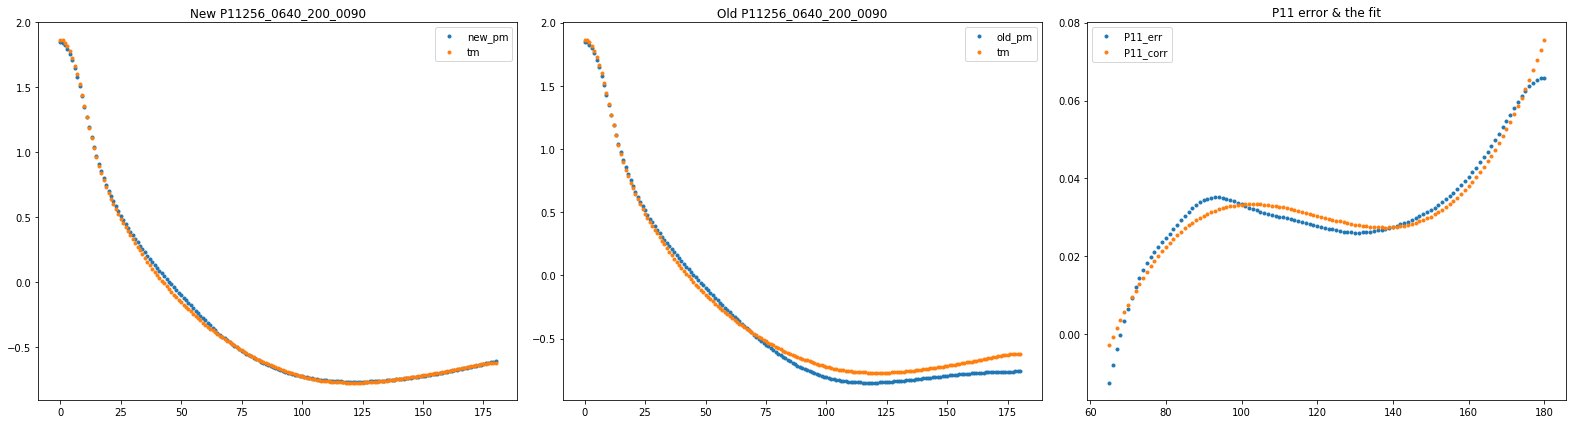

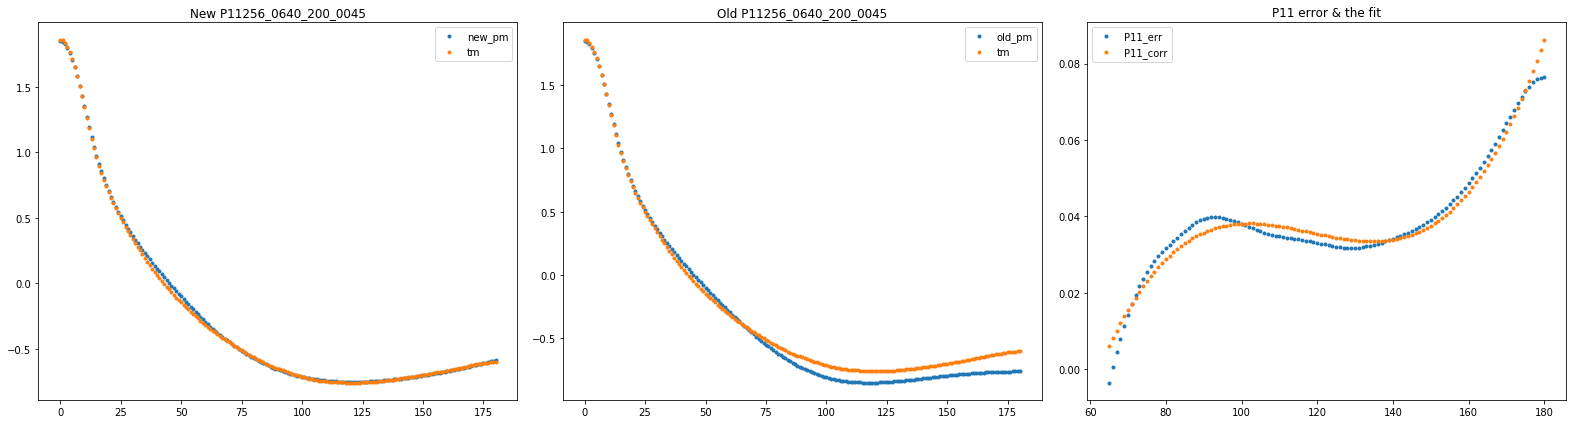

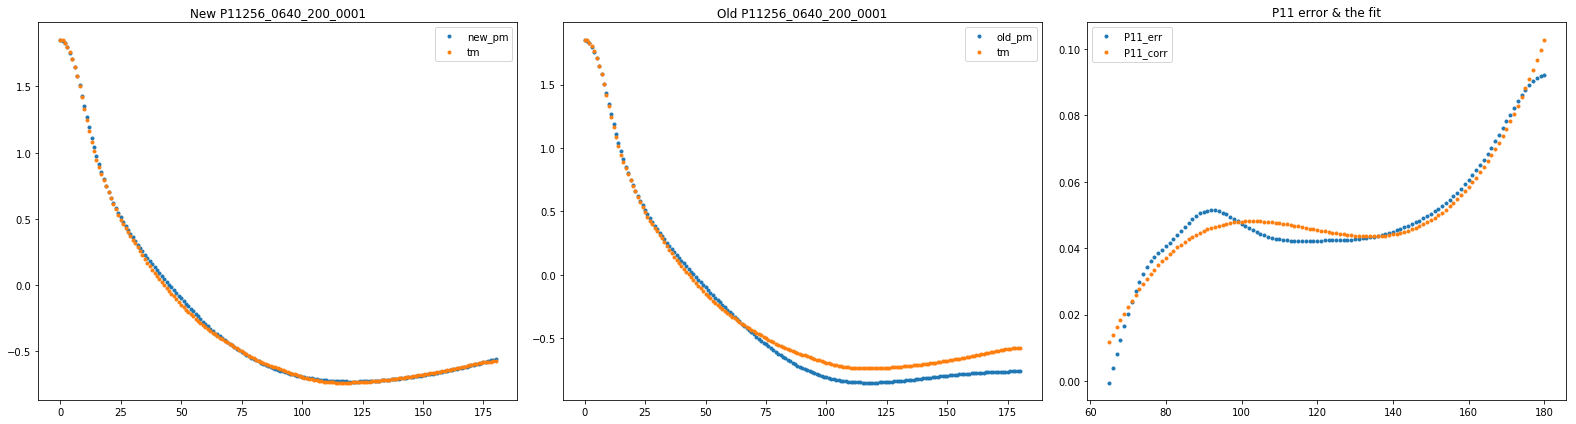

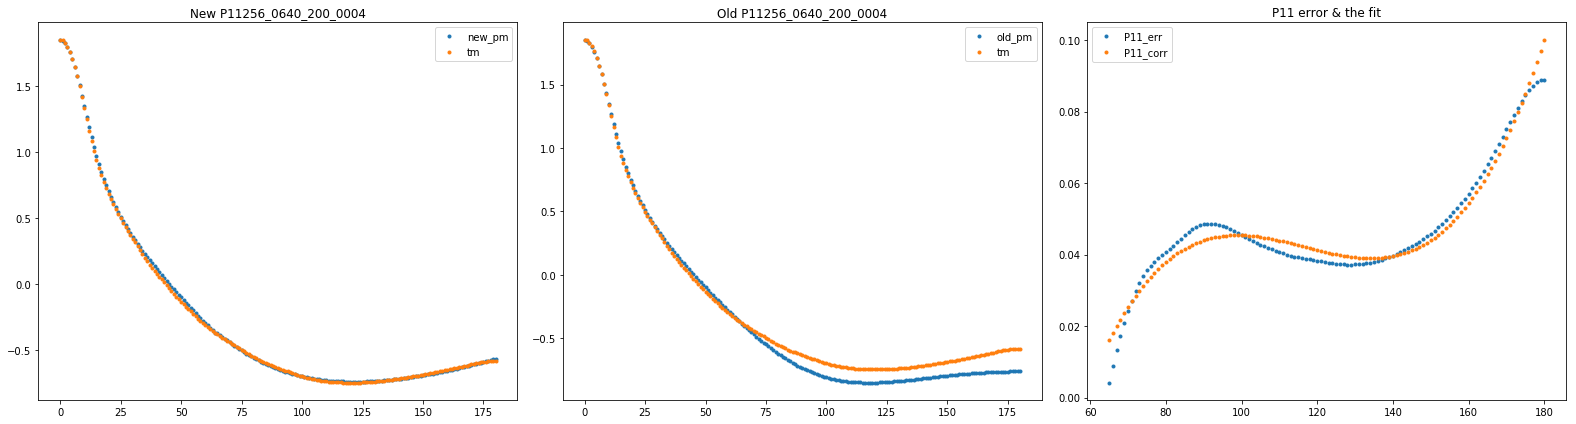

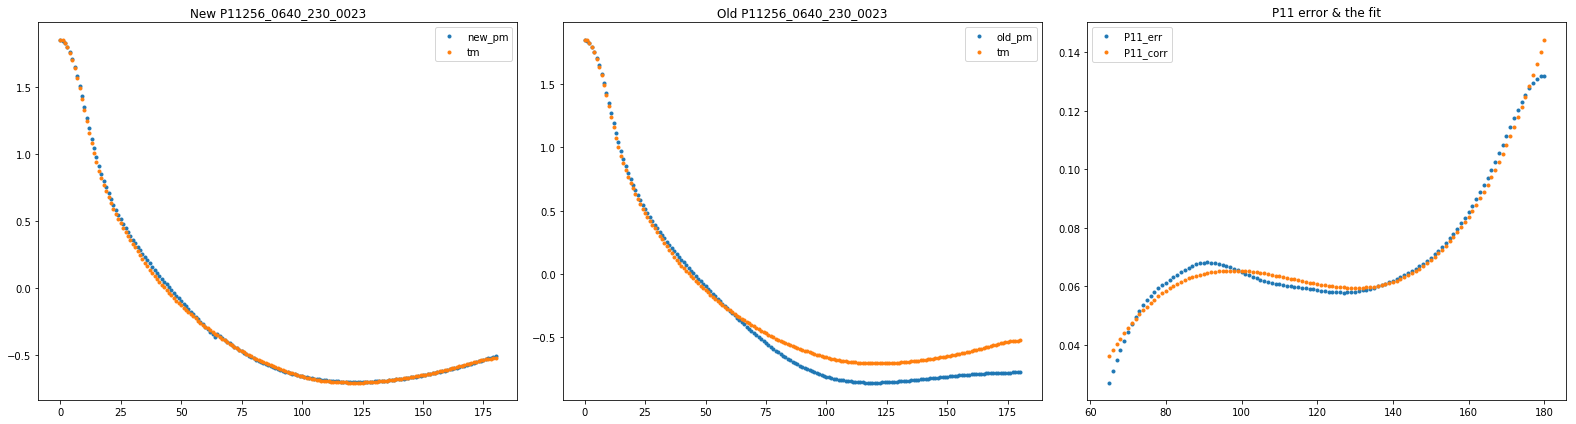

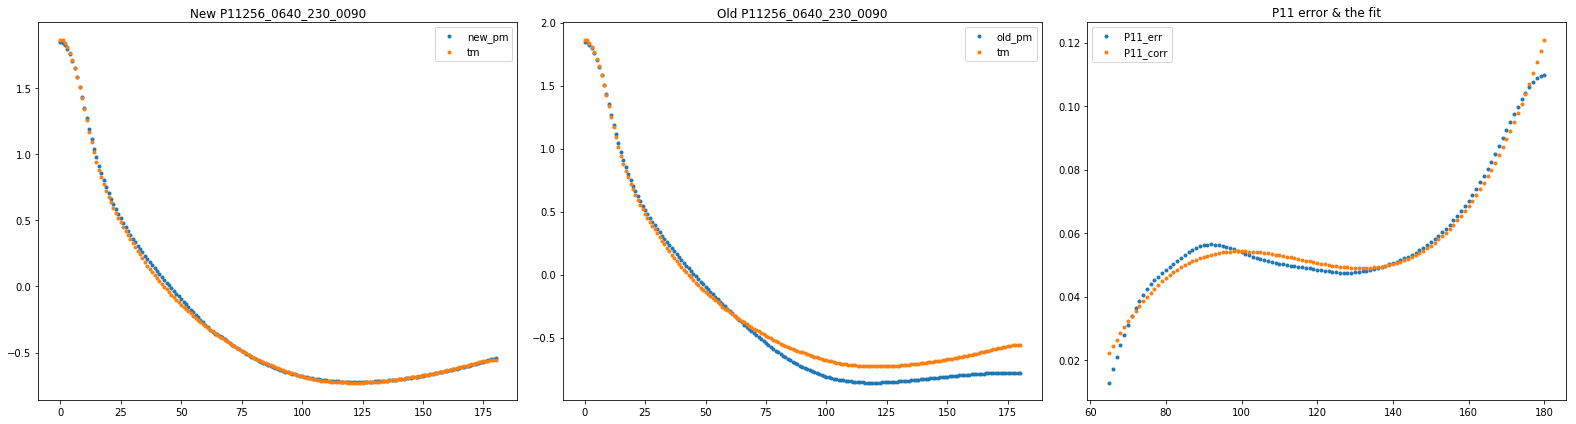

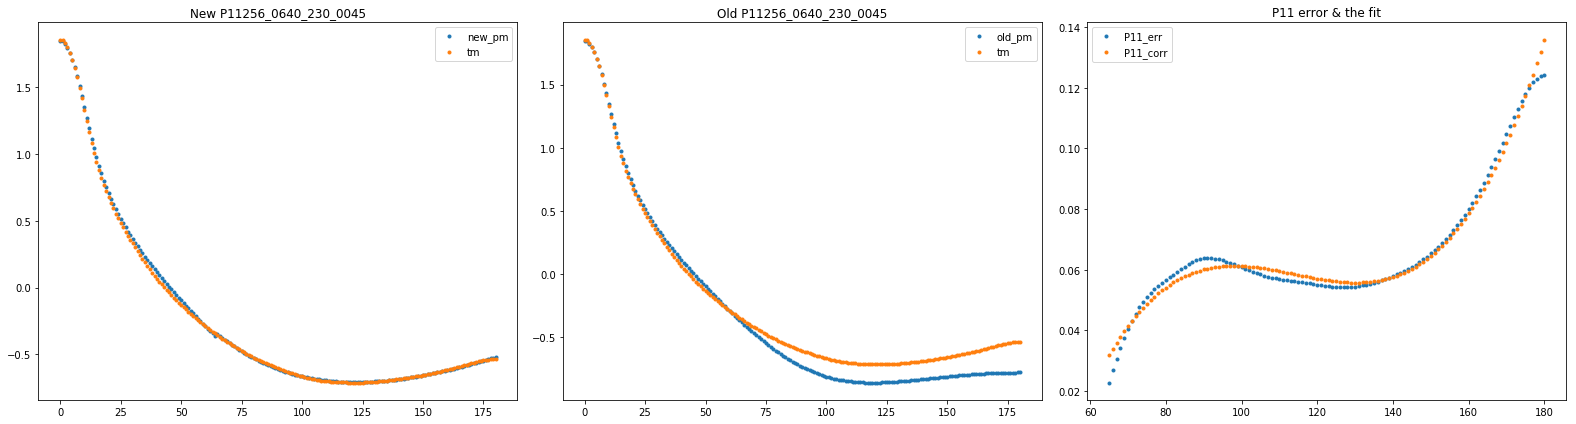

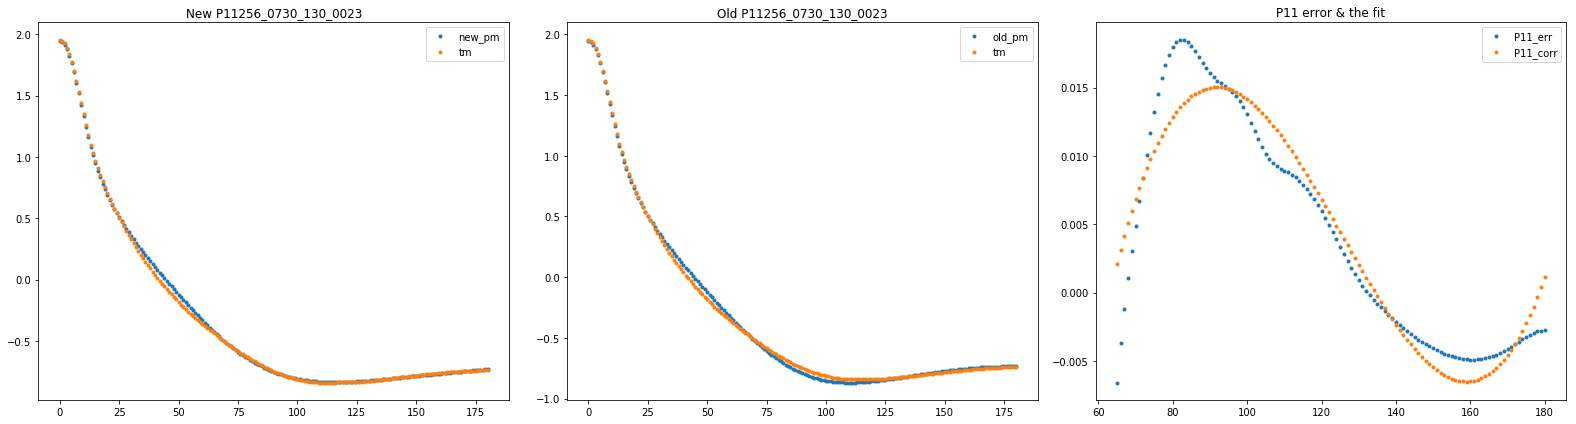

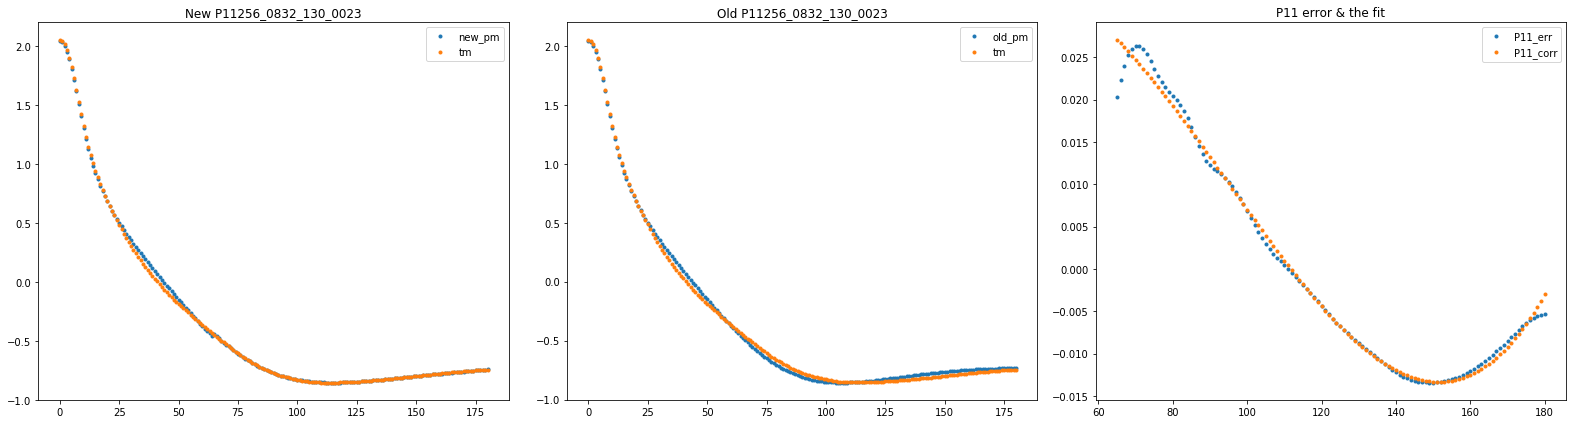

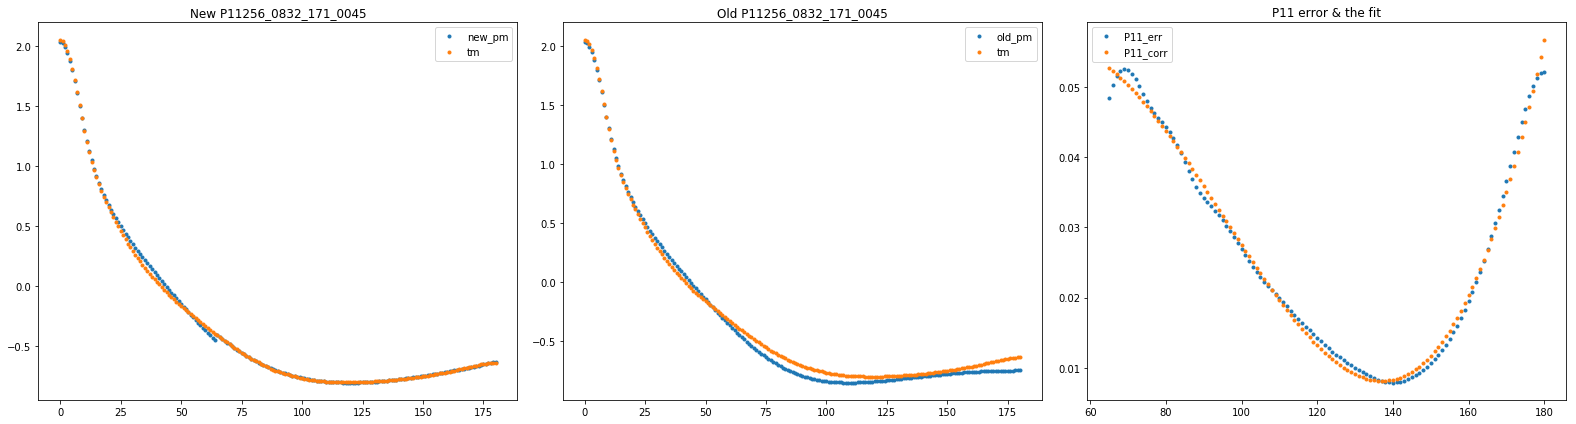

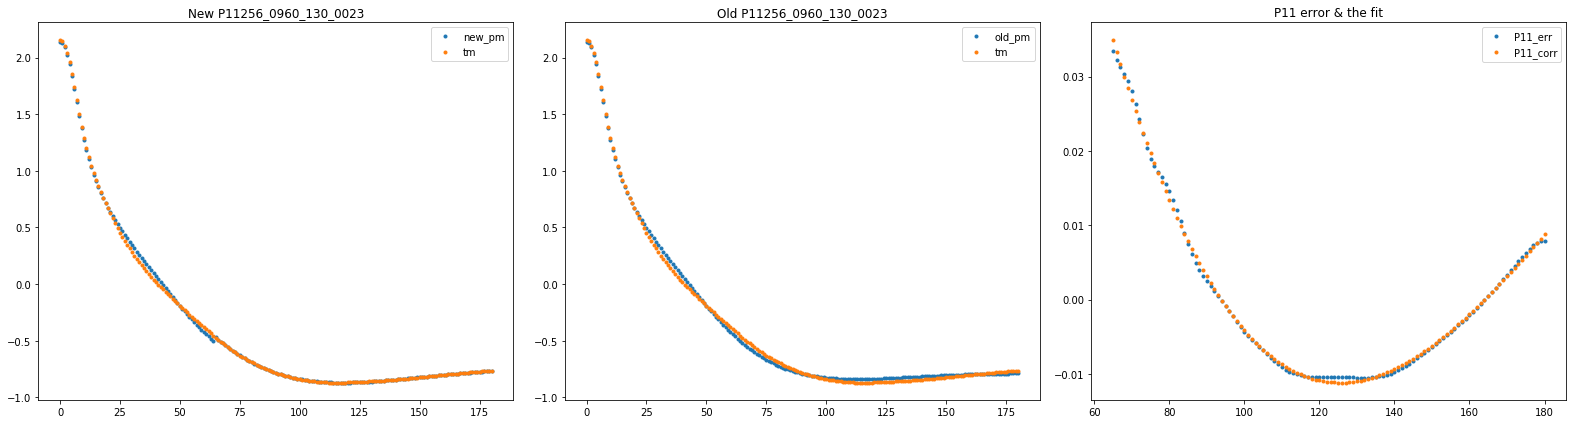

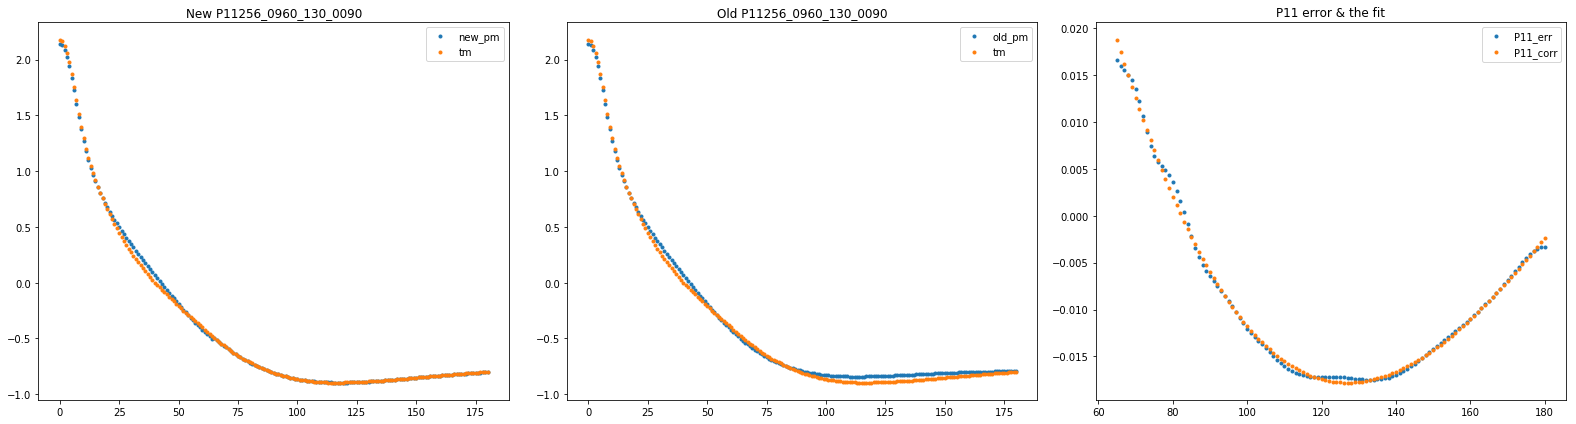

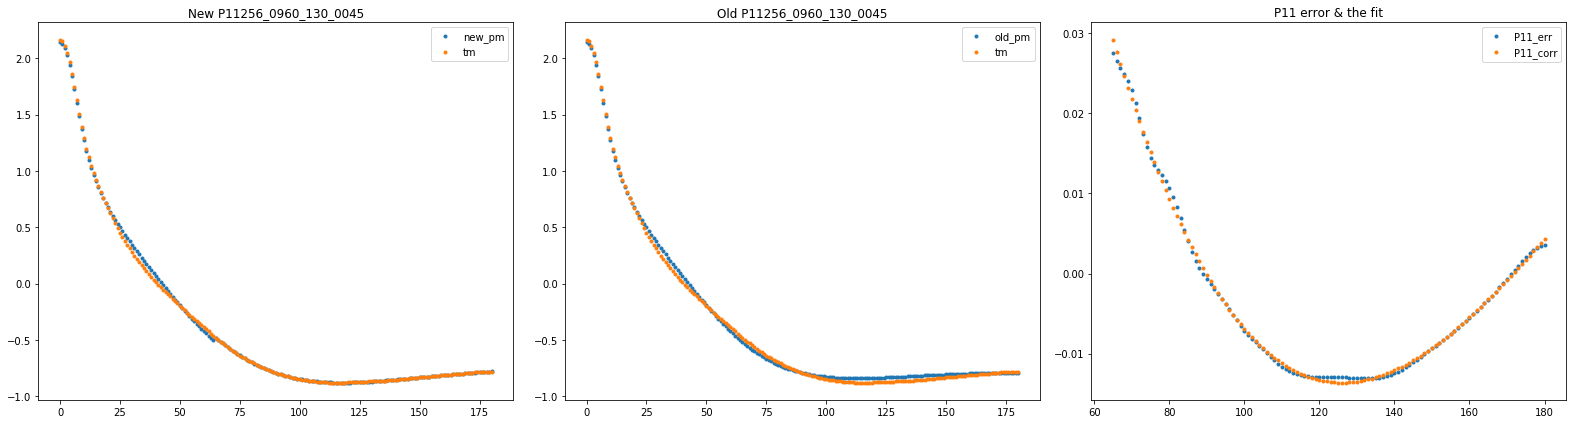

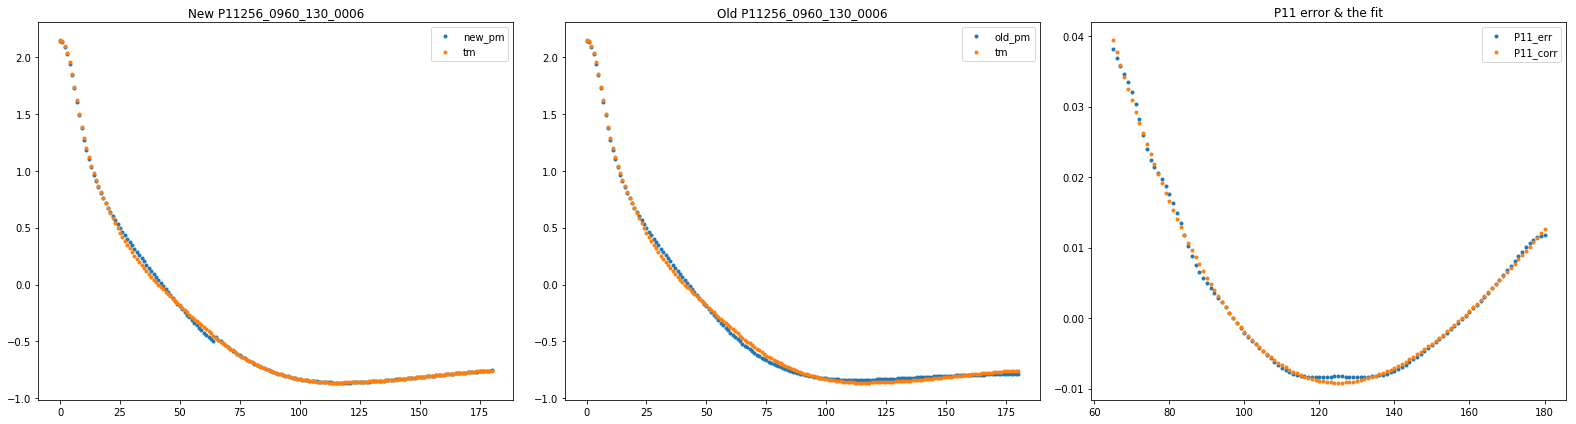

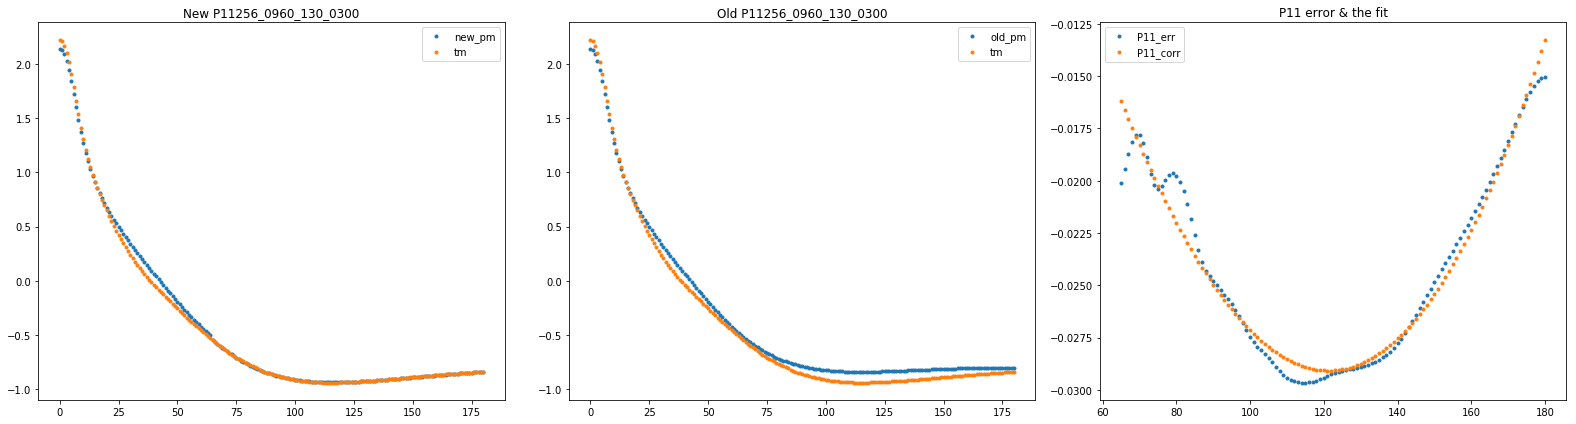

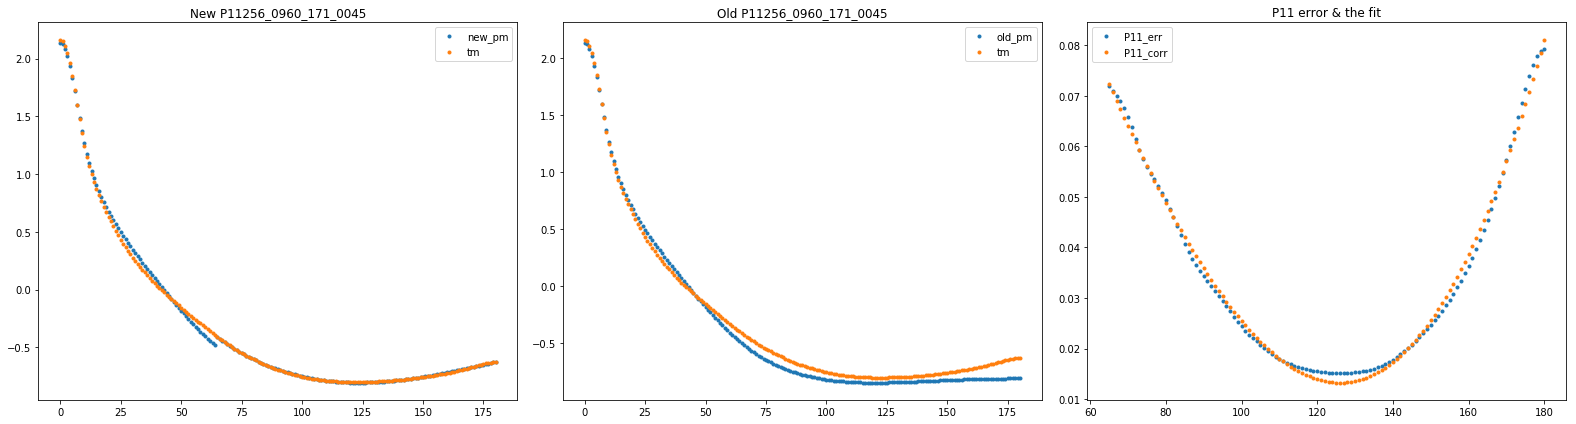

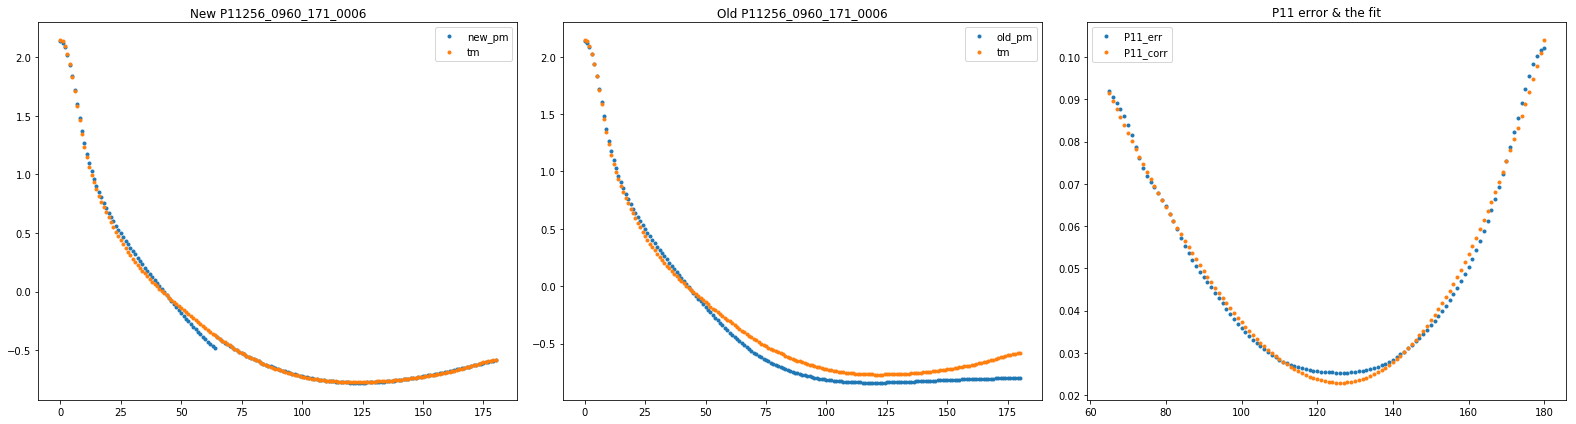

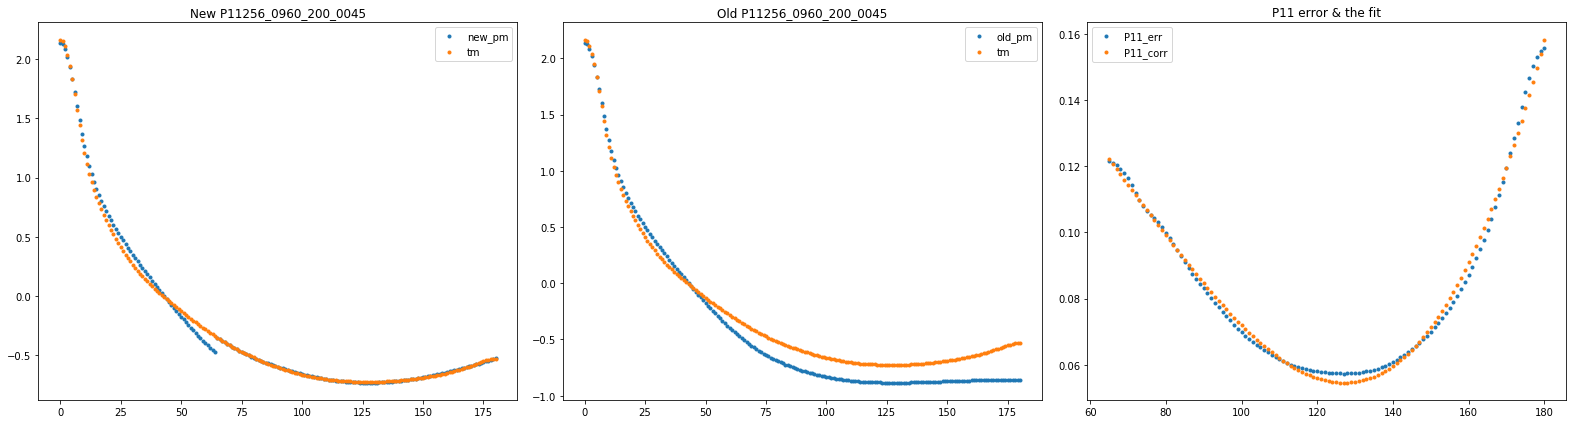

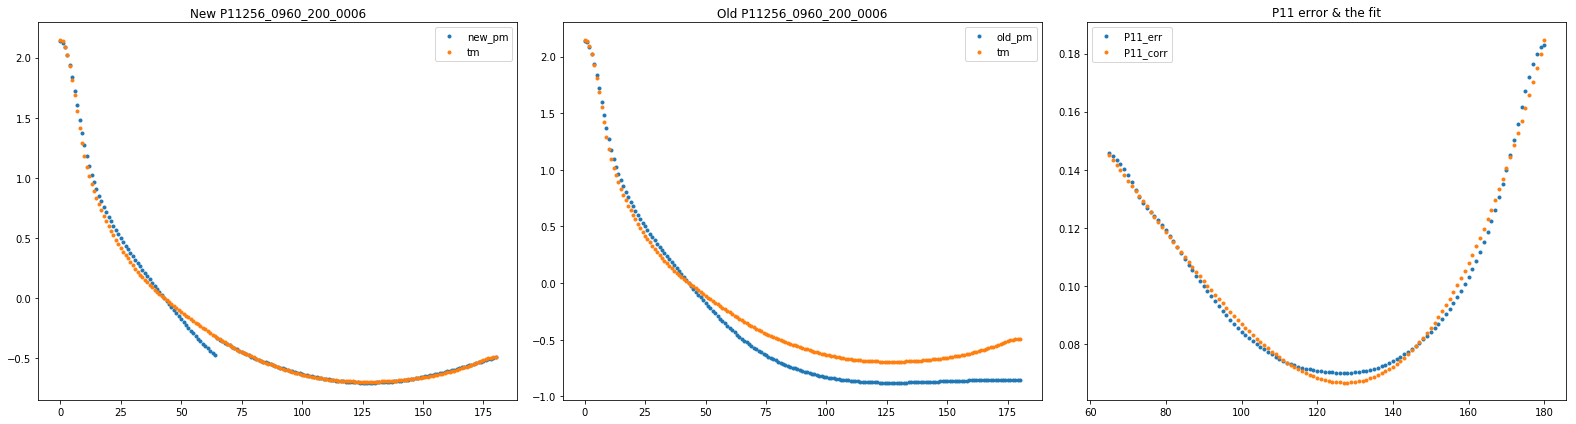

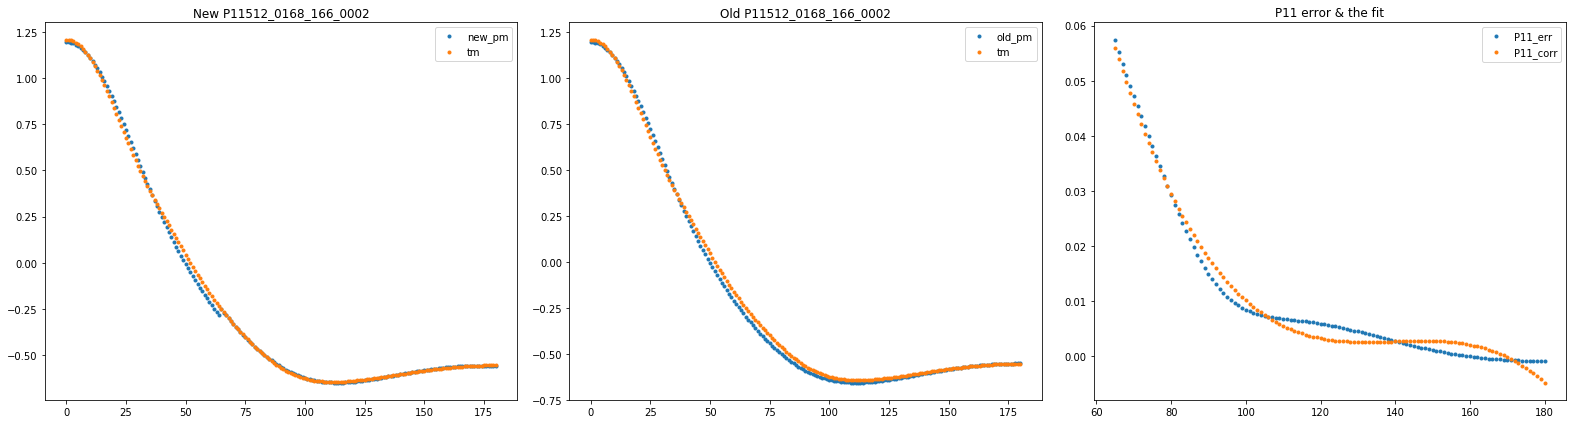

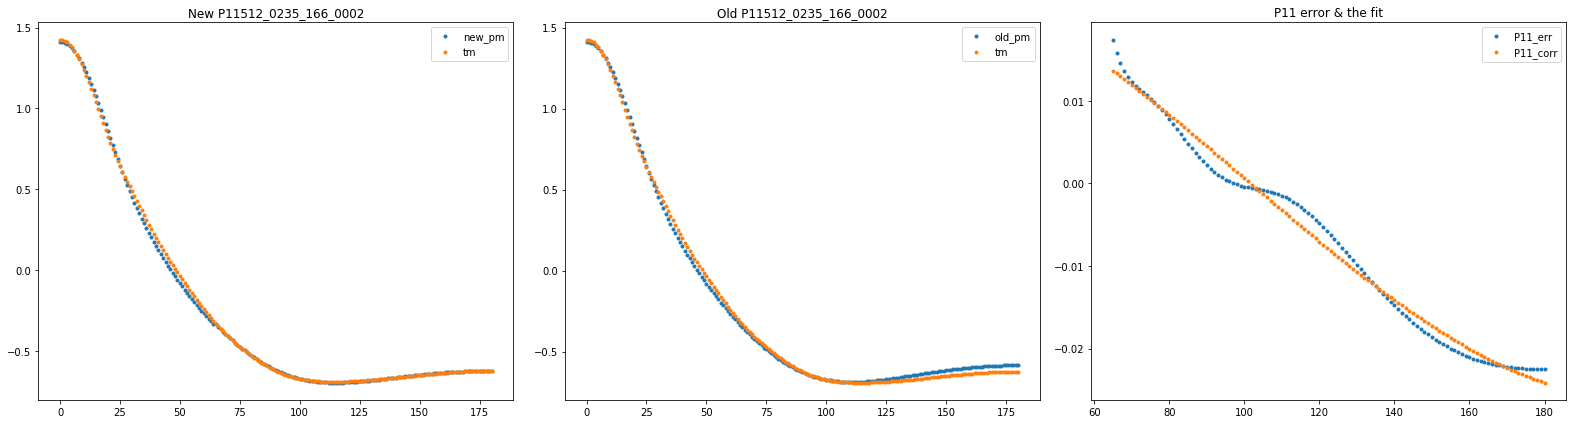

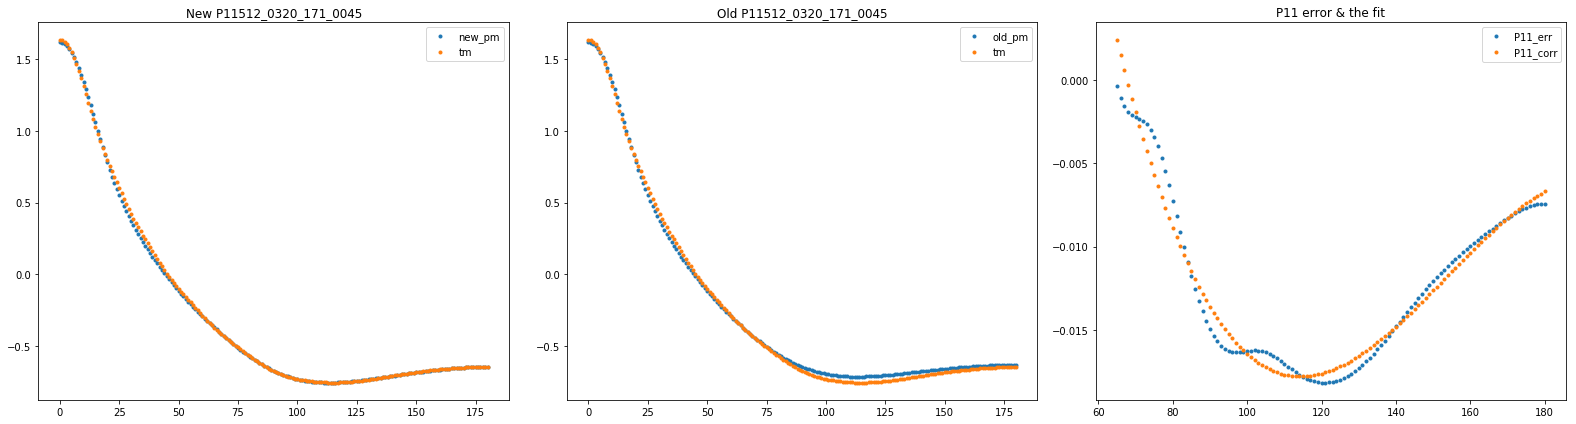

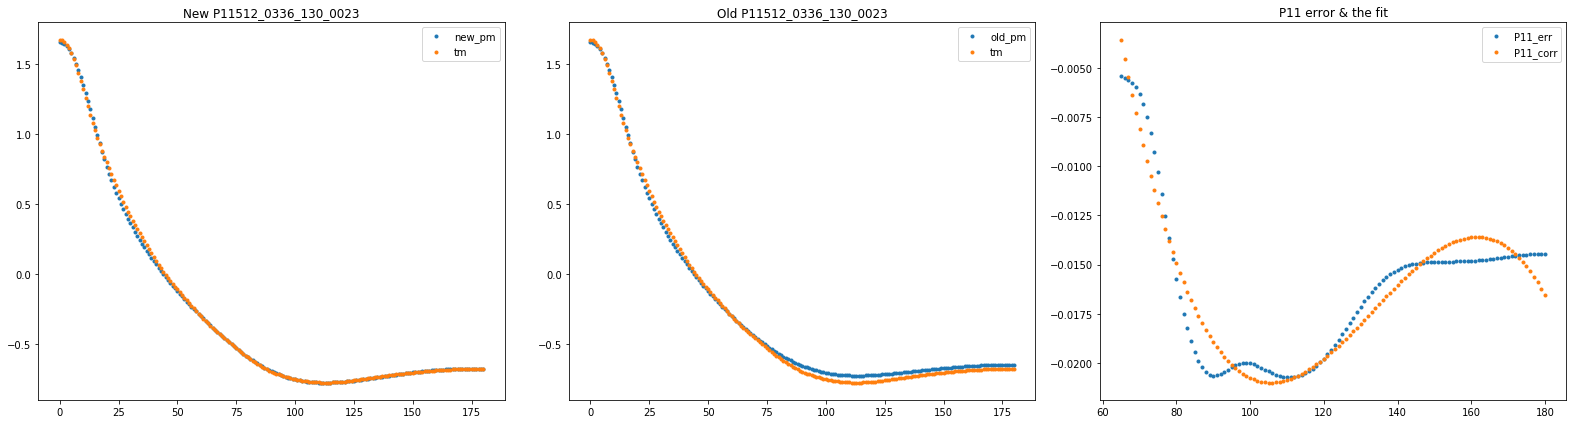

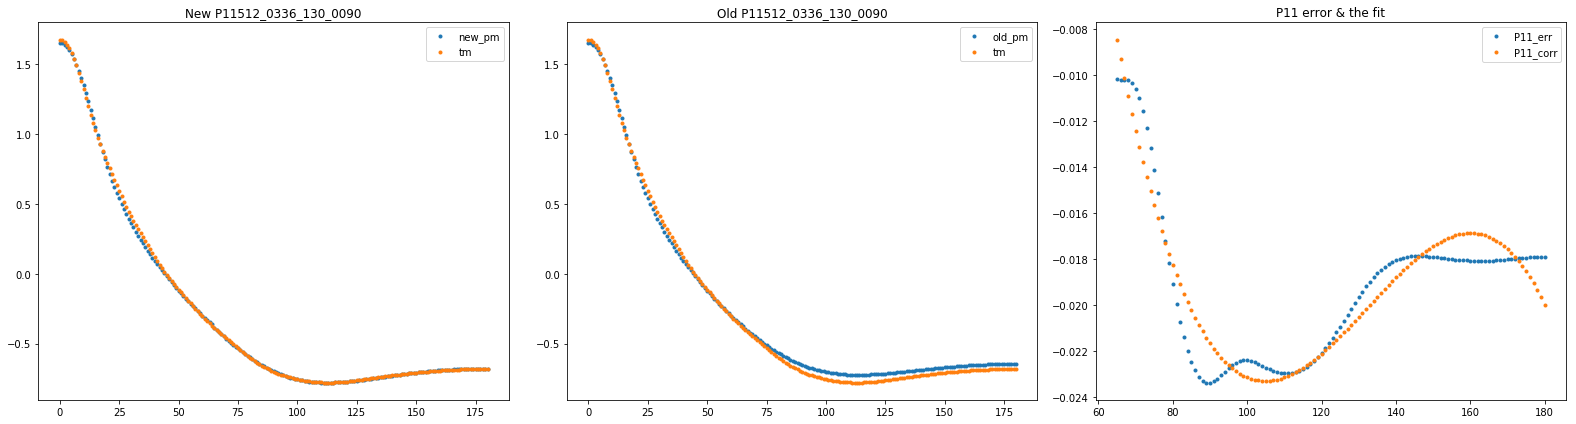

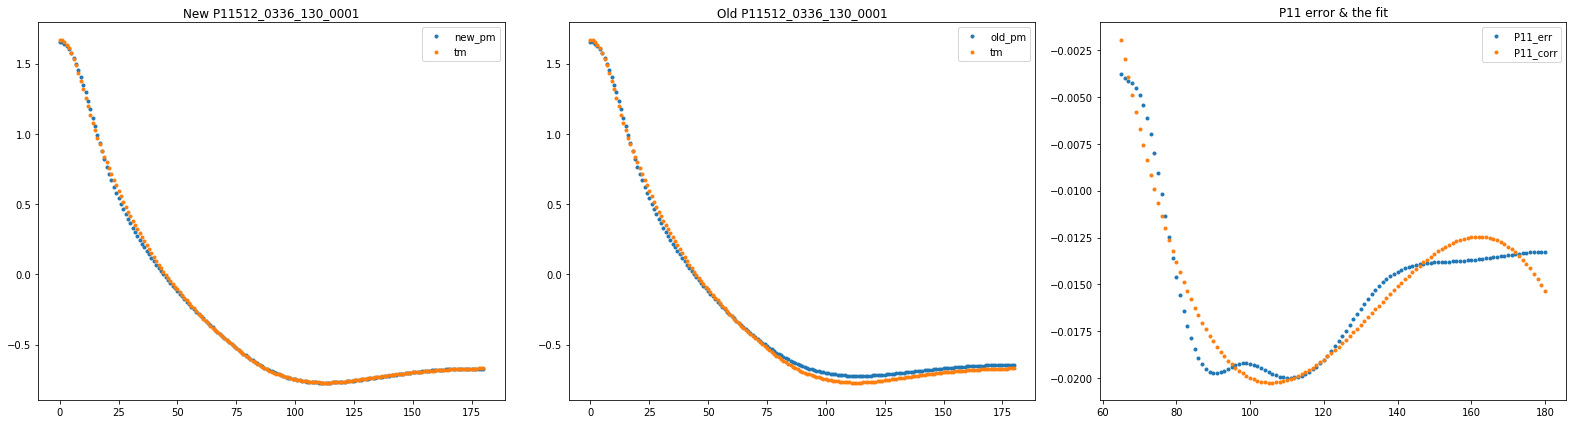

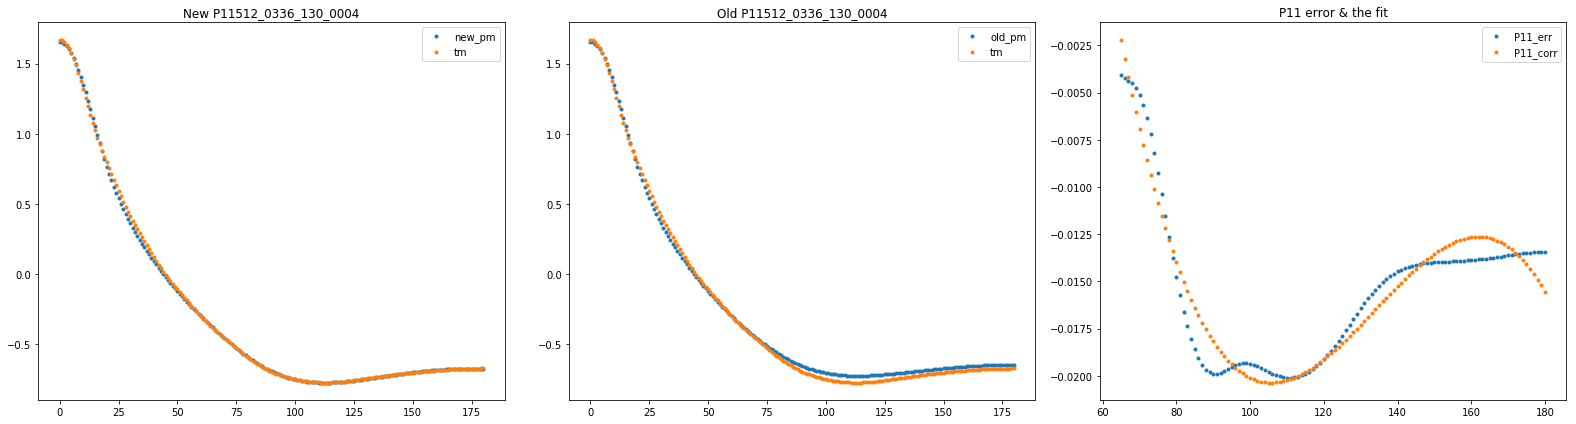

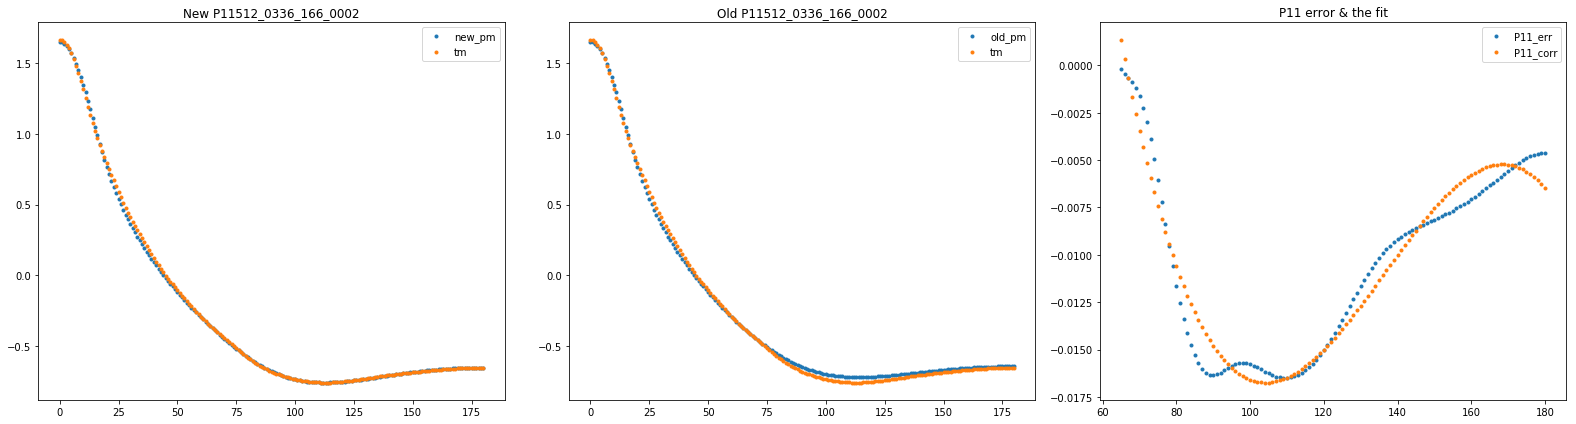

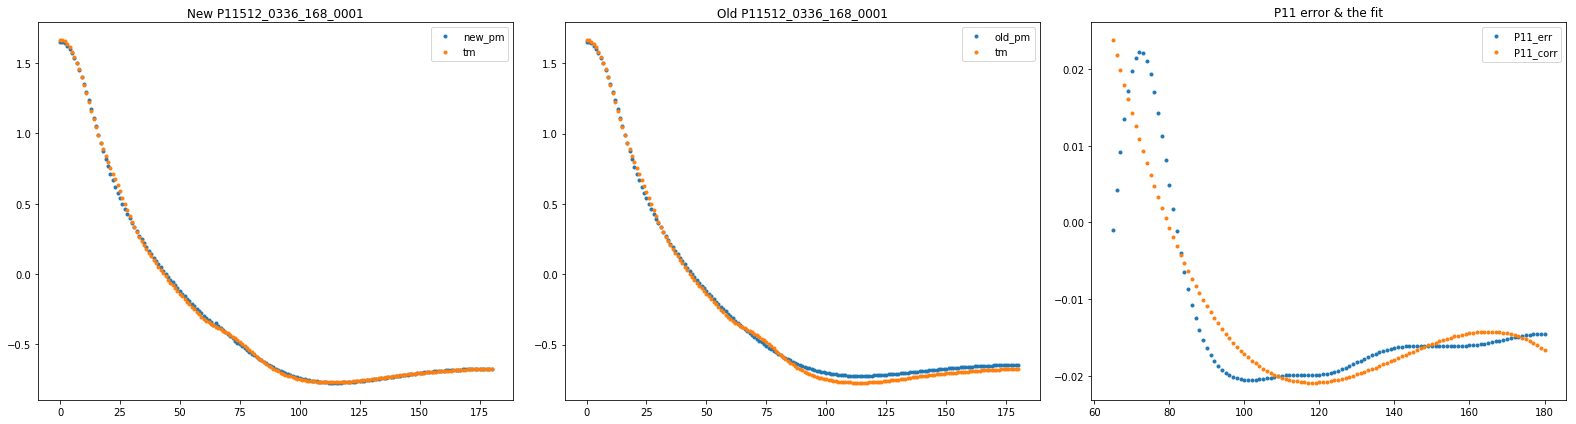

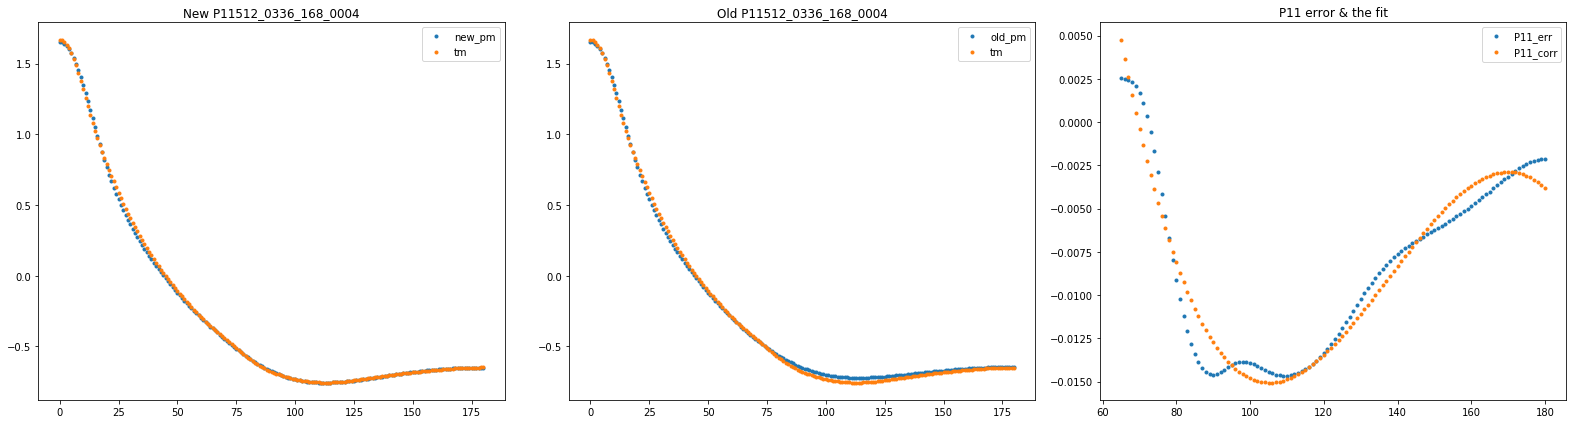

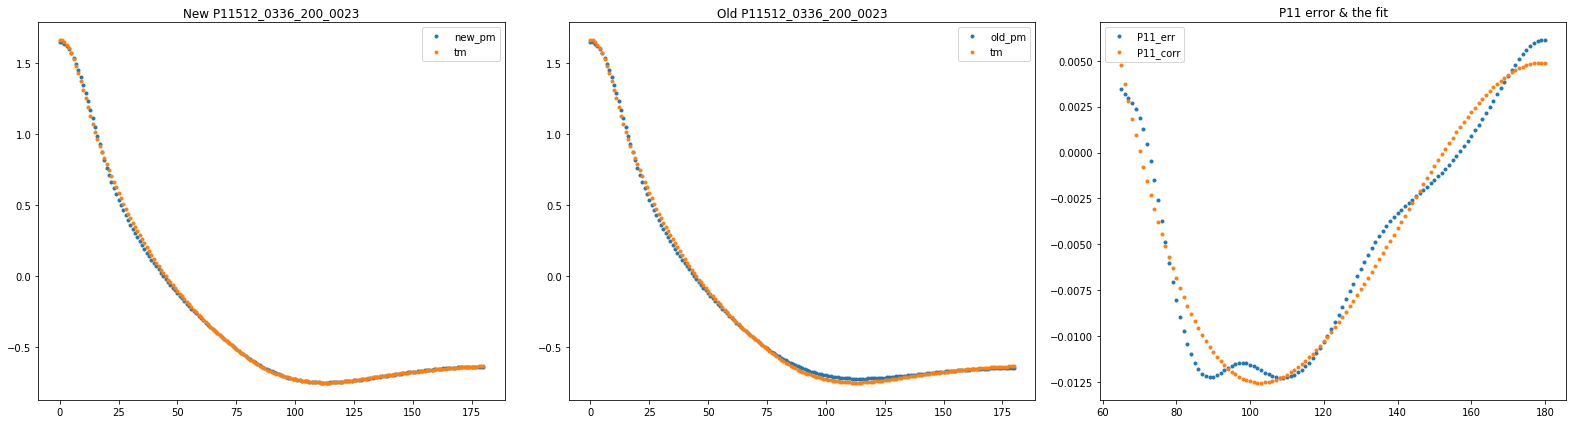

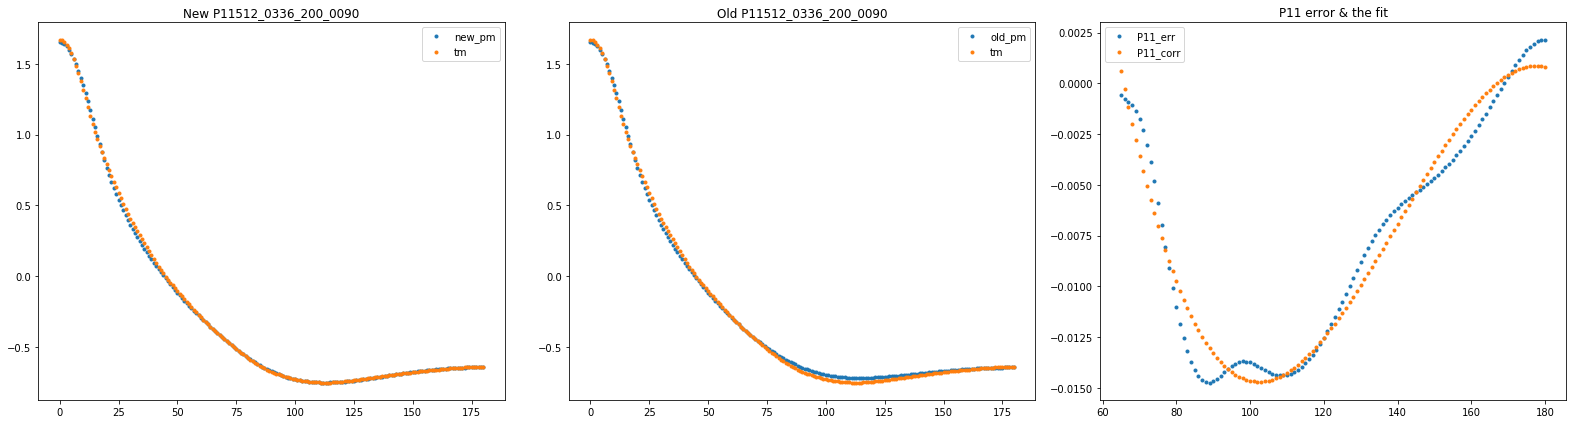

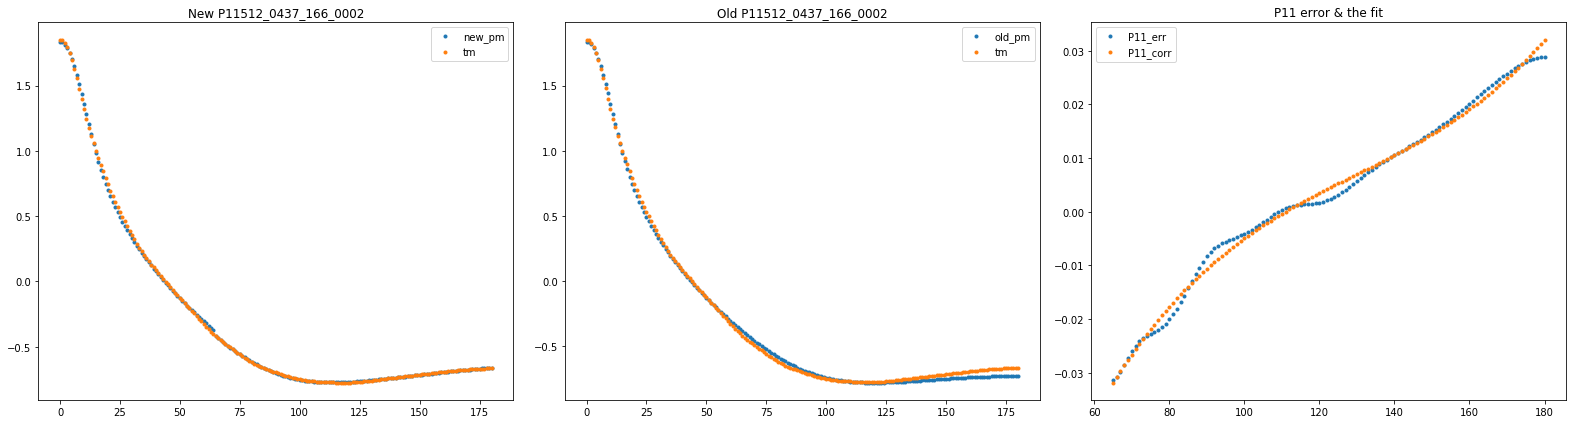

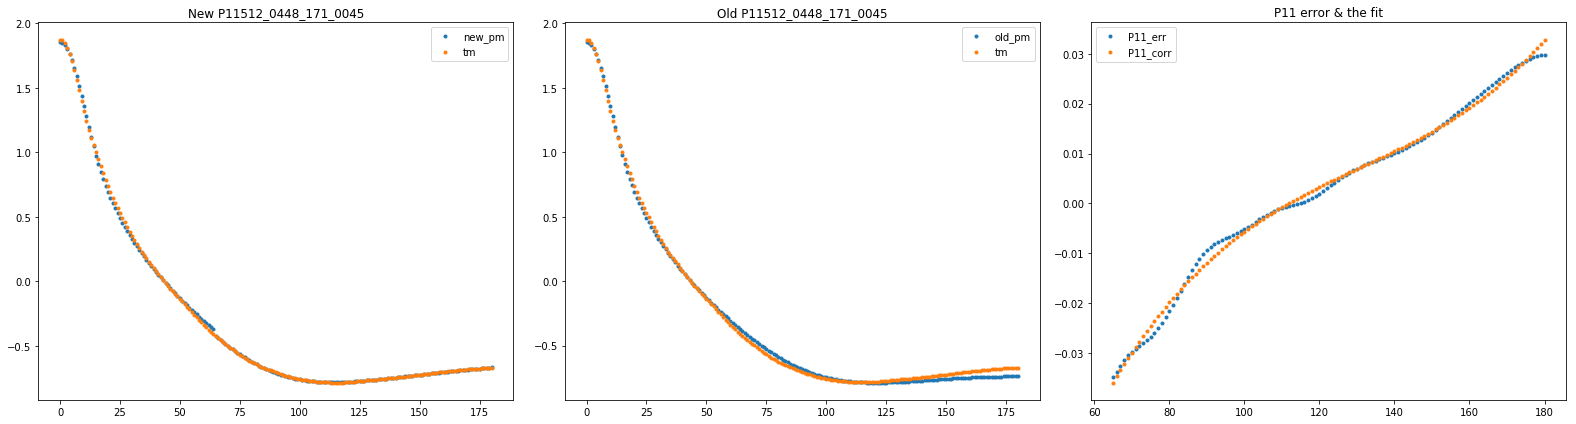

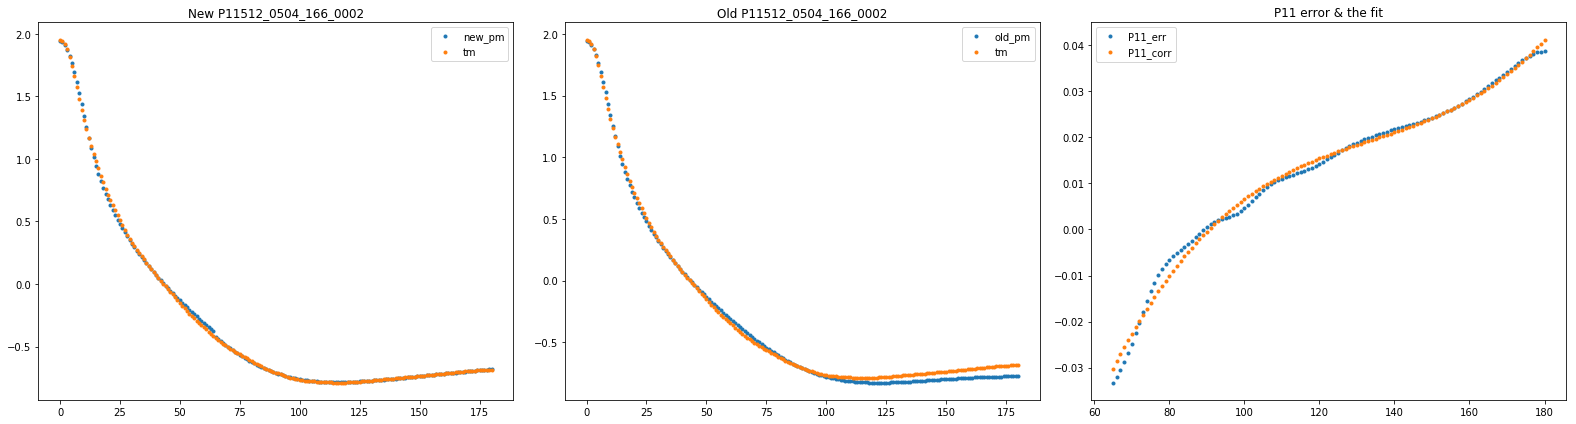

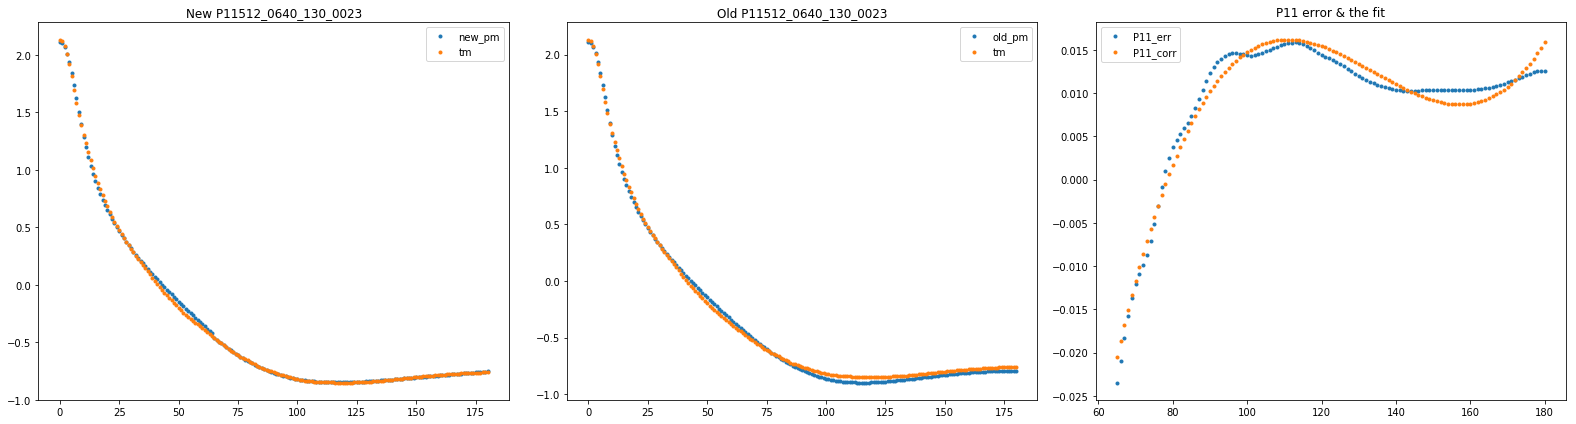

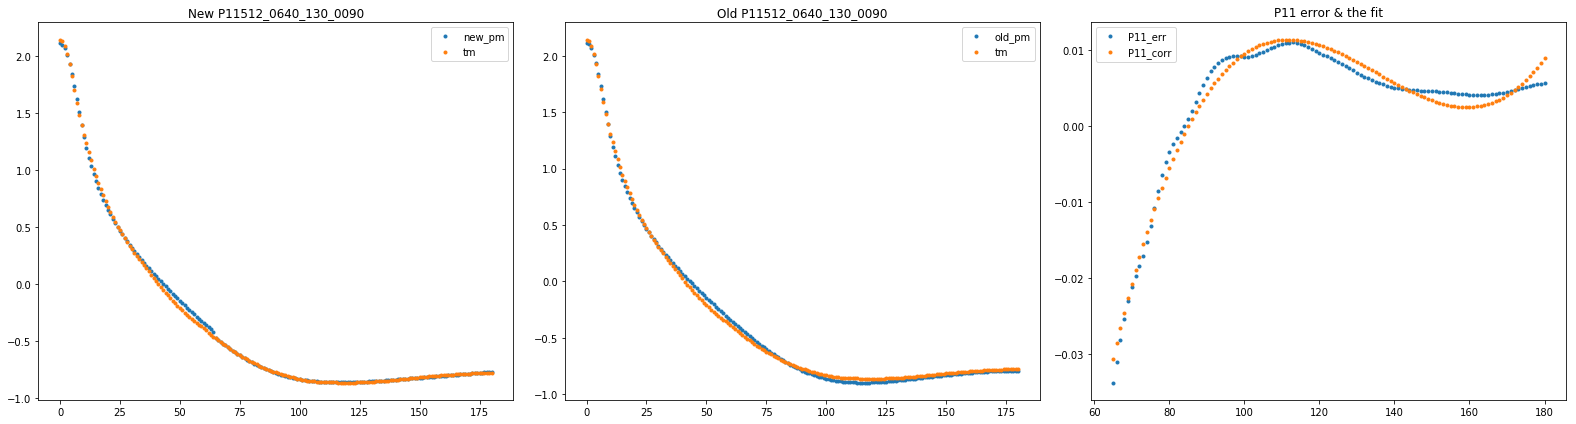

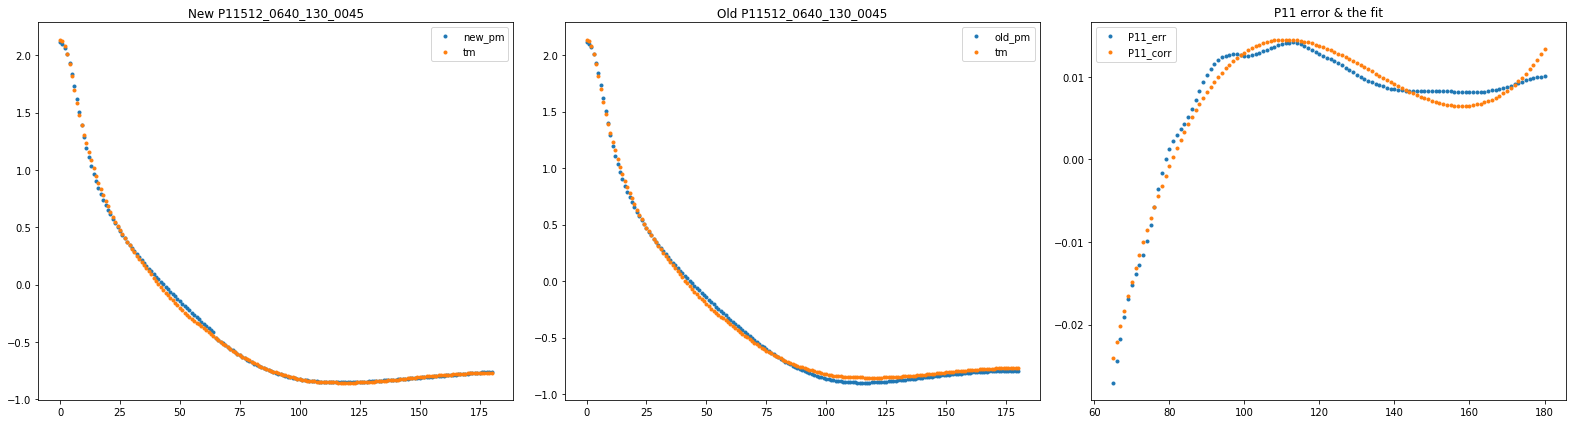

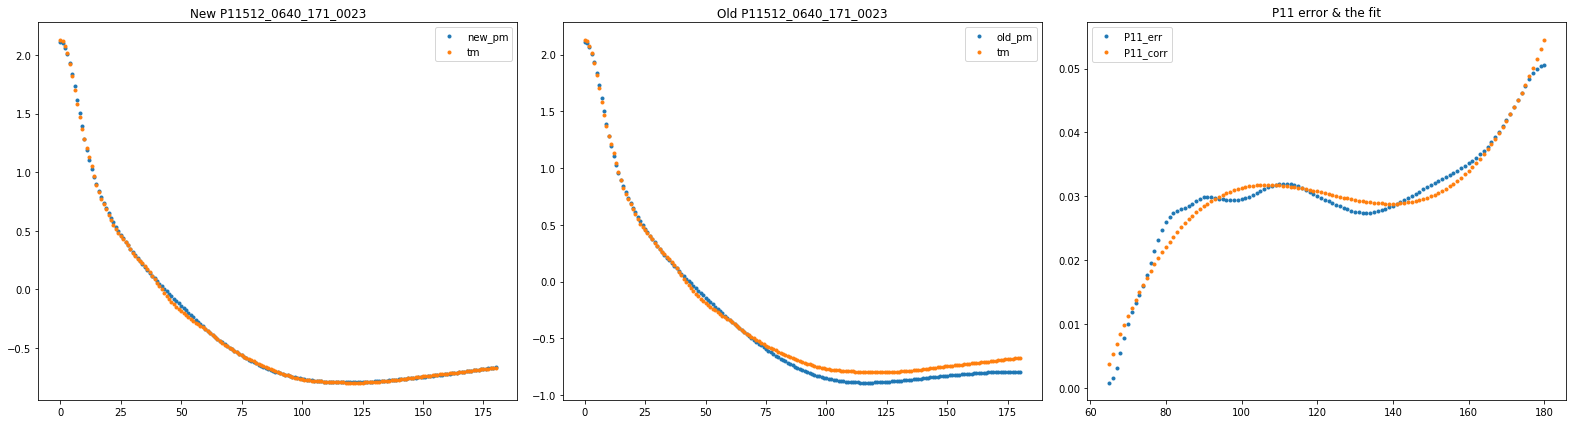

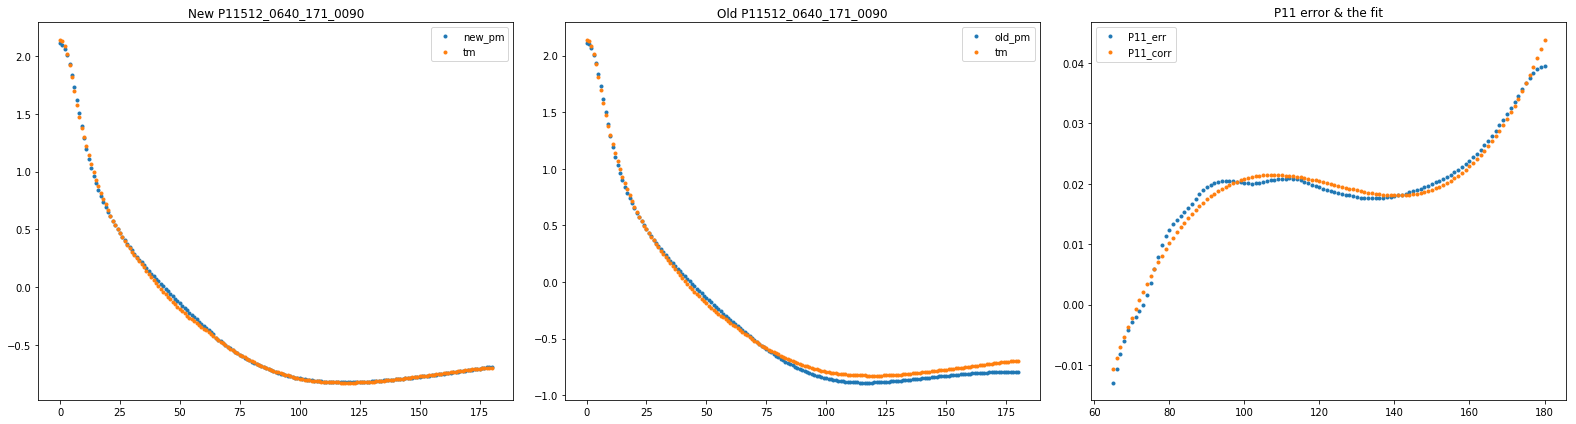

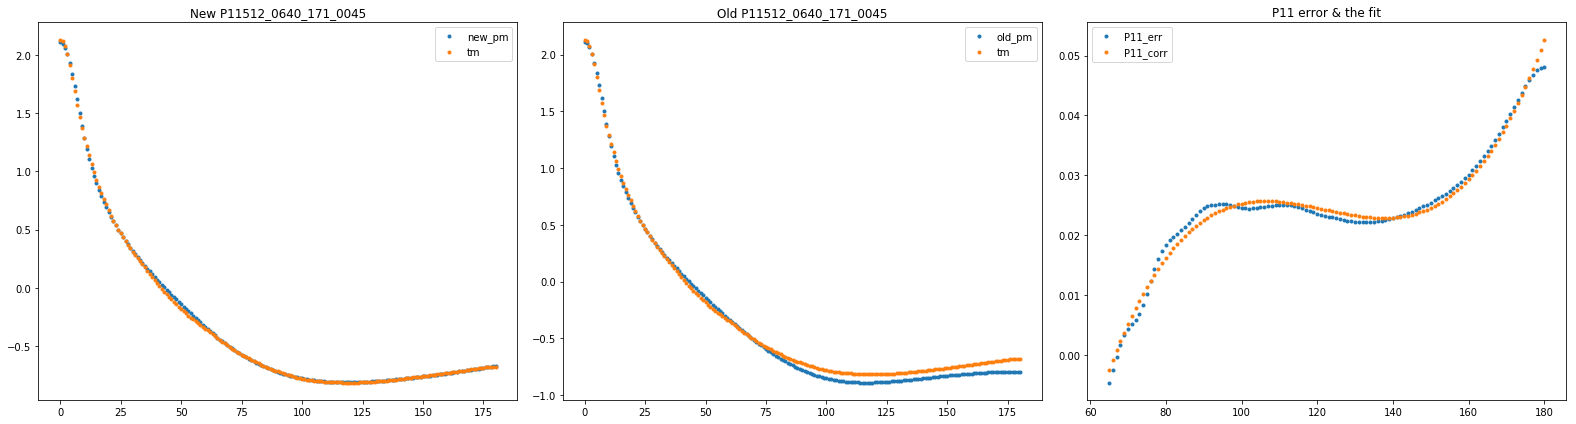

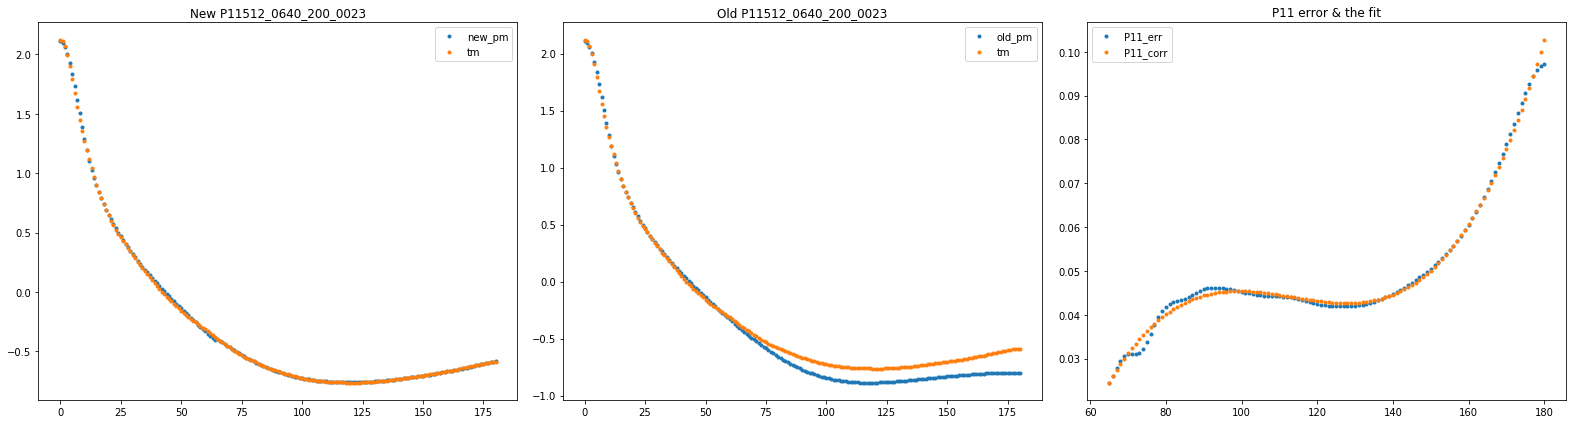

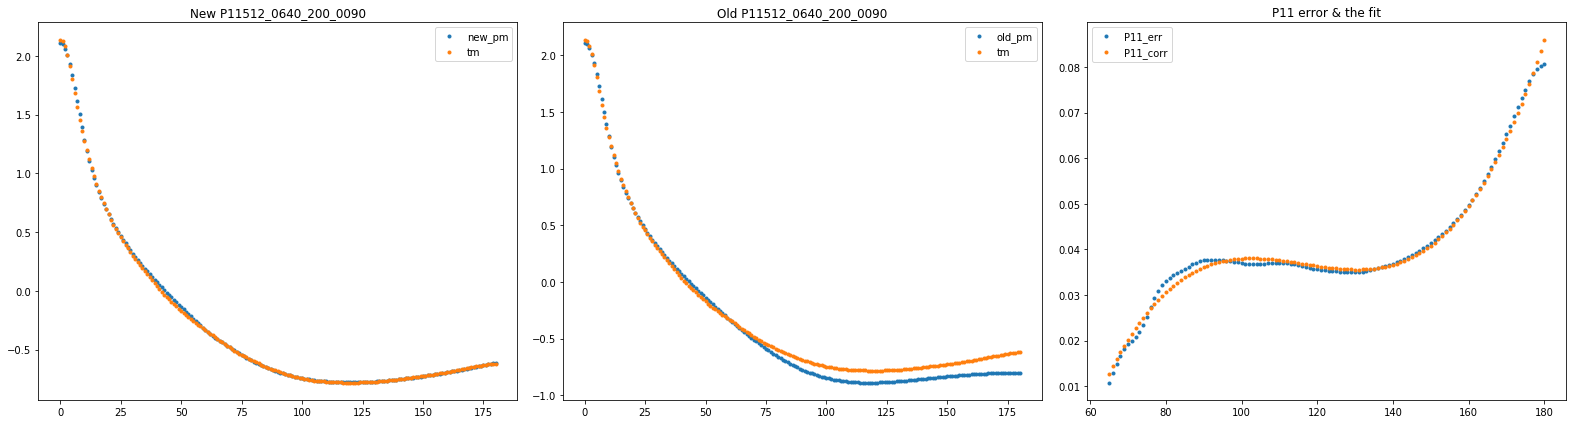

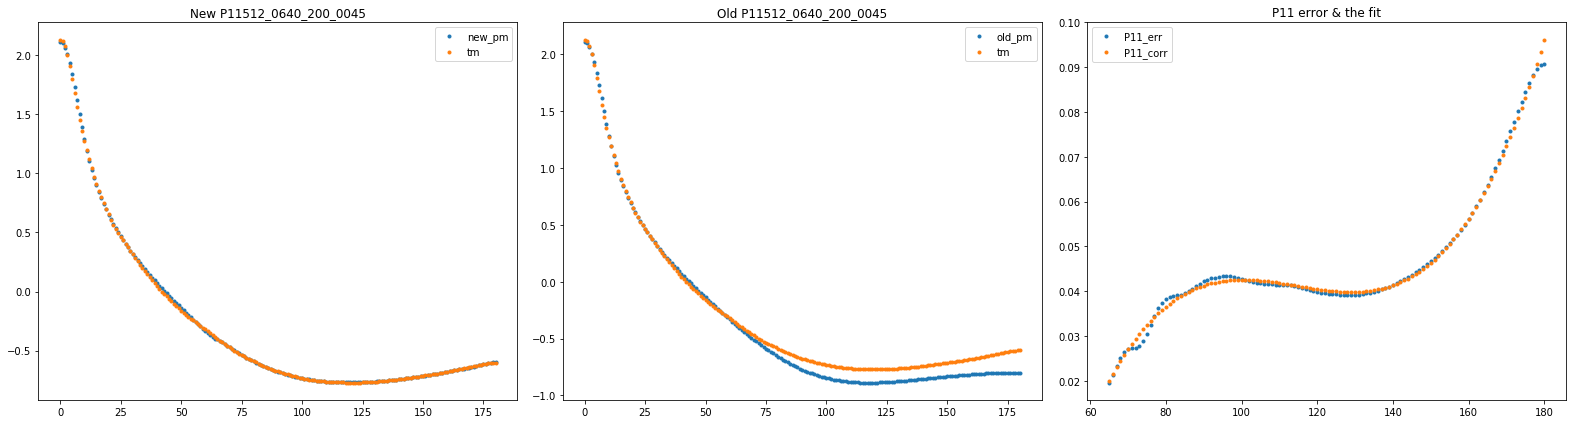

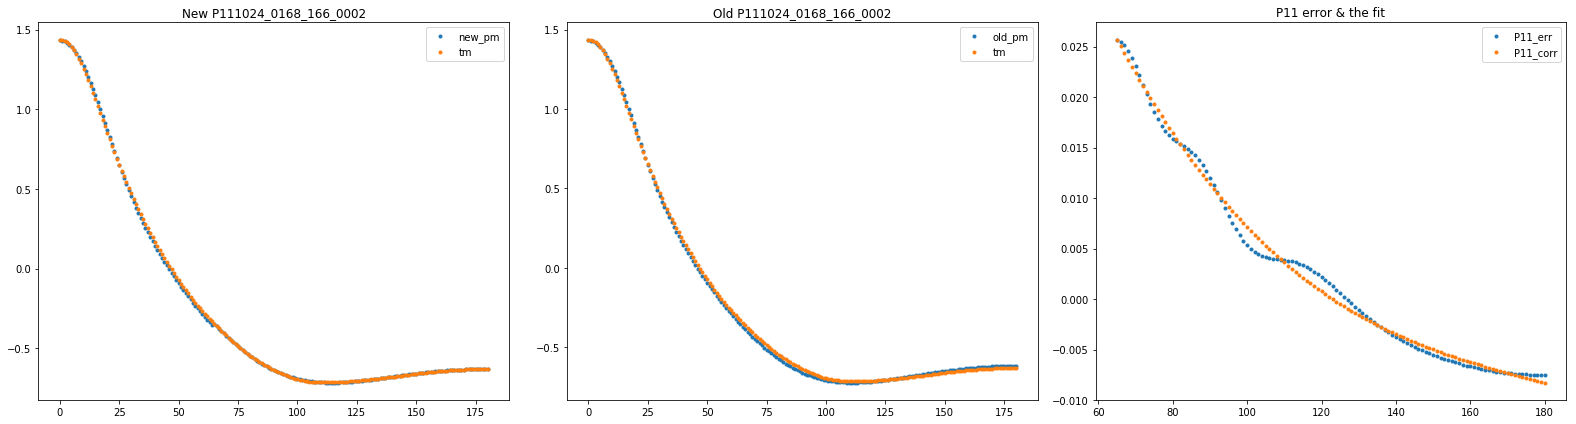

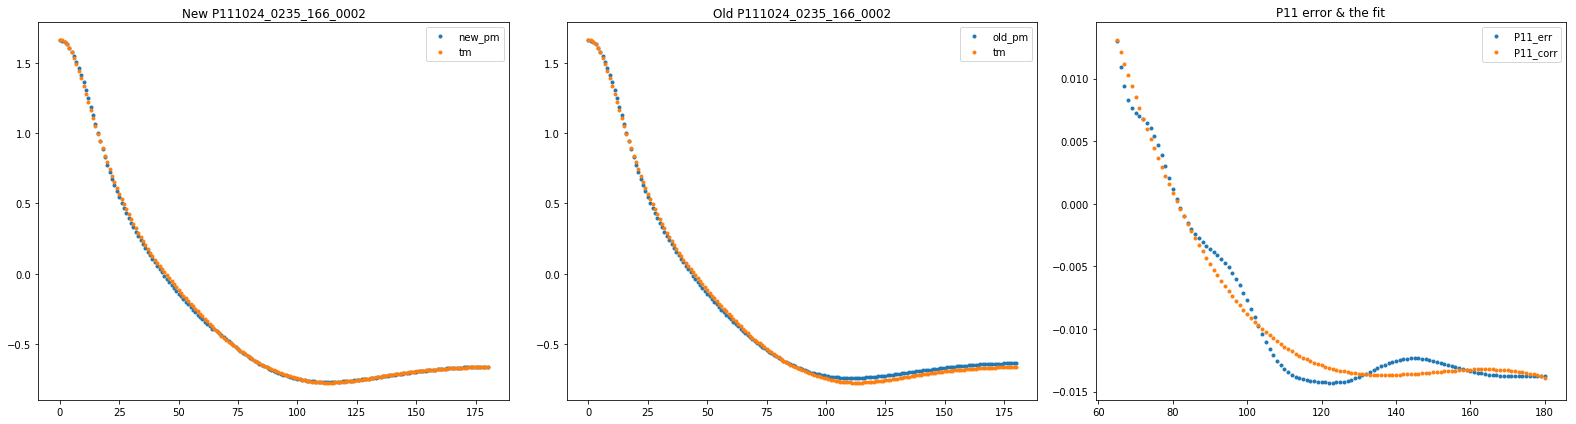

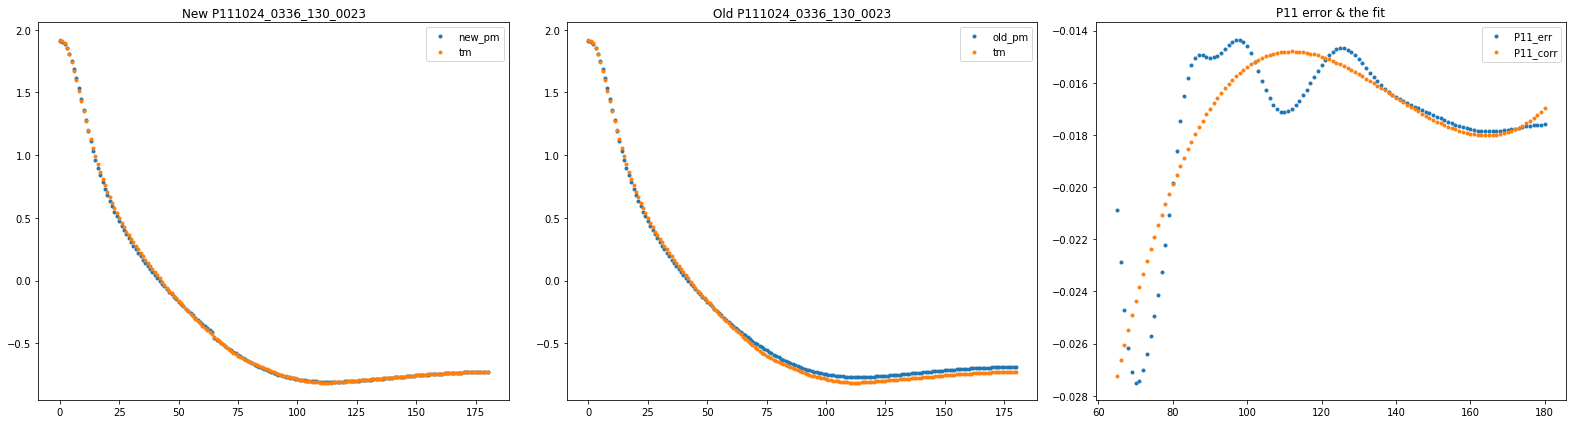

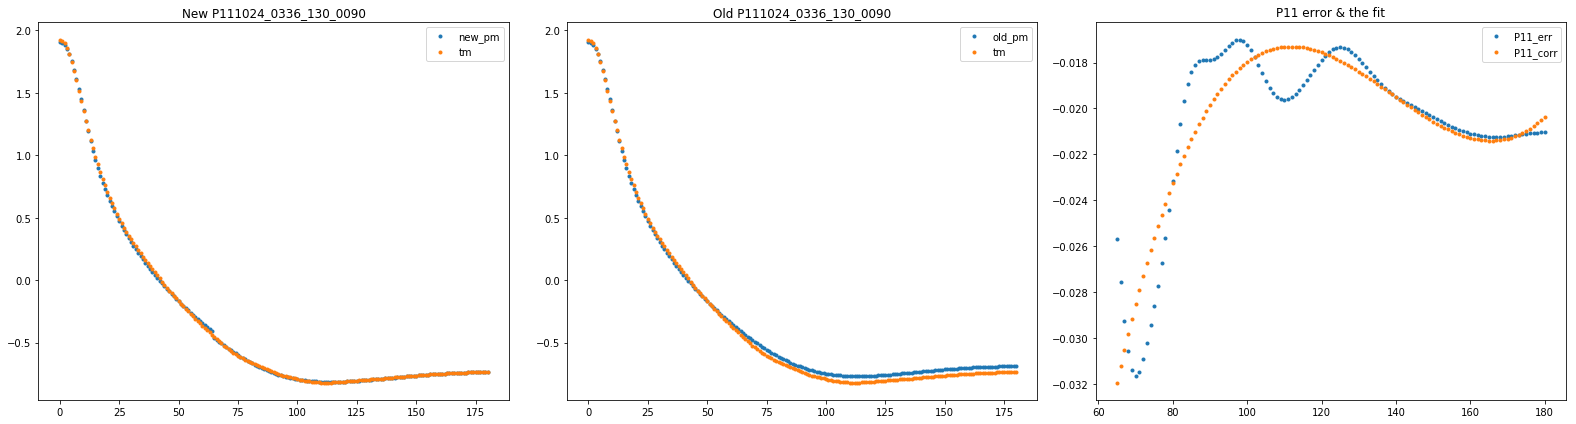

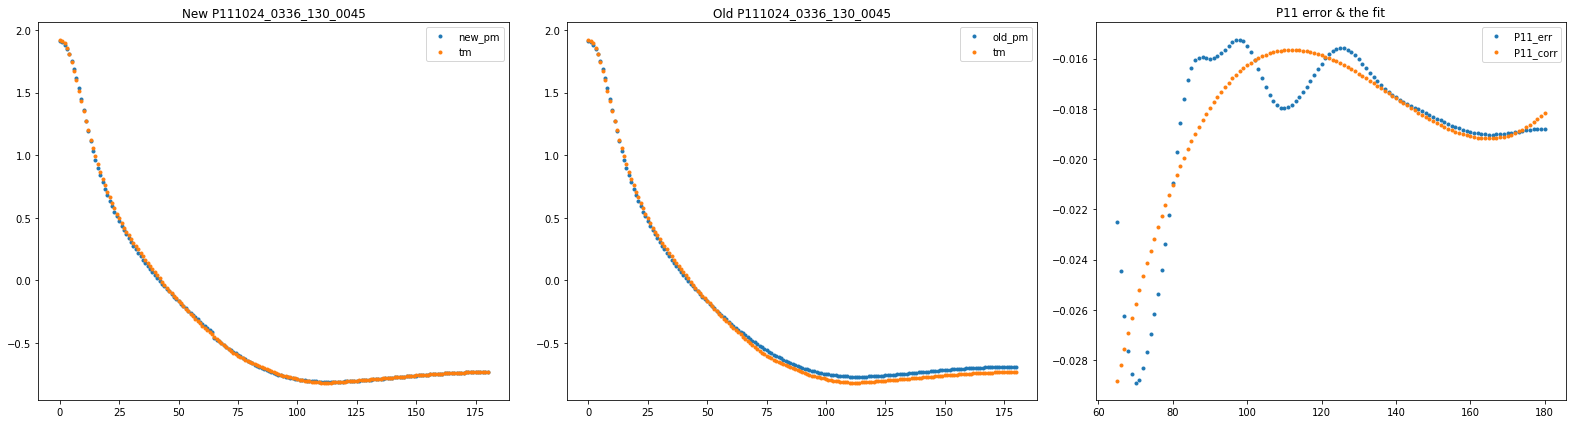

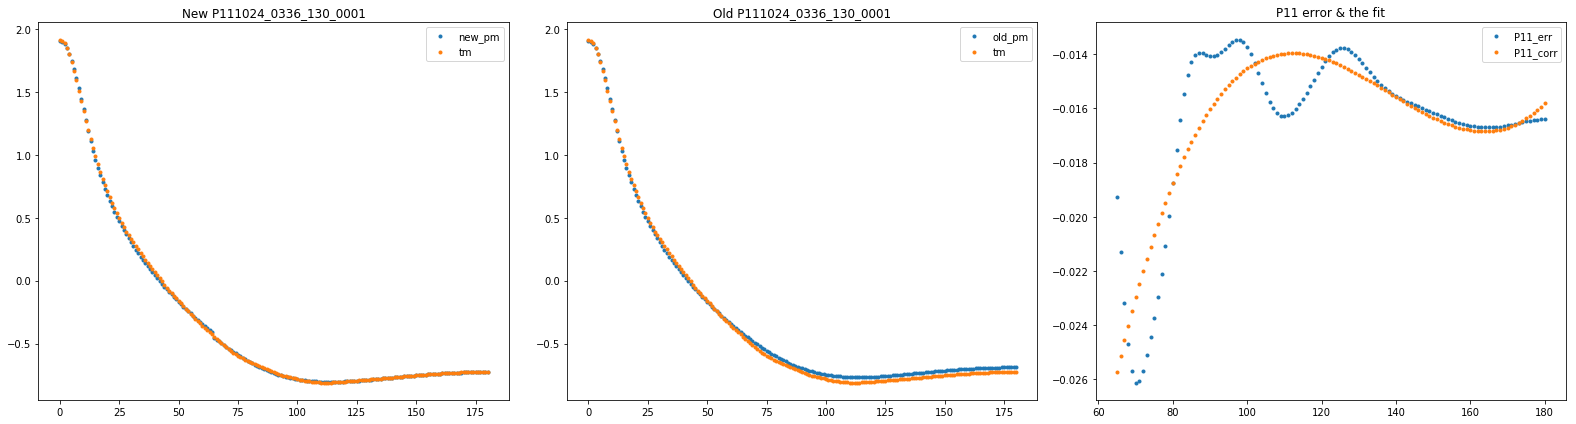

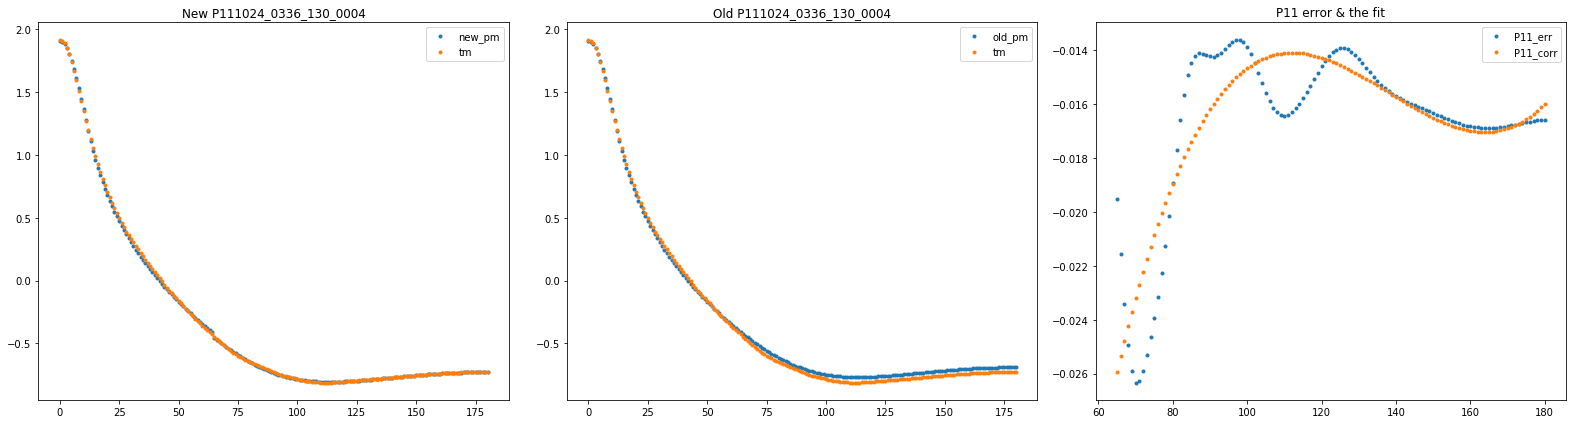

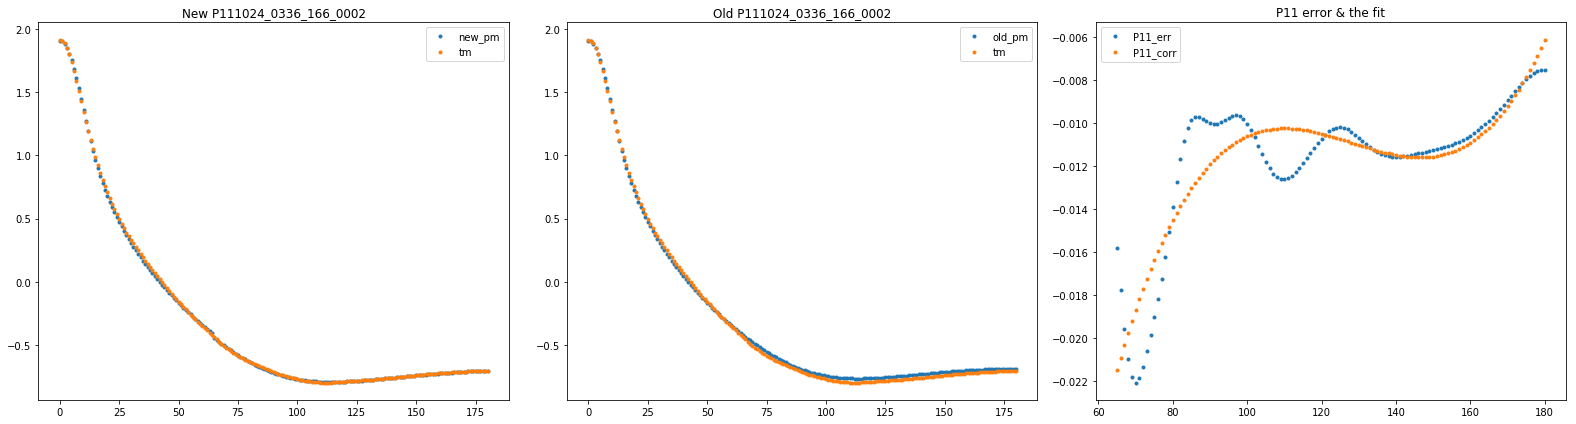

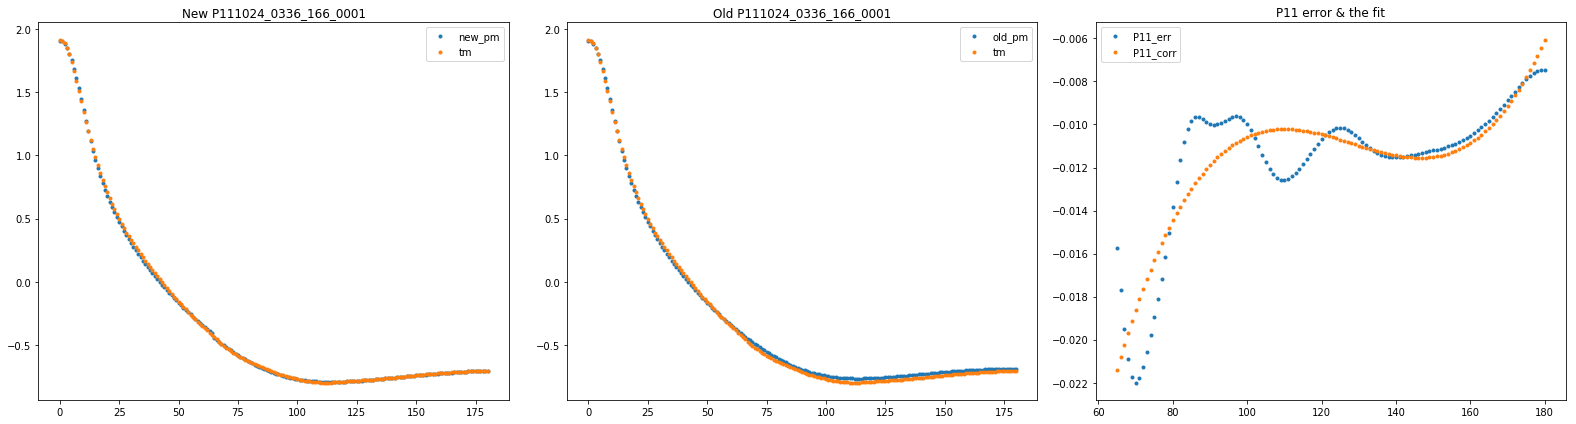

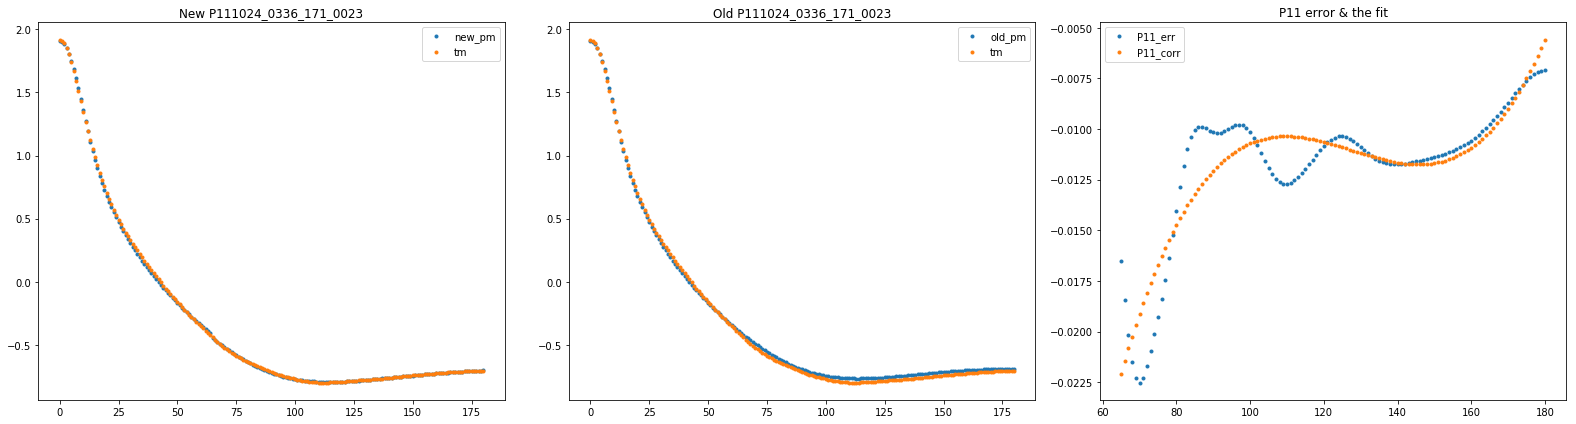

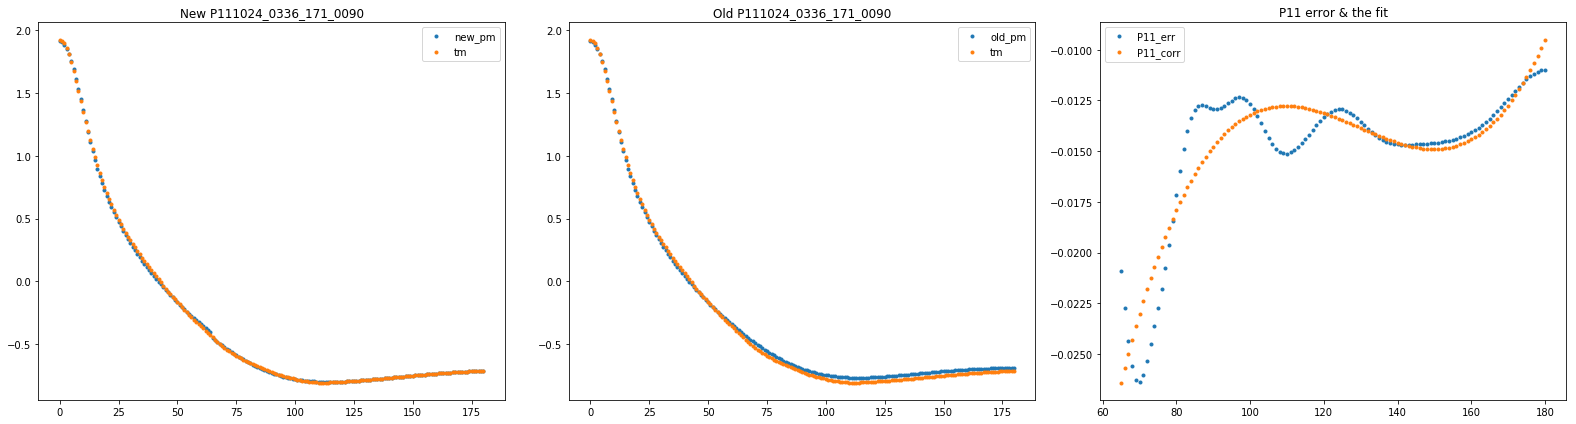

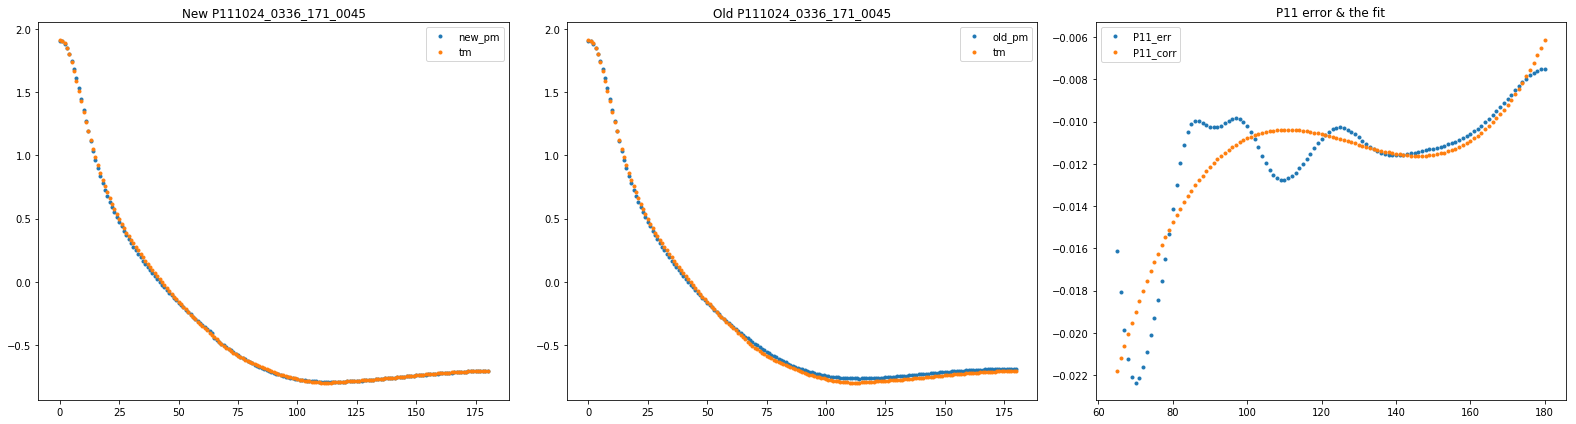

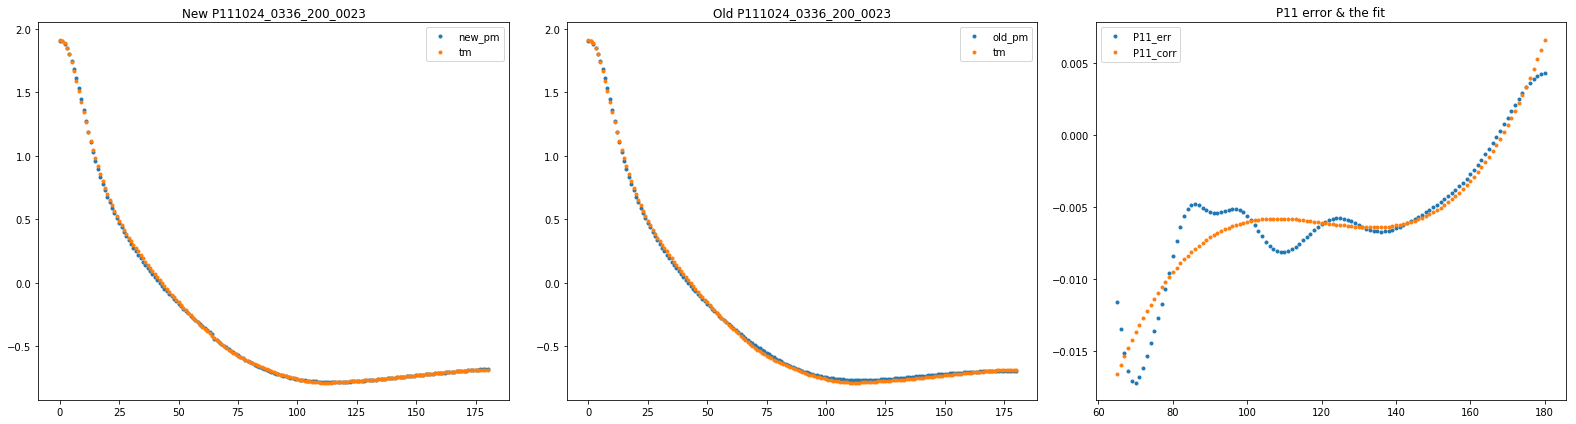

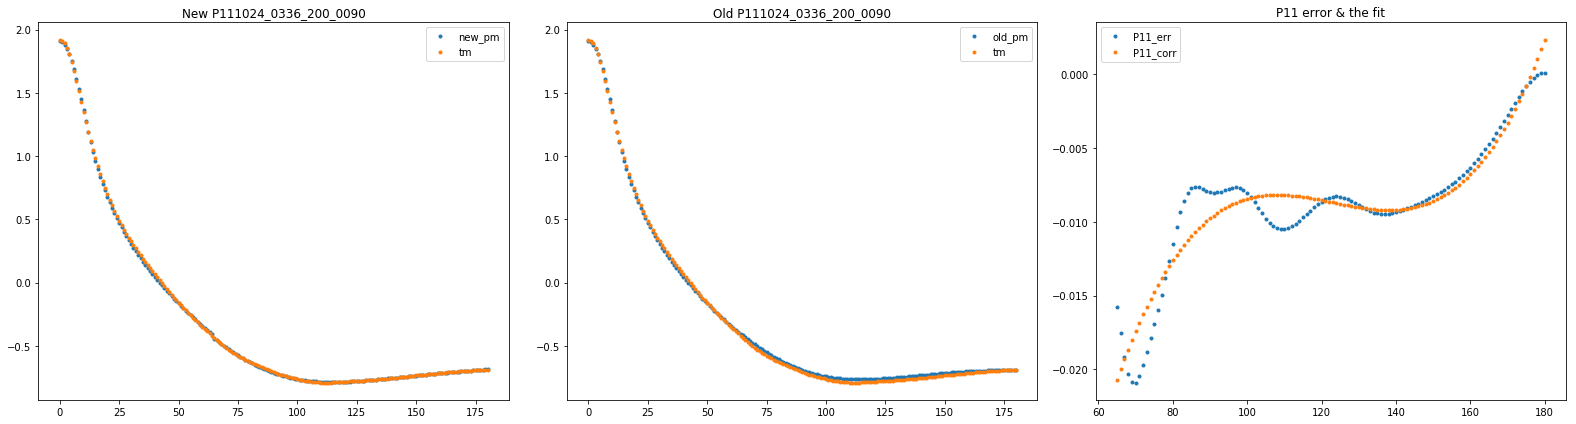

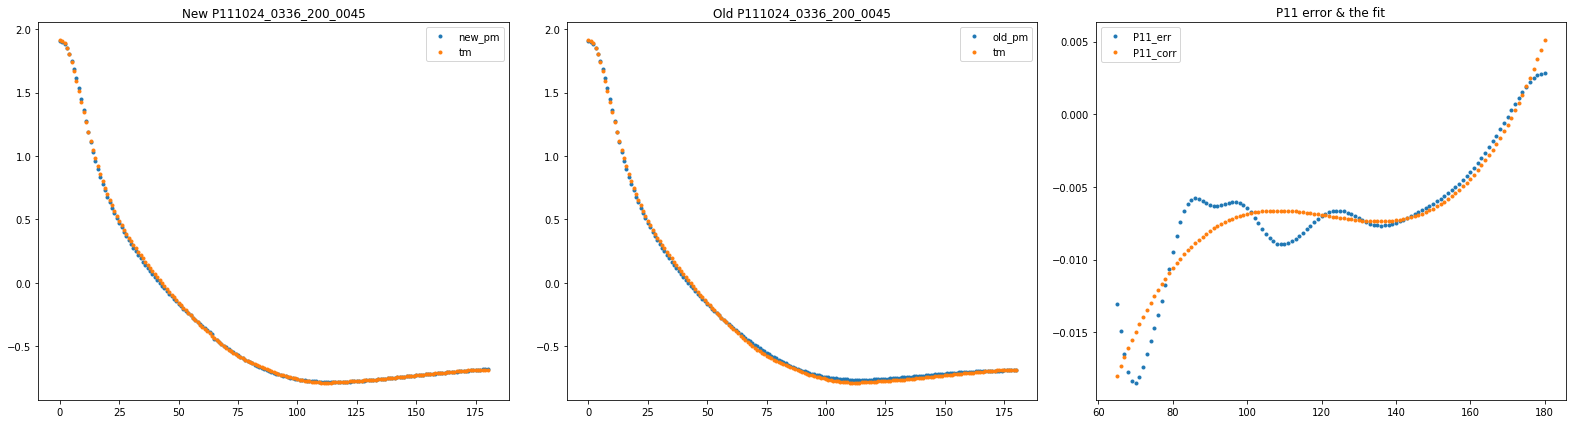

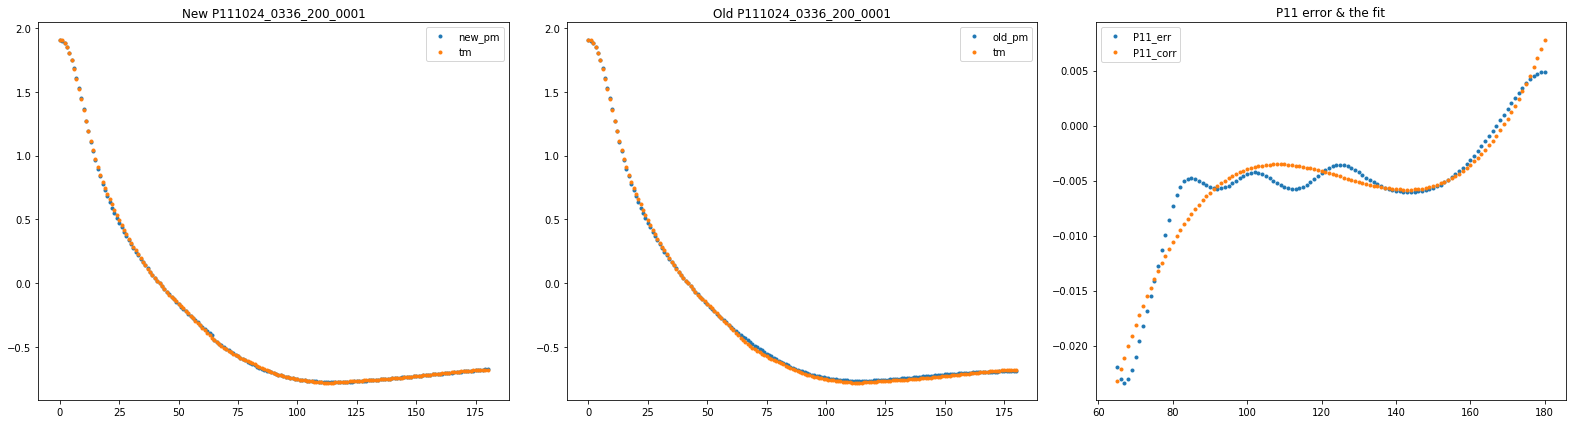

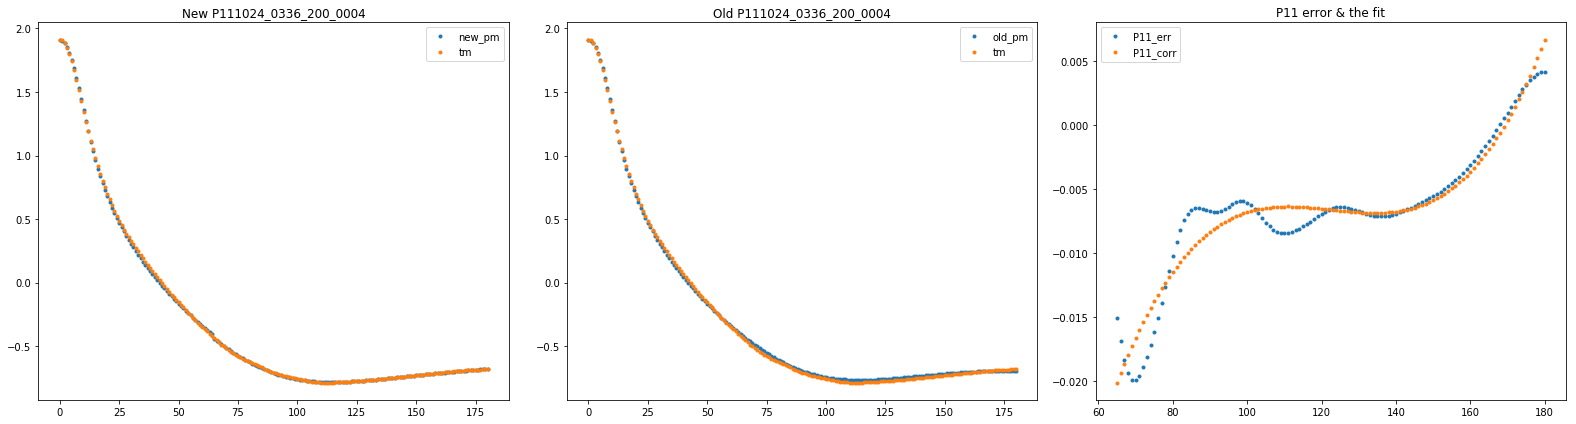

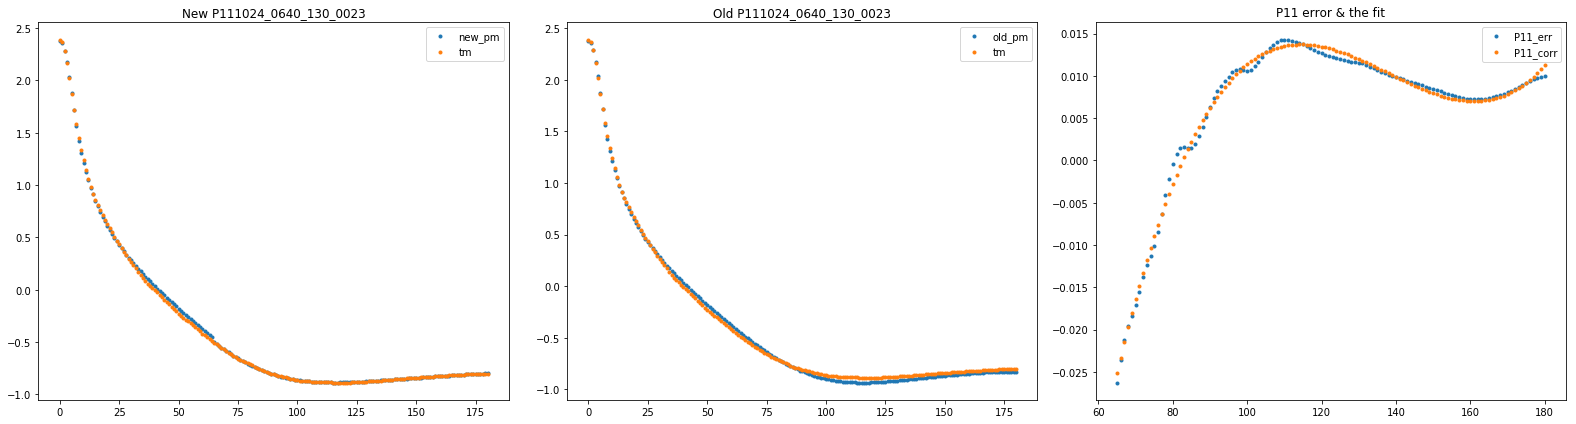

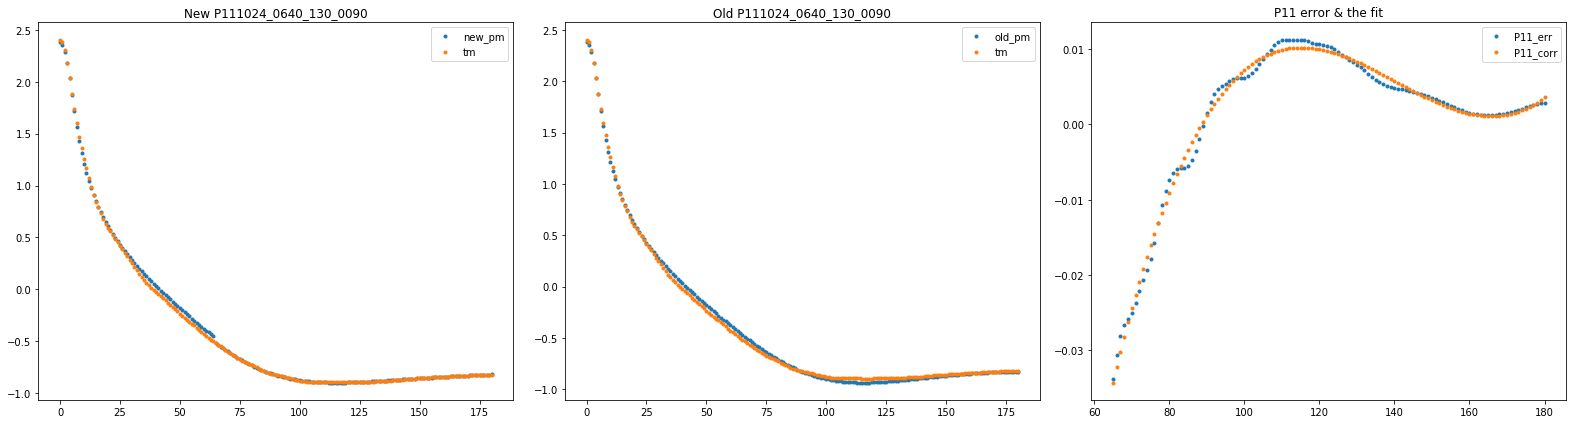

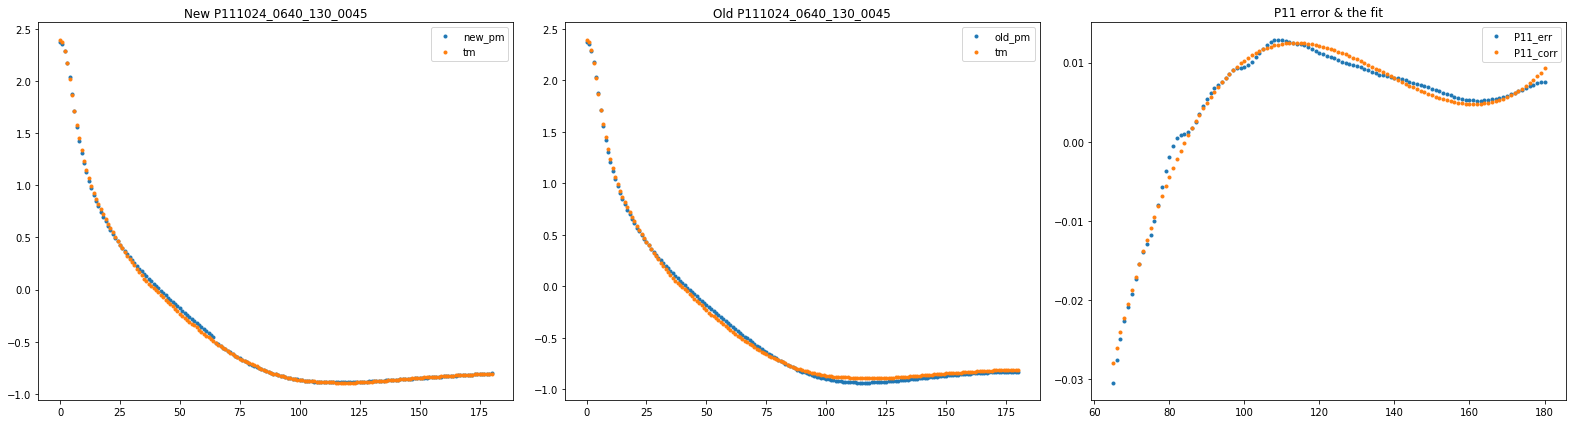

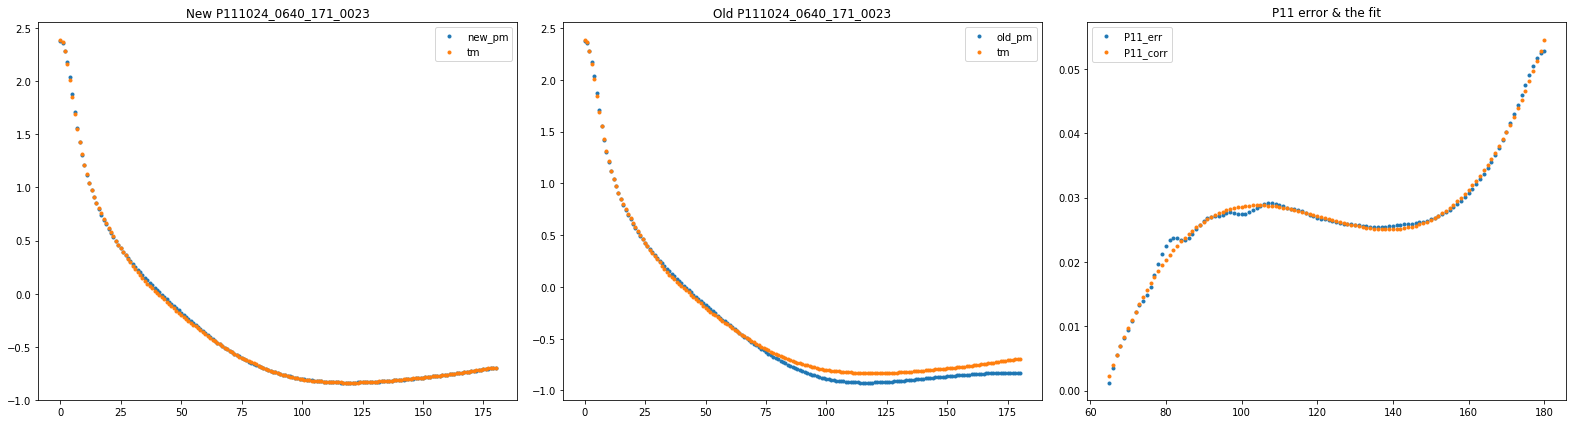

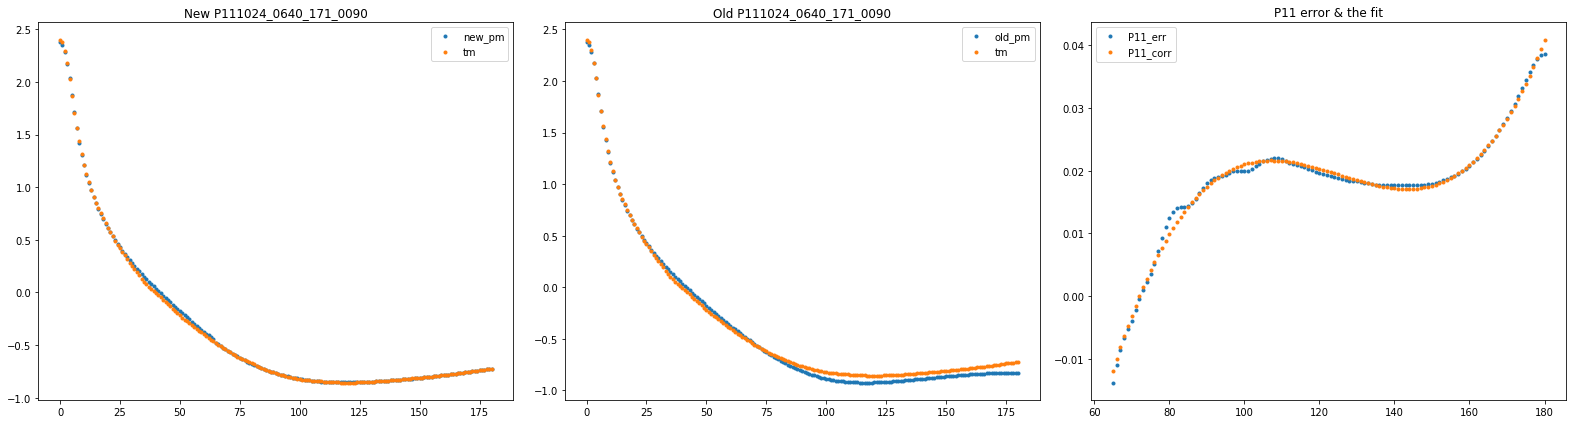

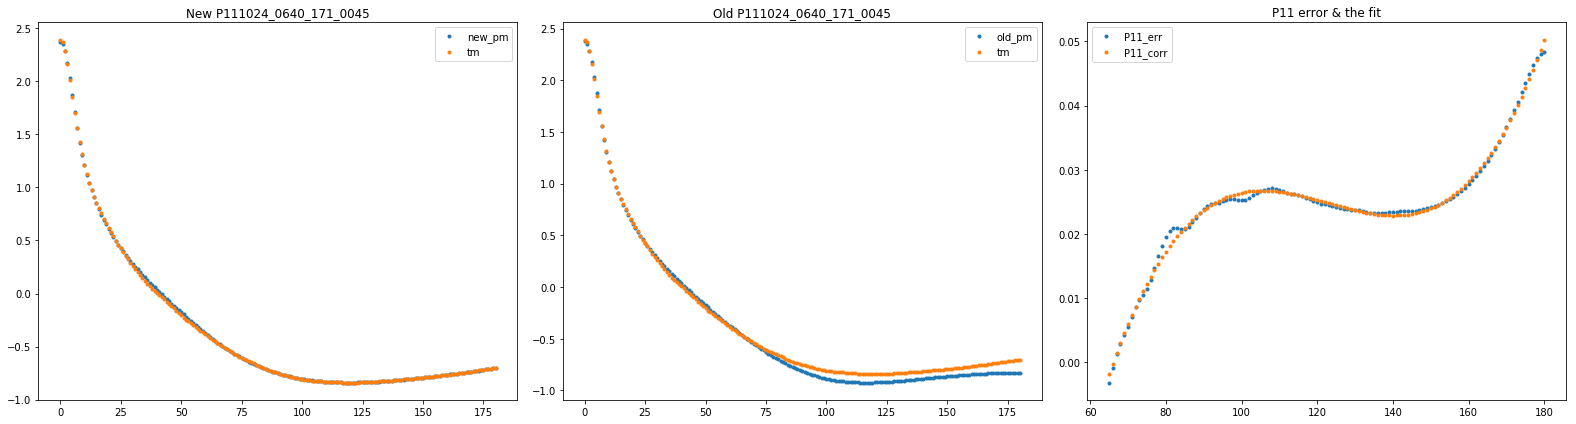

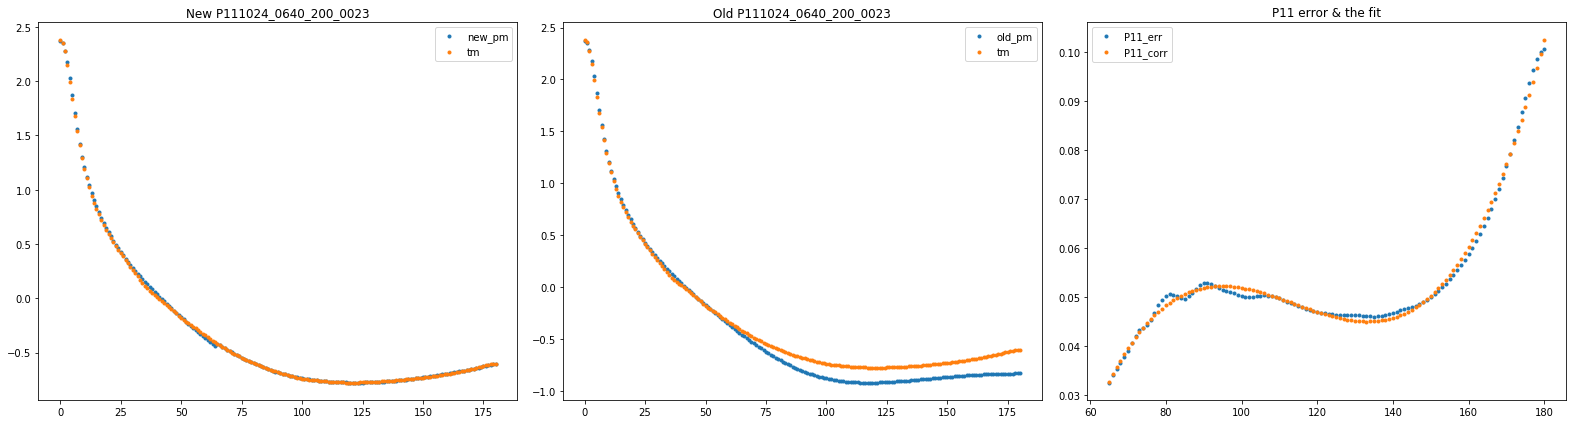

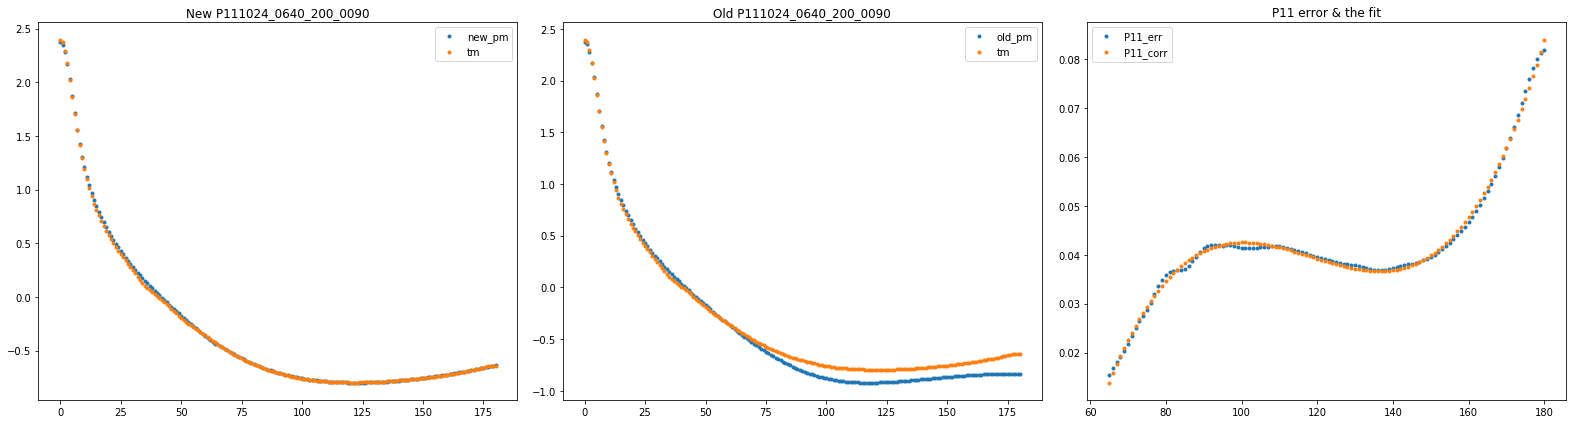

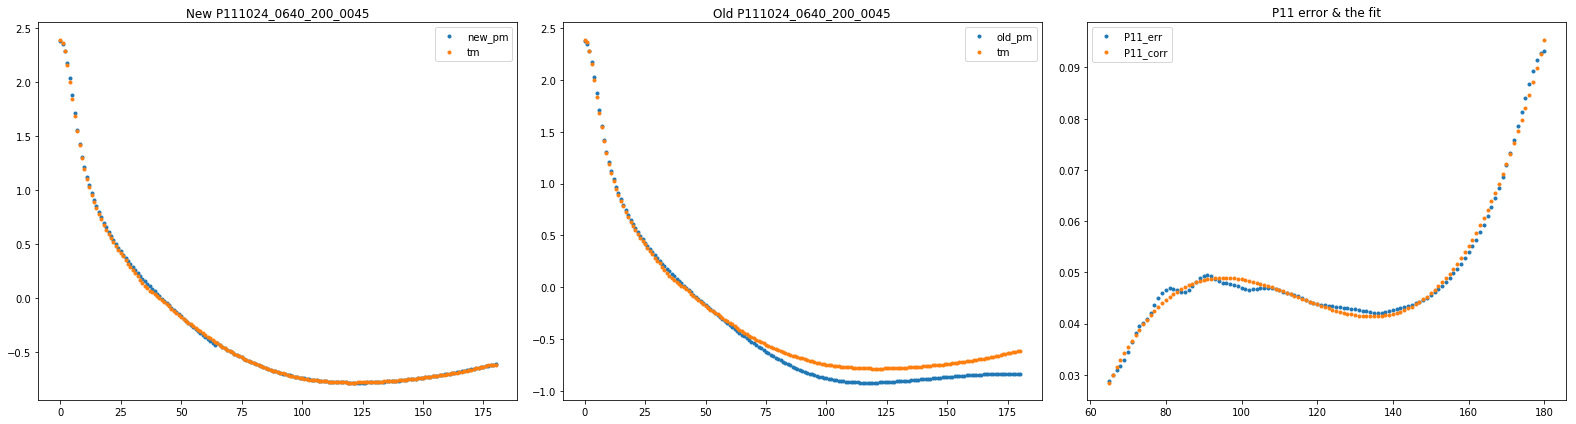

In [16]:
sphere_number = [64, 128, 256, 512, 1024]
size_param = ['0168', '0235','0320', '0336','0430', '0437', '0448','0480', '0504','0530', '0580', '0640', '0730', '0832', '0960']
real_ref = ['130', '145', '166', '168', '171', '180', '200','230']
img_ref = ['0023', '0090', '0045', '0002', '0001', '0006', '0300', '0004']
#size_param = ['0640']
#real_ref = ['200']
alpha_value = 1.0
_log = []
theta=np.arange(0,181)

bound0 = 65
bound1 = 181

x = theta[bound0:bound1]

for N in sphere_number:

    for xm in size_param:

        for nr in real_ref:

            for ni in img_ref:

                try:
                    missing = 't-matrix'
                    tm = vars()['tm{}_{}_{}_{}_eff'.format(N, xm, nr, ni)]

                    missing = ' f-fasm'
                    param = vars()['param{}_{}_{}_{}_eff'.format(N, xm, nr, ni)]

                except KeyError:
                    #print('missing run {} {}_{}_{}_{}_eff'.format(missing, N, xm, nr, ni))
                    _log.append('missing run {} {}_{}_{}_{}_eff'.format(missing, N, xm, nr, ni))
                    continue

                runid = '{}_{}_{}_{}'.format(N, xm, nr, ni)
                tm =  vars()['tm'+runid+'_mx']
                pm = vars()['param'+runid+'_mx']
                P11_err = (tm.P11 - pm.P11)[bound0:bound1]

                # Now the correction
                # First fit the error function with a 3rd Degree Legendre Polynomial

                z = np.polynomial.legendre.Legendre.fit(x, P11_err, deg=3)

                # Now Let's Correct the parametrization and plot the new and old comparison with tmatrix

                P11_corr = pd.Series(z(x), index=x)
                new_pm = pm.copy()
                new_pm.P11 = pm.P11.add(P11_corr, fill_value=0)
                fig, ax = plt.subplots(ncols=3,figsize=(22,6))

                ax[0].plot(np.log10(new_pm.P11), '.', label = 'new_pm')  #[bound0:bound1]
                ax[0].plot(np.log10(tm.P11), '.', label = 'tm')  #[bound0:bound1]
                ax[0].set_title('New P11'+runid)
                ax[0].legend()

                # Old fit
                ax[1].plot(np.log10(pm.P11), '.', label = 'old_pm')  #[bound0:bound1]
                ax[1].plot(np.log10(tm.P11), '.', label = 'tm')  #
                ax[1].legend()
                ax[1].set_title('Old P11'+runid)

                # Error Function and the Fit
                ax[2].plot(x, P11_err, '.', label = 'P11_err')
                ax[2].plot(x, P11_corr,'.', label = 'P11_corr' )
                ax[2].legend()
                ax[2].set_title('P11 error & the fit')
                plt.tight_layout()
                plt.show()




In [4]:
LP_Coeff

Ns     SP     ni    nr        p1        p2            p3            p4
0      64  0.235  0.002  1.66 -0.196361  0.005521 -3.058789e-05  4.600860e-08
1      64  0.336  0.002  1.66  0.410041 -0.009691  4.779474e-05 -6.892663e-08
2      64  0.437  0.002  1.66 -0.056854  0.000089  4.221306e-06 -9.793704e-09
3      64  0.448  0.045  1.71 -0.125733  0.001708 -3.875819e-06  1.741195e-09
4      64  0.640  0.045  1.71 -0.204137  0.004928 -2.486782e-05  3.838956e-08
5      64  0.832  0.045  1.71 -0.145847  0.005173 -3.438999e-05  6.251107e-08
6     128  0.640  0.023  1.30 -0.284799  0.006924 -3.436976e-05  4.938739e-08
7     128  0.640  0.090  1.30 -0.330598  0.007846 -3.879839e-05  5.546436e-08
8     128  0.640  0.001  1.30 -0.269343  0.006611 -3.287028e-05  4.734678e-08
9     128  0.640  0.004  1.30 -0.358212  0.008265 -3.925019e-05  5.422791e-08
10    128  0.640  0.001  1.68 -0.274983  0.007160 -3.778616e-05  5.891534e-08
11    128  0.640  0.004  1.68 -0.277289  0.007204 -3.798249e-05  5.914341e-08
12    128  0.640  0.045  1.71 -0.305969  0.007801 -4.088268e-05  6.315486e-08
13    128  0.640  0.023  2.00 -0.329358  0.008948 -4.956018e-05  8.127905e-08
14    128  0.640  0.090  2.00 -0.386210  0.010048 -5.442241e-05  8.713424e-08
15    128  0.640  0.001  2.00 -0.336872  0.009193 -5.114138e-05  8.442426e-08
16    128  0.640  0.004  2.00 -0.328099  0.008892 -4.900887e-05  8.040082e-08
17    256  0.168  0.002  1.66  0.117101 -0.001571  3.422773e-06 -2.244283e-10
18    256  0.235  0.002  1.66  0.047671 -0.000376 -2.496261e-06  7.180733e-09
19    256  0.320  0.045  1.71  0.082735 -0.002538  1.264532e-05 -1.848540e-08
20    256  0.336  0.023  1.30  0.044920 -0.001813  9.380556e-06 -1.391464e-08
21    256  0.336  0.090  1.30  0.021531 -0.001326  6.960095e-06 -1.045029e-08
22    256  0.336  0.045  1.30  0.037059 -0.001649  8.564780e-06 -1.274681e-08
23    256  0.336  0.001  1.30  0.107277 -0.003035  1.436169e-05 -1.985555e-08
24    256  0.336  0.300  1.30 -0.047407  0.000106 -1.163615e-07 -3.025085e-10
25    256  0.336  0.004  1.30  0.051357 -0.001947  1.004822e-05 -1.486921e-08
26    256  0.336  0.023  1.45  0.041168 -0.001708  8.825899e-06 -1.288674e-08
27    256  0.336  0.090  1.45  0.018671 -0.001238  6.486859e-06 -9.547356e-09
28    256  0.336  0.045  1.45  0.033613 -0.001550  8.039129e-06 -1.176394e-08
29    256  0.336  0.300  1.45 -0.047348  0.000137 -3.230780e-07  2.025325e-10
..    ...    ...    ...   ...       ...       ...           ...           ...
131   512  0.640  0.045  1.71 -0.290489  0.007671 -4.152676e-05  6.673254e-08
132   512  0.640  0.023  2.00 -0.262972  0.007579 -4.363078e-05  7.544015e-08
133   512  0.640  0.090  2.00 -0.292913  0.008010 -4.478897e-05  7.506380e-08
134   512  0.640  0.045  2.00 -0.274799  0.007766 -4.422500e-05  7.556684e-08
135  1024  0.168  0.002  1.66  0.096152 -0.001554  5.430473e-06 -6.100581e-09
136  1024  0.235  0.002  1.66  0.138551 -0.003097  1.391426e-05 -1.863573e-08
137  1024  0.336  0.023  1.30 -0.121876  0.002466 -1.228333e-05  1.769008e-08
138  1024  0.336  0.090  1.30 -0.143354  0.002904 -1.445414e-05  2.075949e-08
139  1024  0.336  0.045  1.30 -0.129134  0.002614 -1.301740e-05  1.872595e-08
140  1024  0.336  0.001  1.30 -0.114735  0.002320 -1.155943e-05  1.666999e-08
141  1024  0.336  0.004  1.30 -0.115858  0.002343 -1.167337e-05  1.683050e-08
142  1024  0.336  0.002  1.66 -0.120479  0.002624 -1.368192e-05  2.098137e-08
143  1024  0.336  0.001  1.66 -0.120122  0.002617 -1.364719e-05  2.093463e-08
144  1024  0.336  0.023  1.71 -0.126740  0.002777 -1.452916e-05  2.236554e-08
145  1024  0.336  0.090  1.71 -0.145612  0.003156 -1.636100e-05  2.484109e-08
146  1024  0.336  0.045  1.71 -0.120307  0.002620 -1.362892e-05  2.087462e-08
147  1024  0.336  0.023  2.00 -0.127468  0.002956 -1.603398e-05  2.591684e-08
148  1024  0.336  0.090  2.00 -0.144221  0.003284 -1.757937e-05  2.789731e-08
149  1024  0.336  0.045  2.00 -0.133109  0.003066 -1.655281e-05  2.657764e-08
150  1024  0.336  0.001  2.00

### Now Working on finding nr coeefficient and coefficients also as a function of ni. 
### Check if using M0 makes sense.

In [33]:
LP_Coeff

Ns     SP     ni    nr        p1        p2            p3            p4
0      64  0.235  0.002  1.66 -0.196361  0.005521 -3.058789e-05  4.600860e-08
1      64  0.336  0.002  1.66  0.410041 -0.009691  4.779474e-05 -6.892663e-08
2      64  0.437  0.002  1.66 -0.056854  0.000089  4.221306e-06 -9.793704e-09
3      64  0.448  0.045  1.71 -0.125733  0.001708 -3.875819e-06  1.741195e-09
4      64  0.640  0.045  1.71 -0.204137  0.004928 -2.486782e-05  3.838956e-08
5      64  0.832  0.045  1.71 -0.145847  0.005173 -3.438999e-05  6.251107e-08
6     128  0.640  0.023  1.30 -0.284799  0.006924 -3.436976e-05  4.938739e-08
7     128  0.640  0.090  1.30 -0.330598  0.007846 -3.879839e-05  5.546436e-08
8     128  0.640  0.001  1.30 -0.269343  0.006611 -3.287028e-05  4.734678e-08
9     128  0.640  0.004  1.30 -0.358212  0.008265 -3.925019e-05  5.422791e-08
10    128  0.640  0.001  1.68 -0.274983  0.007160 -3.778616e-05  5.891534e-08
11    128  0.640  0.004  1.68 -0.277289  0.007204 -3.798249e-05  5.914341e-08
12    128  0.640  0.045  1.71 -0.305969  0.007801 -4.088268e-05  6.315486e-08
13    128  0.640  0.023  2.00 -0.329358  0.008948 -4.956018e-05  8.127905e-08
14    128  0.640  0.090  2.00 -0.386210  0.010048 -5.442241e-05  8.713424e-08
15    128  0.640  0.001  2.00 -0.336872  0.009193 -5.114138e-05  8.442426e-08
16    128  0.640  0.004  2.00 -0.328099  0.008892 -4.900887e-05  8.040082e-08
17    256  0.168  0.002  1.66  0.117101 -0.001571  3.422773e-06 -2.244283e-10
18    256  0.235  0.002  1.66  0.047671 -0.000376 -2.496261e-06  7.180733e-09
19    256  0.320  0.045  1.71  0.082735 -0.002538  1.264532e-05 -1.848540e-08
20    256  0.336  0.023  1.30  0.044920 -0.001813  9.380556e-06 -1.391464e-08
21    256  0.336  0.090  1.30  0.021531 -0.001326  6.960095e-06 -1.045029e-08
22    256  0.336  0.045  1.30  0.037059 -0.001649  8.564780e-06 -1.274681e-08
23    256  0.336  0.001  1.30  0.107277 -0.003035  1.436169e-05 -1.985555e-08
24    256  0.336  0.300  1.30 -0.047407  0.000106 -1.163615e-07 -3.025085e-10
25    256  0.336  0.004  1.30  0.051357 -0.001947  1.004822e-05 -1.486921e-08
26    256  0.336  0.023  1.45  0.041168 -0.001708  8.825899e-06 -1.288674e-08
27    256  0.336  0.090  1.45  0.018671 -0.001238  6.486859e-06 -9.547356e-09
28    256  0.336  0.045  1.45  0.033613 -0.001550  8.039129e-06 -1.176394e-08
29    256  0.336  0.300  1.45 -0.047348  0.000137 -3.230780e-07  2.025325e-10
..    ...    ...    ...   ...       ...       ...           ...           ...
131   512  0.640  0.045  1.71 -0.290489  0.007671 -4.152676e-05  6.673254e-08
132   512  0.640  0.023  2.00 -0.262972  0.007579 -4.363078e-05  7.544015e-08
133   512  0.640  0.090  2.00 -0.292913  0.008010 -4.478897e-05  7.506380e-08
134   512  0.640  0.045  2.00 -0.274799  0.007766 -4.422500e-05  7.556684e-08
135  1024  0.168  0.002  1.66  0.096152 -0.001554  5.430473e-06 -6.100581e-09
136  1024  0.235  0.002  1.66  0.138551 -0.003097  1.391426e-05 -1.863573e-08
137  1024  0.336  0.023  1.30 -0.121876  0.002466 -1.228333e-05  1.769008e-08
138  1024  0.336  0.090  1.30 -0.143354  0.002904 -1.445414e-05  2.075949e-08
139  1024  0.336  0.045  1.30 -0.129134  0.002614 -1.301740e-05  1.872595e-08
140  1024  0.336  0.001  1.30 -0.114735  0.002320 -1.155943e-05  1.666999e-08
141  1024  0.336  0.004  1.30 -0.115858  0.002343 -1.167337e-05  1.683050e-08
142  1024  0.336  0.002  1.66 -0.120479  0.002624 -1.368192e-05  2.098137e-08
143  1024  0.336  0.001  1.66 -0.120122  0.002617 -1.364719e-05  2.093463e-08
144  1024  0.336  0.023  1.71 -0.126740  0.002777 -1.452916e-05  2.236554e-08
145  1024  0.336  0.090  1.71 -0.145612  0.003156 -1.636100e-05  2.484109e-08
146  1024  0.336  0.045  1.71 -0.120307  0.002620 -1.362892e-05  2.087462e-08
147  1024  0.336  0.023  2.00 -0.127468  0.002956 -1.603398e-05  2.591684e-08
148  1024  0.336  0.090  2.00 -0.144221  0.003284 -1.757937e-05  2.789731e-08
149  1024  0.336  0.045  2.00 -0.133109  0.003066 -1.655281e-05  2.657764e-08
150  1024  0.336  0.001  2.00

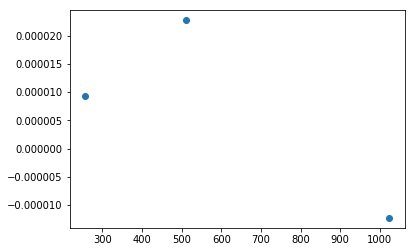

In [45]:
cc= LP_Coeff[ (LP_Coeff.SP ==0.336) & (LP_Coeff.nr ==1.3) & (LP_Coeff.ni == 0.023)]
plt.plot(cc['Ns'],cc['p3'], 'o')
plt.show()

In [39]:
cc

Ns    SP     ni   nr        p1        p2        p3            p4
6     128  0.64  0.023  1.3 -0.284799  0.006924 -0.000034  4.938739e-08
55    256  0.64  0.023  1.3 -0.391965  0.009593 -0.000049  7.280877e-08
126   512  0.64  0.023  1.3 -0.318389  0.007847 -0.000040  5.937725e-08
152  1024  0.64  0.023  1.3 -0.306322  0.007278 -0.000036  5.192269e-08

In [107]:
def refr(data):
    #t['m0'] = abs(((t.nr + t.ni*1j)**2 -1)/((t.nr + t.ni*1j)+2))
    data['m0'] = (data.nr)/(100*data.ni)
    return data
    

columns_to_keep = ['Ns','SP','nr','ni','m0','p1','p2','p3','p4']
t = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.SP== 0.640 )  &  (LP_Coeff.nr == 1.68 )  ]
t = refr(t)

t2 = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.SP== 0.640 )  &  (LP_Coeff.nr == 1.45 )  ]
t2 = refr(t2)

t3 = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.SP== 0.640 )  &  (LP_Coeff.nr == 1.3 )  ]
t3 = refr(t3)

t4 = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.SP== 0.640 )  &  (LP_Coeff.nr == 1.8 )  ]
t4 = refr(t4)

t5 = LP_Coeff[(LP_Coeff.Ns == 256) &  (LP_Coeff.SP== 0.640 )  &  (LP_Coeff.nr == 2.0 )  ]
t5 = refr(t5)

dt=[t[columns_to_keep],t2[columns_to_keep], t3[columns_to_keep], t4[columns_to_keep], t5[columns_to_keep]]
pd.concat(dt)

C:\Users\kurt_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Ns    SP    nr     ni         m0        p1        p2        p3  \
66  256  0.64  1.68  0.023   0.730435 -0.378166  0.009775 -0.000052   
67  256  0.64  1.68  0.090   0.186667 -0.422212  0.010618 -0.000056   
68  256  0.64  1.68  0.045   0.373333 -0.392126  0.010029 -0.000053   
69  256  0.64  1.68  0.001  16.800000 -0.353564  0.009358 -0.000051   
70  256  0.64  1.68  0.004   4.200000 -0.355679  0.009396 -0.000051   
61  256  0.64  1.45  0.023   0.630435 -0.386871  0.009641 -0.000050   
62  256  0.64  1.45  0.090   0.161111 -0.488711  0.011897 -0.000061   
63  256  0.64  1.45  0.045   0.322222 -0.401779  0.009932 -0.000051   
64  256  0.64  1.45  0.300   0.048333 -0.611715  0.014106 -0.000070   
65  256  0.64  1.45  0.004   3.625000 -0.374319  0.009394 -0.000049   
55  256  0.64  1.30  0.023   0.565217 -0.391965  0.009593 -0.000049   
56  256  0.64  1.30  0.090   0.144444 -0.435065  0.010452 -0.000053   
57  256  0.64  1.30  0.045   0.288889 -0.406706  0.009888 -0.000050   
58  256  0.64  1.30  0.001  13.000000 -0.366578  0.009124 -0.000047   
59  256  0.64  1.30  0.300   0.043333 -0.540694  0.012507 -0.000063   
60  256  0.64  1.30  0.004   3.250000 -0.368874  0.009170 -0.000047   
72  256  0.64  1.80  0.023   0.782609 -0.374470  0.009882 -0.000054   
73  256  0.64  1.80  0.090   0.200000 -0.413732  0.010573 -0.000057   
74  256  0.64  1.80  0.045   0.400000 -0.388465  0.010135 -0.000055   
75  256  0.64  1.80  0.300   0.060000 -0.504739  0.012086 -0.000062   
76  256  0.64  1.80  0.004   4.500000 -0.643442  0.016266 -0.000081   
77  256  0.64  2.00  0.023   0.869565 -0.358997  0.009914 -0.000056   
78  256  0.64  2.00  0.090   0.222222 -0.425543  0.011210 -0.000062   
79  256  0.64  2.00  0.045   0.444444 -0.384680  0.010362 -0.000058   
80  256  0.64  2.00  0.001  20.000000 -0.424105  0.011540 -0.000064   
81  256  0.64  2.00  0.300   0.066667 -0.501319  0.012249 -0.000064   
82  256  0.64  2.00  0.004   5.000000 -0.388472  0.010840 -0.000062   

              p4  
66  8.261005e-08  
67  8.693482e-08  
68  8.372919e-08  
69  8.117584e-08  
70  8.132848e-08  
61  7.586590e-08  
62  9.181865e-08  
63  7.757098e-08  
64  1.034723e-07  
65  7.442569e-08  
55  7.280877e-08  
56  7.831185e-08  
57  7.469434e-08  
58  7.017558e-08  
59  9.145854e-08  
60  7.046807e-08  
72  8.685766e-08  
73  8.938205e-08  
74  8.784798e-08  
75  9.467316e-08  
76  1.260736e-07  
77  9.347394e-08  
78  1.003846e-07  
79  9.521666e-08  
80  1.057180e-07  
81  9.966880e-08  
82  1.035056e-07

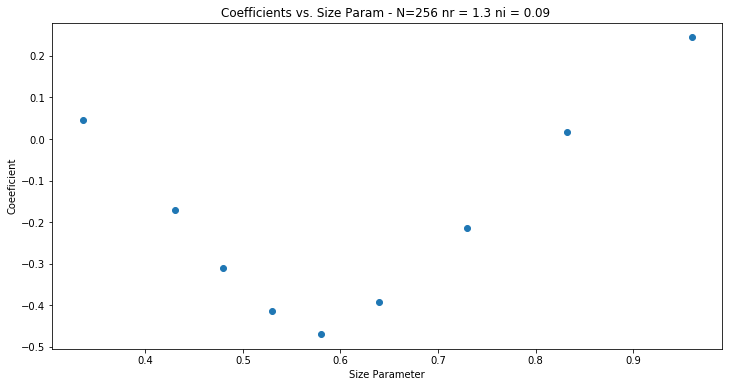

In [20]:
plt.figure(figsize=[12,6])
plt.plot(t.SP, t.p1,'o')
plt.title('Coefficients vs. Size Param - N=256 nr = 1.3 ni = 0.09 ',)
plt.xlabel('Size Parameter')
plt.ylabel('Coeeficient')
plt.show()



### From Matlab I found the following statistics:

#### For P1:

   * for size_param <= 0.6
       * $ p1\ =\ -2.183*x_p\ +\ 0.7642 $
   * for size param >= 0.58
       * $ p1\ =\ 2.009*x_p - 1.674 $
#### For P2:

   * for size_param <= 0.60
    
        $f(x) = a*x + b$
        
       Coefficients (with 95% confidence bounds):
       
        $a =\ \ \ \ 0.05313  (0.04459,\ 0.06167)$
         
        $b =\ \ \ \  -0.01988  (-0.02397,\ -0.01579)$
         
        *  $P2\ =\  0.05313*x_p\ -\ -0.01988$ 

        Goodness of fit:

          SSE: 7.636e-07
          R-square: 0.9924
          Adjusted R-square: 0.9899
          RMSE: 0.0005045
            
   * for size param >= 0.6
    
        $f(x) = p1*x + p2$
         
        Coefficients (with 95% confidence bounds):

        $p1 =    -0.04627\ \ \ $(-0.05289, -0.03966)
         
        $p2 =     0.0395\ \ \ $(0.03421, 0.04479)

        Goodness of fit:
        
          SSE: 2.686e-07
          R-square: 0.9978
          Adjusted R-square: 0.9967
          RMSE: 0.0003664
          
#### For P3:

   *   turning point: 
        * size_param = ~ 0.60

   * for size_param <= 0.60
    
      $f(x) = a*x + b$
        
       Coefficients (with 95% confidence bounds):
       
        $a =\ \ \ \  -0.0002598\ \ \ (-0.0003261,\ -0.0001936)$
         
        $b =\ \ \ \ 0. 9.999e-05\ \ \ (6.829e-05,\ 0.0001317)$

        Goodness of fit:

          SSE: 4.593e-11
          R-square: 0.9811
          Adjusted R-square: 0.9748
          RMSE: 3.913e-06

   * for size param >= 0.60
    
        $f(x) = p1*x + p2$
         
        Coefficients (with 95% confidence bounds):

        $p1 =\ \ \ \ 0.0002216\ \ \ (0.0001598,\ 0.0002833)$
         
        $p2 =\ \ \ \ -0.0001937\ \ \ (-0.000243,\ -0.0001443)$

        Goodness of fit:
        
          SSE: 2.338e-11
          R-square: 0.9917
          Adjusted R-square: 0.9875
          RMSE: 3.419e-06
          
#### For P4:



   * for size_param <= 0.60
    
       $f(x) = a*x + b$
        
      Coefficients (with 95% confidence bounds):
       
        $a =\ \ \ \ 3.732e-07\ \ \ (2.457e-07,\ 5.007e-07)$
         
        $b =\ \ \ \  1.461e-07\ \ \  (2.071e-07,\ -8.504e-08)$

        Goodness of fit:

          SSE: 1.702e-16
          R-square: 0.9666
          Adjusted R-square: 0.9554
          RMSE: 7.533e-09
          
          
   * for size param >= 0.60
    
      $f(x) = p1*x + p2$
         
     Coefficients (with 95% confidence bounds):

      $p1 =\ \ \ \ -3.061e-07\ \ \ (-4.231e-07,\ -1.891e-07)$
         
      $p2 =\ \ \ \  2.739e-07\ \ \  (1.804e-07,\ 3.675e-07)$

        Goodness of fit:
   
          SSE: 8.393e-17
          R-square: 0.9845
          Adjusted R-square: 0.9767
          RMSE: 6.478e-09
          
   ## Finding the function of nr

### For P1

If I exclude nr = 2.3 two model can be fitted. The first one more accurate.

However If 2.3 is included only fourier model fits pricesely. If nr is an indpendent variable in the coefficients functions then I may include fouirer otherwise keeping the model simple is better.

* 1 - Linear Model

Linear model:

   $f(x) = a*(sin(x-pi)) + b*((x-10)^2) + c$
   
Coefficients (with 95% confidence bounds):

   $a =    -0.03564  (-0.1084, 0.03715)$
   
   $b =   -0.002122  (-0.002664, -0.001579)$
   
   $c =      -0.281  (-0.3389, -0.2232)$


Goodness of fit:

    SSE: 1.845e-06
    R-square: __0.9946__
    Adjusted R-square: 0.9892
    RMSE: 0.0009604

* 2 - Polynomial Fit

Linear model Poly1:

   $f(x) = p1*x + p2$
   
Coefficients (with 95% confidence bounds):
 
 $p1 =     0.03288  (0.02418, 0.04157)$
 
 $p2 =     -0.4489  (-0.4633, -0.4344)$

Goodness of fit:

      SSE: 6.901e-06
      R-square: 0.9797
      Adjusted R-square: 0.9729
      RMSE: 0.001517
      
### For P2

* Again two model can be fitted.

* with or without excluding 2.3 the best fit is the linear model

* Here I only save the fits without nr = 2.3

* **1- Linear Model**

Linear model:

   $f(x) = a*(sin(x-pi)) + b*((x-10)^2) + c$
   
Coefficients (with 95% confidence bounds):

   $a =    0.001902  (0.001016, 0.002788)$
   
   $b =  -3.099e-05  (-3.759e-05, -2.439e-05)$
   
   $c =     0.01407  (0.01337, 0.01478)$

Goodness of fit:

      SSE: 2.732e-10
      R-square: **0.9981**
      Adjusted R-square: 0.9962
      RMSE: 1.169e-05
      
 * **2- Polynomial Fit**
 
 Linear model Poly1:
 
 $f(x) = p1*x + p2$
 
Coefficients (with 95% confidence bounds):

   $p1 =   0.0006554  (0.0003086, 0.001002)$
   $p2 =     0.00899  (0.008413, 0.009568)$

Goodness of fit:

      SSE: 1.099e-08
      R-square: **0.9234**
      Adjusted R-square: 0.8979
      RMSE: 6.052e-05


### For P3

* Two model fitted.

* Interestingly with or without excluding 2.3 linear model is the exact same and fits perfectly, check the $R^2$ below

* However, when 2.3 excluded poly fit also not too bad. $R^2=0.9722$. but definetely overestimates further the nr=2.0

* **1- Linear model:**

 $f(x) = a*(sin(x-pi)) + b*((x-10)^2) + c$
 
Coefficients (with 95% confidence bounds):

   $a =   -1.58e-05  (-1.872e-05, -1.288e-05)$
   
   $b =   5.441e-07  (5.223e-07, 5.658e-07)$
   
   $c =  -0.0001069  (-0.0001092, -0.0001045)$

Goodness of fit:

      SSE: 2.967e-15
      R-square: **0.9999**
      Adjusted R-square: 0.9998
      RMSE: 3.851e-08
      
* **2- Polynomial fit:**

 $f(x) = p1*x + p2$
 
Coefficients (with 95% confidence bounds):

   $p1 =  -1.024e-05  (-1.298e-05, -7.492e-06)$
   
   $p2 =  -3.673e-05  (-4.129e-05, -3.216e-05)$

Goodness of fit:

      SSE: 6.872e-13
      R-square: **0.9792**
      Adjusted R-square: 0.9722
      RMSE: 4.786e-07

### For P4

* Two Model Fitted. 

* linear model fit perfectly, but poly fit is also good with $R^2 = 0.986$

* **1- Linear model:**

 $f(x) = a*(sin(x-pi)) + b*((x-2*pi)^2) + c$
 
Coefficients (with 95% confidence bounds):

   $a =   3.998e-08  (2.93e-08, 5.066e-08)$
   
   $b =  -2.847e-09  (-2.99e-09, -2.703e-09)$
   
   $c =   1.838e-07  (1.749e-07, 1.928e-07)$

Goodness of fit:

      SSE: 4.026e-20
      R-square: **0.9999**
      Adjusted R-square: 0.9997
      RMSE: 1.419e-10
      
* **2- POLYNOMIAL MODEL:**

 $f(x) = p1*x + p2$
 
Coefficients (with 95% confidence bounds):

   $p1 =    2.93e-08  (2.29e-08, 3.57e-08)$
   
   $p2 =   3.558e-08  (2.492e-08, 4.624e-08)$

Goodness of fit:

      SSE: 3.746e-18
      R-square: **0.986**
      Adjusted R-square: 0.9814
      RMSE: 1.117e-09

# Fitting with a new variable M0(Pxx)
This new variable has a common form but its coefficients depend on the degree of legendre polynomial which is being fitted.

* Common shape of M0

## $M0 = | \frac{(((a1*nr + \log(b1*ni))^2 -1)} {((a2*nr + \log(b2*ni))^2 + 2))} |^2$
    
* The advantage of this new variable: 
    * It reduces the independent variables in the error function from 4 to 3 by combining nr and ni as one variable.
    * Possibly provides a better, more stable predictor outside the tested range (not sure about this!)
    * Somewhat consistent with other theorotical scattering models, because a simpler version of M0 appears in analytical solutions of many different scattering problems.

* Possible disadvantage:
    * fitting nr, or ni(not actually tested ni yet) while keeping all the other variables constant is very accurate. R^2 > 0.95 usually. However, R^2 ~ 0.85-0.9 when fitting M0, i.e larger spread on scattered plots of M0 vs LPcoeff. 
    * Normalizing( Making the distribution Normal) M0 before fitting is more difficult than linearizing nr and ni separately. 
    
## Results

### For P4

* Normalized M0: 

* Multiple Polynomial fit for m0, sp and LP4


Linear model Poly12:

   $f(x,y) = p00 + p10*x + p01*y + p11*x*y + p02*y^2$
     
Coefficients (with 95% confidence bounds):

   p00 =   1.972e-09  (-9.994e-08, 1.039e-07)
   
   p10 =    -0.02345  (-0.7418, 0.6949)
   
   p01 =   3.561e-07  (9.851e-08, 6.136e-07)
   
   p11 =       1.592  (0.659, 2.524)
   
   p02 =   -4.17e-07  (-5.773e-07, -2.568e-07)

Goodness of fit:

  SSE: 1.712e-15
  R-square: 0.9841
  Adjusted R-square: 0.983
  RMSE: 5.433e-09

#### After Finding Polynomial fit, I will register it as a single variable again without the cosntant term (P00) and will do another multiple regression this time with SP_M0, N vs. LP4. I should reaaly be careful about this. I will calculate the SP_M0 in python just like I did for M0. I have alot of suspicion about this method. I should consult a mathematician. Talk to Mehmet Gumus.

## Multiple Regression

I have a much better fit if I separate two regimes of sp ( $sp \, <0.64 \ \ \& \ \ sp \, \geq 0.64$ );

and two regimes of N ( $ N \lt 512 \ \ \& \ \  N \geq 512 $) making 4 different regimes in total

However, I do not have enough data, so I will only use two N regimes for now. May be in the future when I get more data I can distinguish all the regimes

***

### 1. $ N \lt 512$ 

 #### A. P4
 * With this choice:
 
 ` reg=MultiPolyRegress(all_512(:,:),y,[2 3 1 0],'figure')  `
 
$ R^2 \ = \  0.8998$

and the Polynomial is:

$ @(x1,x2,x3,x4)-3.4237e-09.*x3-1.4583e-06.*x2+1.3294e-08.*x2.*x3+2.99e-06.*x2.^2-4.6052e-09.*x2.^2.*x3-2.2999e-10.*x1+3.7295e-12.*x1.*x3+1.7156e-09.*x1.*x2-8.6365e-12.*x1.*x2.*x3-1.3147e-09.*x1.*x2^2-2.0411e-13.*x1.^2+-1.7231e-15.*x1^2*x3-4.0505e-13*x1^2*x2+1.8032e-07*1-1.8034e-06*x2^3 $

* When adding the following function to model as an independent variable it only slightly enhances the fit but this function behaves much better than linear m0

$a*(sin(1*m_0-pi/3))+b*((m_0-9)^2)+c*(1)$ with        
       
       a =  -2.438e-06  (-3.254e-06, -1.623e-06)
       b =  -1.412e-07  (-1.83e-07, -9.944e-08)
       c =   8.977e-06  (6.379e-06, 1.157e-05)
       

*  **Note:** Start some of these runs for n = 128. 

 |Wavelength     | nr  |ni    | 
 |:-------------:|:---:|:----:|          
 | 0.4299(0.7306)| 1.3 |0.0226|
 |0.4799(0.6545)|  |
 |0.5299(0.5927)|
 |0.5795(0.5420)|1.45 |0.0226|
 | 0.7299(0.4303)|
 |0.8319 (0.37755)|
 |0.336(0.9348)|1.8 |0.0226|
 |0.6398(0.4909)|
 |0.9598(0.3272)|
 |0.168(1.8696)|2.0| 0.0226|
 
* __ After those runs, & including 512 0.83 runs I can separate all four regimes. In any case do not use n=64 runs if they make the fit worse__
* ** For outside fits use 1st degree polynomial for all the variables. Then that's it. It is done. **
* For other LP coeff. revisit m0 fit, and make them linear outside the regime

# Some preliminary results

* For $sp \lt 0.63$ and $N \lt 512$ fit is great with O\[N,sp,S(m0)] = \[2 2 1]
* For $sp \geq 0.63$ and $N \geq 512$ fit is sufficiently good with O\[N,sp,S(m0)] = \[2 1 1]

*

# Ideas

* I may fit the LPS using the highest order that makes sense on any parameter. And then use the fit function with the lowest order possible to fit, on any parameter to interpolate, then use the 1st order polynomial to extropolate.

* This especially make sense for $\alpha$ because on some regimes I need to use third order $\alpha$. While some times third order required and works well, it causes rank deficiency, as it happens for exm. at $N \geq 512$ and $ \alpha < 063$

1. for $ N \geq 512$ do not separate $\alpha$ then try

1. Try all regimes at once

2. only separate $\alpha$

3. Only separate N

# Final Results - Don't overdo it. 

## P1

* $\mathbf{m_0}$ is linearized first. This is to avoid large polynomial terms and also to make sure that m0 behaves linearly out of the range tested.

* The following function perfectly behaves linearly when $\mathbf{\alpha \geq 0.63}$ which is the case for m0 vs. p1
    
     $(abs(((a1*data.nr + np.log10(b1*data.ni)*1j)**2 -1)/((a2*data.nr + np.log10(b2*data.ni)*1j)**2 + 2)))**-1.7218 a1=1, b1=0.85,a2=0.73, b2 = 18$

### 1. For $\alpha \geq 0.63$ definetely do not separate N. 

   Use this fit **P1GOF_gt063** with **O\[N,$\alpha$, m0] = \[3 1 1]** : $R^2 = 0.99$ No kidding.
    
   Polynomial expression: 
   
   $\mathbf{@(x1,x2,x3,x4)+-c_1*x_4 + c_2*x_2 + c_3*x_2*x_4 + c_4*x_1 + c_5*x_1*x_4 - c_6*x_1*x_2 - c_7*x_1*x_2*x_4 + c_8*x_1^2 - c_9*x_1^2*x_4 - c_{10}*x_1^2*x_2 - c_{11}*1 - c_{12}*x_1^3}$
    
  __Coefficients changed: MAtlab output:@(x1,x2,x3,x4,x5)+-17.4306.*x5+-0.802933.*x2+28.162.*x2.*x5+-0.0146363.*x1+0.0695457.*x1.*x5+0.0195817.*x1.*x2+-0.105575.*x1.*x2.*x5+2.6642e-05.*x1.^2+-1.46239e-06.*x1.^2.*x5+-3.34491e-05.*x1.^2.*x2+0.416808.*1+-3.24602e-09.*x1.^3__

    
 __Coefficients__
 
 ** Note that I haven't updated the below table. Use the matlab output above**
 
| c1| c2| c3| c4| c5| c6| c7| c8| c9|c10|c11|c12|
|---|---|---|---|---|---|---|---|---|---|---|---|
| $-23.8774$  |  $1.2664e+01$  |$3.8702e+01$|$1.7676e-02$|$9.4122e-02$|$-3.0741e-02$|$-1.4624e-01$|$2.7786e-05$|$-5.2697e-07$|$-3.5494e-05$|$-7.8729e+00$|$ -3.2200e-09$|
| $x_4$  |  $x_2$  |$x_2 * x_4$|$x_1$|$x_1 * x_4$|$x_1 * x_2$|$x_1 * x_2 * x_4$|$x_1^2$ |$x_1^2 * x_4$|$x_1^2 * x_2$|$1$| $x_1^3$|
    
   #### Interpolating $\mathbf{P_1}$ in $\mathbf{\alpha \geq 0.63}$
   * When interpolating between grid points of N inside $ \alpha \geq 063$ regime use linear fit. Since We do not know the real function. 
   

   
   * 0I will separate to two N regimes for interpolation since I already know that N is not linear through all the regimes.
        * Use **O\[N,$\alpha$, m0] = \[2 1 1]** for $\mathbf{N < 512}$
            
            * $\mathbf{R^2 = 0.98}$
            
            * $@(x1,x2,x3,x4,x5)+0.53121.*x4+2.6213.*x2+1.02.*x2.*x4+-0.00040419.*x1+-0.00071816.*x1.*x4+-0.001126.*x1.*x2+-1.4805.*1+1.4921e-06.*x1.^2$
        
        * Use **O\[N,$\alpha$, m0] = \[1 1 1]** for $\mathbf{N \geq 512}$
        
        * Or use **O\[N,$\alpha$, m0] = \[2 1 1]** for $\mathbf{N \geq 256}$
   

   #### Extrapolating $\mathbf{P_1}$ in $\mathbf{\alpha \geq 0.63}$
   
   * if $\alpha > top bound (0.832?)$ and $ N > 1024$ use this __O\[N, sp, m0] = \[1 1 1]__ calculated from the __1024_gt063__ data
   
     
    
### 2. For **$\alpha < 0.63$** Definetely not separate N.

* Use this **P1GOF_lt063** with **O\[N,sp,m0] = \[3 2 1]** $R^2 = 0.95$
    * __Polynomial__ $@(x1,x2,x3,x4,x5)+-91.03061.*x5+10.89441.*x2+449.4333.*x2.*x5+-15.48001.*x2.^2+-528.0082.*x2.^2.*x5+-0.002336333.*x1+0.01527186.*x1.*x5+-0.005140303.*x1.*x2+-0.04339788.*x1.*x2.*x5+0.003946828.*x1.*x2.^2+8.279706e-06.*x1.^2+-6.350353e-07.*x1.^2.*x5+6.82121e-07.*x1.^2.*x2+-1.39957.*1+-5.442983e-09.*x1.^3 $

* But for $N \geq 512$ use __1024_gt063__ with **O\[N, sp, m0] = \[1 2 1]** 

* Probably I will not use it but, here the fit $N< 512$
   **O\N,spm0] = [2 3 1]** $R^2 = 0.96$

     
     
# Notes & To-Do List

1. Think about making predictions and comparing to real data ( or T-matrix data to be more specific)

    * I may only do this for N= 256 or N= 128
    
2.
            
    
    
    
Mehmet abi ancak simdi okuyabildim. Cok ilginc bir degerlendirme. Sanirim taa 367 krizinin oldugu c.baskanligi seciminde yazilmis, dogru mu? Su cumleden oyle anliyorum "Türkiye'nin ancak demokrasiyle normalleşebileceğine inanan entelektüel kesim, devletin yapısının değişmesi ve dünyayla bütünleşmesi gerektiğini düşünen bir grup bürokrat, birinci grubun destekçileri." Perincek tayfası "Türkiye'de dabe olursa . . ."diye başlaan paragrafa anlatılanlaın hayali ile 
    